# EXERCICE DE PRÉDICTION DU COURS DE CLOTURE AJUSTÉ DE L'OR

## PARTIE 1

In [2]:
#Importtation des librairies nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### 1 - Identification de la variable cible et nombre de colonne et de ligne

In [3]:
#Affichage du jeu de données en indexant les dates aux observations
gold_df = pd.read_csv('gold_datas.csv', index_col='Date', parse_dates=True)
gold_df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
...                ...         ...         ...         ...         ...   
2018-12-24  119.570000  120.139999  119.570000  120.019997  120.019997   
2018-12-26  120.620003  121.000000  119.570000  119.660004  119.660004   
2018-12-27  120.570000  120.900002  120.139999  120.570000  120.570000   
2018-12-28  120.800003  121.080002  120.720001  121.059998  121.059998   
2018-12-31  120.980003  121.260002  120.830002  121.250000  121.250000   

              Volume     SP_open     SP_high      SP_low    SP_close  ...  \
Date                                                                  ...   
2011-12-15  21521900  123.029999  123.199997  121.989998  122.180000  ...   
2011-12-16  18124300  122.230003  122.949997  121.300003  121.589996  ...   
2011-12-19  12547200  122.059998  122.320000  120.029999  120.290001  ...   
2011-12-20   9136300  122.180000  124.139999  120.370003  123.930000  ...   
2011-12-21  11996100  123.930000  124.360001  122.750000  124.169998  ...   
...              ...         ...         ...         ...         ...  ...   
2018-12-24   9736400  239.039993  240.839996  234.270004  234.339996  ...   
2018-12-26  14293500  235.970001  246.179993  233.759995  246.179993  ...   
2018-12-27  11874400  242.570007  248.289993  238.960007  248.070007  ...   
2018-12-28   6864700  249.580002  251.399994  246.449997  247.750000  ...   
2018-12-31   8449400  249.559998  250.190002  247.470001  249.919998  ...   

              GDX_Low  GDX_Close  GDX_Adj Close  GDX_Volume   USO_Open  \
Date                                                                     
2011-12-15  51.570000  51.680000      48.973877    20605600  36.900002   
2011-12-16  52.040001  52.680000      49.921513    16285400  36.180000   
2011-12-19  51.029999  51.169998      48.490578    15120200  36.389999   
2011-12-20  52.369999  52.990002      50.215282    11644900  37.299999   
2011-12-21  52.419998  52.959999      50.186852     8724300  37.669998   
...               ...        ...            ...         ...        ...   
2018-12-24  20.650000  21.090000      21.090000    60507000   9.490000   
2018-12-26  20.530001  20.620001      20.620001    76365200   9.250000   
2018-12-27  20.700001  20.969999      20.969999    52393000   9.590000   
2018-12-28  20.570000  20.600000      20.600000    49835000   9.540000   
2018-12-31  20.559999  21.090000      21.090000    53866600   9.630000   

             USO_High    USO_Low  USO_Close  USO_Adj Close  USO_Volume  
Date                                                                    
2011-12-15  36.939999  36.049999  36.130001      36.130001    12616700  
2011-12-16  36.500000  35.730000  36.270000      36.270000    12578800  
2011-12-19  36.450001  35.930000  36.200001      36.200001     7418200  
2011-12-20  37.610001  37.220001  37.560001      37.560001    10041600  
2011-12-21  38.240002  37.520000  38.110001      38.110001    10728000  
...               ...        ...        ...            ...         ...  
2018-12-24   9.520000   9.280000   9.290000       9.290000    21598200  
2018-12-26   9.920000   9.230000   9.900000       9.900000    40978800  
2018-12-27   9.650000   9.370000   9.620000       9.620000    36578700  
2018-12-28   9.650000   9.380000   9.530000       9.530000    22803400  
2018-12-31   9.710000   9.440000   9.660000       9.660000    28417400  

[1718 rows x 80 columns]

In [4]:
#Affichage de toutes les colonnes du jeu de données
pd.set_option('display.max_columns', gold_df.shape[1])
gold_df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
...                ...         ...         ...         ...         ...   
2018-12-24  119.570000  120.139999  119.570000  120.019997  120.019997   
2018-12-26  120.620003  121.000000  119.570000  119.660004  119.660004   
2018-12-27  120.570000  120.900002  120.139999  120.570000  120.570000   
2018-12-28  120.800003  121.080002  120.720001  121.059998  121.059998   
2018-12-31  120.980003  121.260002  120.830002  121.250000  121.250000   

              Volume     SP_open     SP_high      SP_low    SP_close  \
Date                                                                   
2011-12-15  21521900  123.029999  123.199997  121.989998  122.180000   
2011-12-16  18124300  122.230003  122.949997  121.300003  121.589996   
2011-12-19  12547200  122.059998  122.320000  120.029999  120.290001   
2011-12-20   9136300  122.180000  124.139999  120.370003  123.930000   
2011-12-21  11996100  123.930000  124.360001  122.750000  124.169998   
...              ...         ...         ...         ...         ...   
2018-12-24   9736400  239.039993  240.839996  234.270004  234.339996   
2018-12-26  14293500  235.970001  246.179993  233.759995  246.179993   
2018-12-27  11874400  242.570007  248.289993  238.960007  248.070007   
2018-12-28   6864700  249.580002  251.399994  246.449997  247.750000   
2018-12-31   8449400  249.559998  250.190002  247.470001  249.919998   

            SP_Ajclose  SP_volume      DJ_open      DJ_high       DJ_low  \
Date                                                                       
2011-12-15  105.441238  199109200  11825.29004  11967.83984  11825.21973   
2011-12-16  105.597549  220481400  11870.25000  11968.17969  11819.30957   
2011-12-19  104.468536  183903000  11866.54004  11925.87988  11735.19043   
2011-12-20  107.629784  225418100  11769.20996  12117.12988  11768.83008   
2011-12-21  107.838242  194230900  12103.58008  12119.70020  11999.44043   
...                ...        ...          ...          ...          ...   
2018-12-24  234.339996  147311600  22317.27930  22339.86914  21792.19922   
2018-12-26  246.179993  218485400  21857.73047  22878.91992  21712.52930   
2018-12-27  248.070007  186267300  22629.06055  23138.89063  22267.41992   
2018-12-28  247.750000  153100200  23213.60938  23381.88086  22981.33008   
2018-12-31  249.919998  144299400  23153.93945  23333.17969  23118.30078   

               DJ_close   DJ_Ajclose  DJ_volume    EG_open    EG_high  \
Date                                                                    
2011-12-15  11868.80957  11868.80957  136930000  74.550003  76.150002   
2011-12-16  11866.38965  11866.38965  389520000  73.599998  75.099998   
2011-12-19  11766.25977  11766.25977  135170000  69.099998  69.800003   
2011-12-20  12103.58008  12103.58008  165180000  66.449997  68.099998   
2011-12-21  12107.74023  12107.74023  163250000  67.099998  69.400002   
...                 ...          ...        ...        ...        ...   
2018-12-24  21792.19922  21792.19922  308420000   2.950000   3.050000   
2018-12-26  22878.44922  22878.44922  433080000   3.000000   3.050000   
2018-12-27  23138.82031  23138.82031  407940000   2.950000   3.000000   
2018-12-28  23062.40039  23062.40039  336510000   2.850000   2.950000   
2018-12-31  23327.46094  23327.46094  288830000   2.770000   2.950000   

               EG_low   EG_close  EG_Ajclose  EG_volume  EU_Price  EU_open  \
Date                                                                         
2011-12-15  72.150002  

In [5]:
gold_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

              Volume     SP_open     SP_high      SP_low    SP_close  \
Date                                                                   
2011-12-15  21521900  123.029999  123.199997  121.989998  122.180000   
2011-12-16  18124300  122.230003  122.949997  121.300003  121.589996   
2011-12-19  12547200  122.059998  122.320000  120.029999  120.290001   
2011-12-20   9136300  122.180000  124.139999  120.370003  123.930000   
2011-12-21  11996100  123.930000  124.360001  122.750000  124.169998   

            SP_Ajclose  SP_volume      DJ_open      DJ_high       DJ_low  \
Date                                                                       
2011-12-15  105.441238  199109200  11825.29004  11967.83984  11825.21973   
2011-12-16  105.597549  220481400  11870.25000  11968.17969  11819.30957   
2011-12-19  104.468536  183903000  11866.54004  11925.87988  11735.19043   
2011-12-20  107.629784  225418100  11769.20996  12117.12988  11768.83008   
2011-12-21  107.838242  194230900  12103.58008  12119.70020  11999.44043   

               DJ_close   DJ_Ajclose  DJ_volume    EG_open    EG_high  \
Date                                                                    
2011-12-15  11868.80957  11868.80957  136930000  74.550003  76.150002   
2011-12-16  11866.38965  11866.38965  389520000  73.599998  75.099998   
2011-12-19  11766.25977  11766.25977  135170000  69.099998  69.800003   
2011-12-20  12103.58008  12103.58008  165180000  66.449997  68.099998   
2011-12-21  12107.74023  12107.74023  163250000  67.099998  69.400002   

               EG_low   EG_close  EG_Ajclose  EG_volume  EU_Price  EU_open  \
Date                                                                         
2011-12-15  72.150002  72.900002   70.431755     787900    1.3018   1.2982   
2011-12-16  73.349998  74.900002   72.364037     896600    1.3035   1.3020   
2011-12-19  64.199997  64.699997   62.509384    2096700    1.2995   1.3043   
2011-12-20  66.000000  67.000000   64.731514     875300    1.3079   1.3003   
2011-12-21  66.900002  68.500000   66.180725     837600    1.3045   1.3079   

            EU_high  EU_low  EU_Trend  OF_Price  OF_Open  OF_High  OF_Low  \
Date                                                                        
2011-12-15   1.3051  1.2957         1    105.09   104.88   106.50  104.88   
2011-12-16   1.3087  1.2997         1    103.35   103.51   104.56  102.46   
2011-12-19   1.3044  1.2981         0    103.64   103.63   104.57  102.37   
2011-12-20   1.3133  1.2994         1    106.73   104.30   107.27  103.91   
2011-12-21   1.3197  1.3024         0    107.71   107.15   108.17  106.16   

            OF_Volume  OF_Trend  OS_Price  OS_Open  OS_High  OS_Low  OS_Trend  \
Date                                                                            
2011-12-15      14330         1     93.42    94.91    96.00   93.33         0   
2011-12-16     140080         0     93.79    93.43    94.80   92.53         1   
2011-12-19     147880         1     94.09    93.77    94.43   92.55         1   
2011-12-20     170240         1     95.55    96.39    99.70   96.39         1   
2011-12-21     145090         1     99.01    97.54    99.26   96.81         1   

            SF_Price  SF_Open  SF_High  SF_Low  SF_Volume  SF_Trend  \
Date                                                                  
2011-12-15     53604    54248    54248   52316     119440         1   
2011-12-16     53458    53650    54030   52890      65390         0   
2011-12-19

In [6]:
print('le nombre de ligne est', (len(gold_df)), ' et le nombre de colonnes est', (len(gold_df.columns)))

le nombre de ligne est 1718  et le nombre de colonnes est 80


### 3 - Identification des valeurs manquantes

In [7]:
# Affichage du nombre de valeurs manquantes par colonnes
pd.set_option('display.max_rows', gold_df.shape[0])
gold_df.isna().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
SP_open          0
SP_high          0
SP_low           0
SP_close         0
SP_Ajclose       0
SP_volume        0
DJ_open          0
DJ_high          0
DJ_low           0
DJ_close         0
DJ_Ajclose       0
DJ_volume        0
EG_open          0
EG_high          0
EG_low           0
EG_close         0
EG_Ajclose       0
EG_volume        0
EU_Price         0
EU_open          0
EU_high          0
EU_low           0
EU_Trend         0
OF_Price         0
OF_Open          0
OF_High          0
OF_Low           0
OF_Volume        0
OF_Trend         0
OS_Price         0
OS_Open          0
OS_High          0
OS_Low           0
OS_Trend         0
SF_Price         0
SF_Open          0
SF_High          0
SF_Low           0
SF_Volume        0
SF_Trend         0
USB_Price        0
USB_Open         0
USB_High         0
USB_Low          0
USB_Trend        0
PLT_Price        0
PLT_Open    

Ce jeu données est 'propre', en ce sens qu'il ne présente aucune valeurs manquantes.

### 4 - Type des variables

In [8]:
# Affichage de la typologie des variables
gold_df.dtypes

Open             float64
High             float64
Low              float64
Close            float64
Adj Close        float64
Volume             int64
SP_open          float64
SP_high          float64
SP_low           float64
SP_close         float64
SP_Ajclose       float64
SP_volume          int64
DJ_open          float64
DJ_high          float64
DJ_low           float64
DJ_close         float64
DJ_Ajclose       float64
DJ_volume          int64
EG_open          float64
EG_high          float64
EG_low           float64
EG_close         float64
EG_Ajclose       float64
EG_volume          int64
EU_Price         float64
EU_open          float64
EU_high          float64
EU_low           float64
EU_Trend           int64
OF_Price         float64
OF_Open          float64
OF_High          float64
OF_Low           float64
OF_Volume          int64
OF_Trend           int64
OS_Price         float64
OS_Open          float64
OS_High          float64
OS_Low           float64
OS_Trend           int64


Toutes les variables contenues dans le jeu de données sont des variables quantitatives.<br>
Celles qui contiennent "Trend" dans leur nom sont des variables quantitatives binaires, elles ne peuvent donc pas être visualisées comme les autres variables quantitatives qui sont des variables quantitatives continues.

### 5 - Visualisation de la variable cible

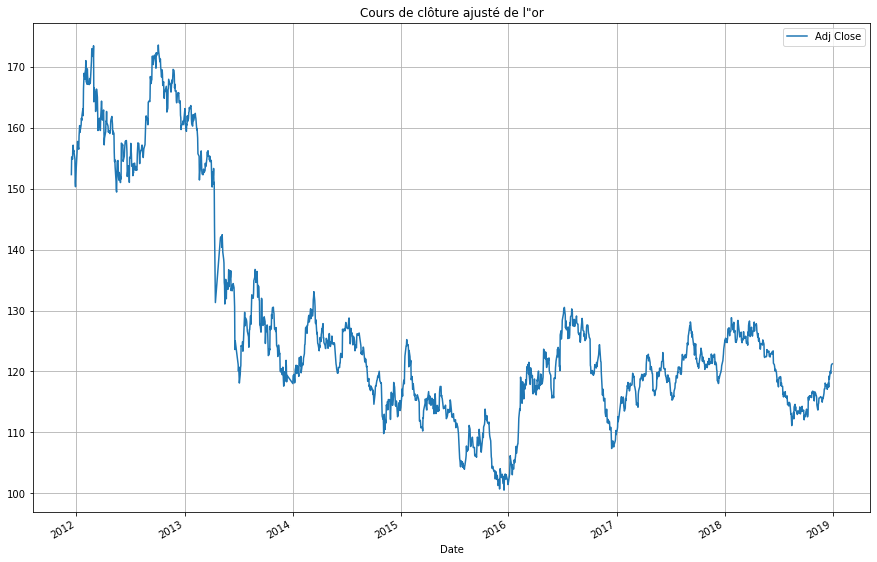

In [9]:
# Affichage de la variable cible
plt.figure(figsize=(15,10))
gold_df["Adj Close"].plot()
plt.title(str('Cours de clôture ajusté de l"or'))
plt.legend()
plt.grid();

### 6 - Compréhension des variables

/tmp/ipykernel_5360/3318047732.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,8))


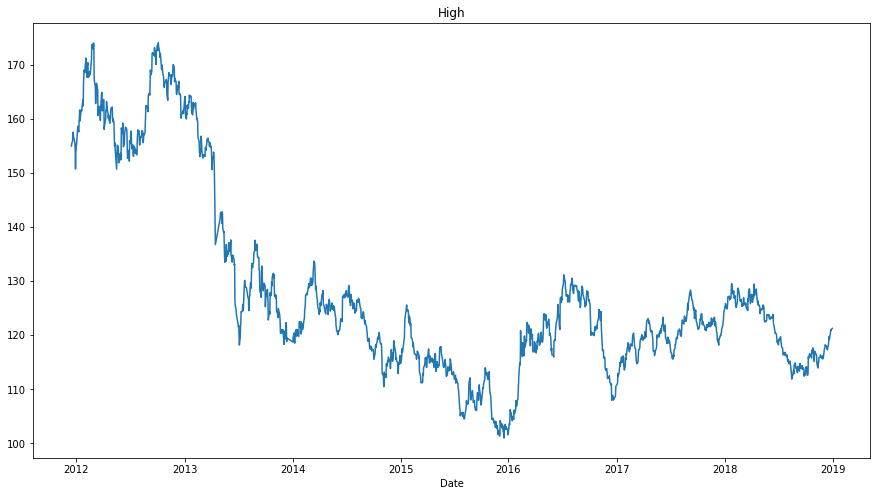

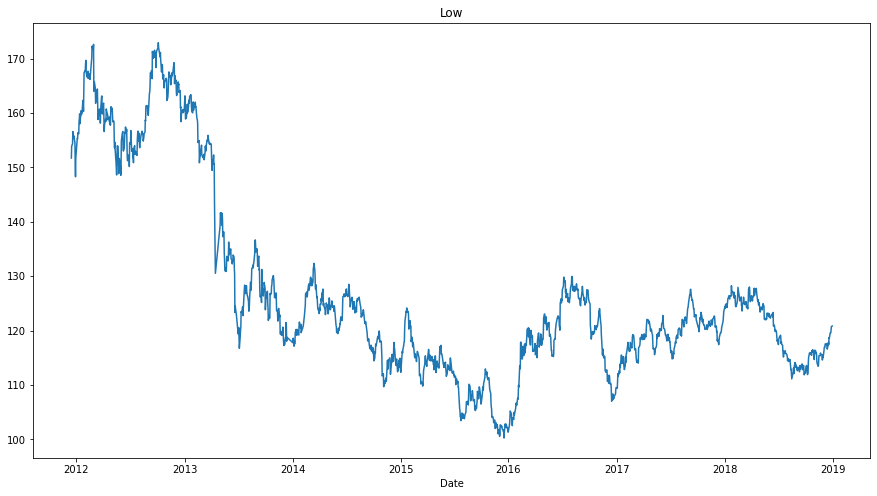

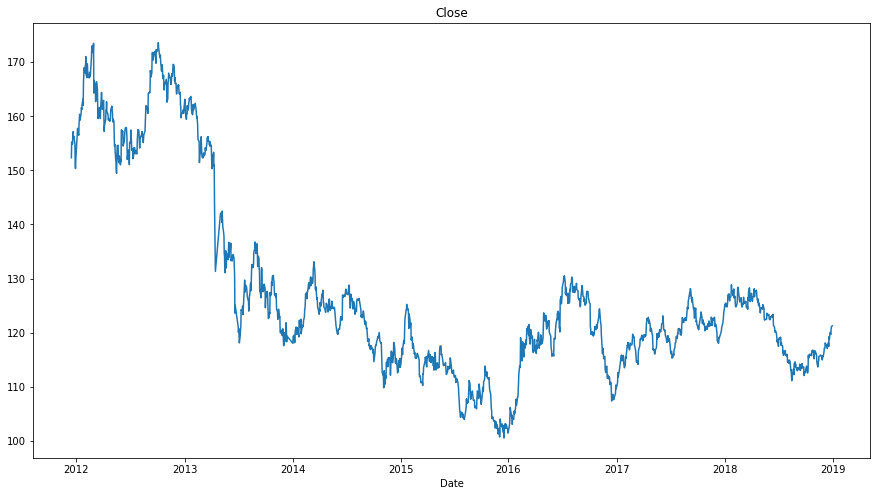

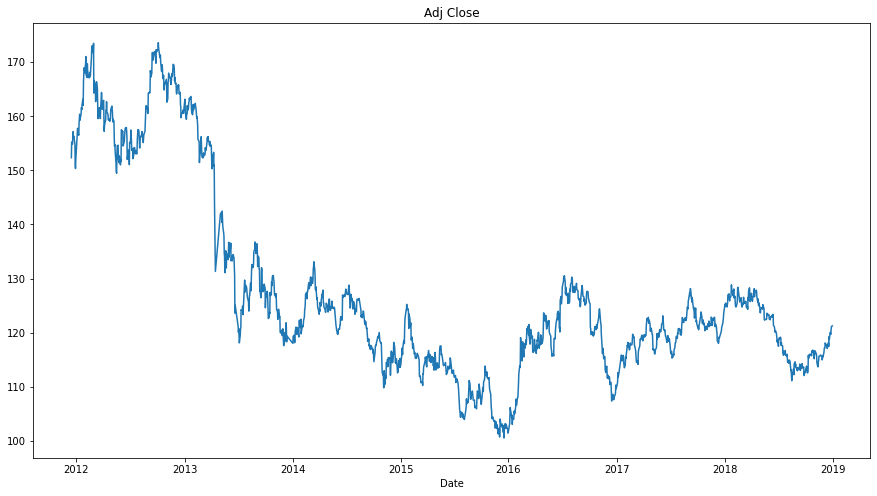

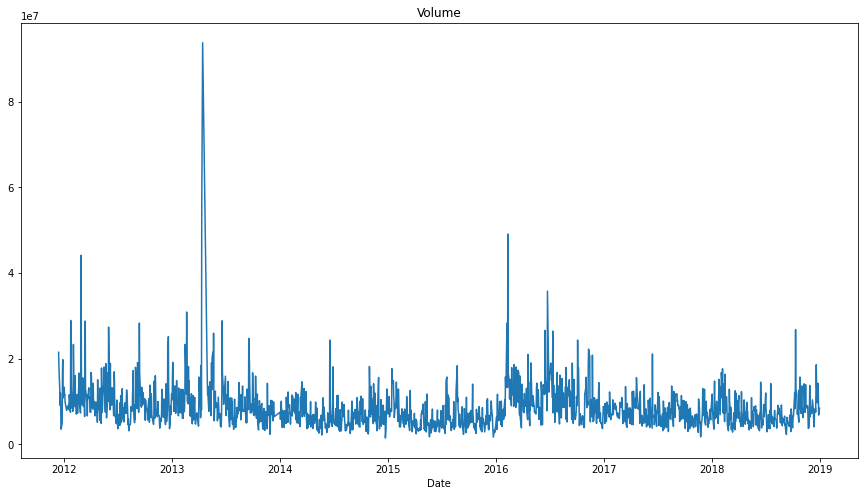

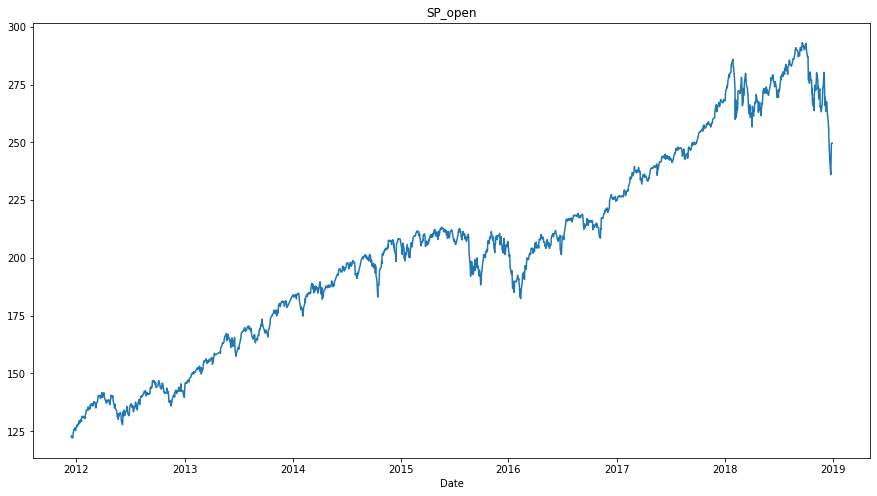

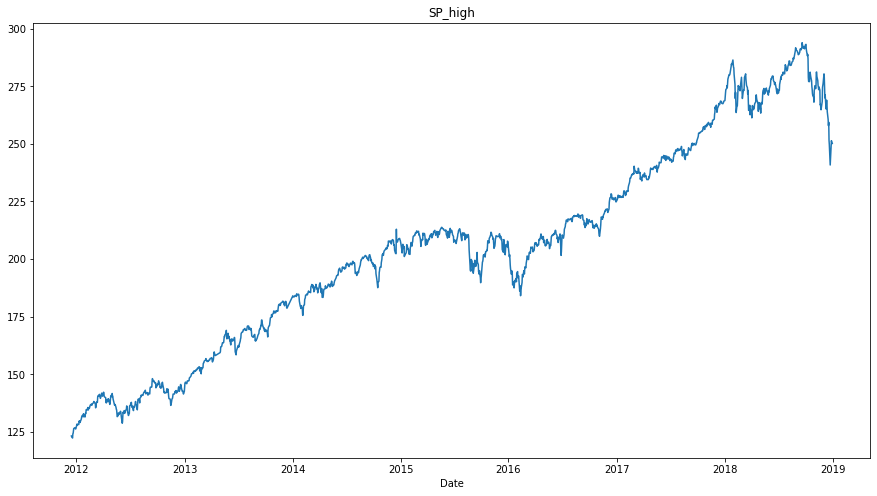

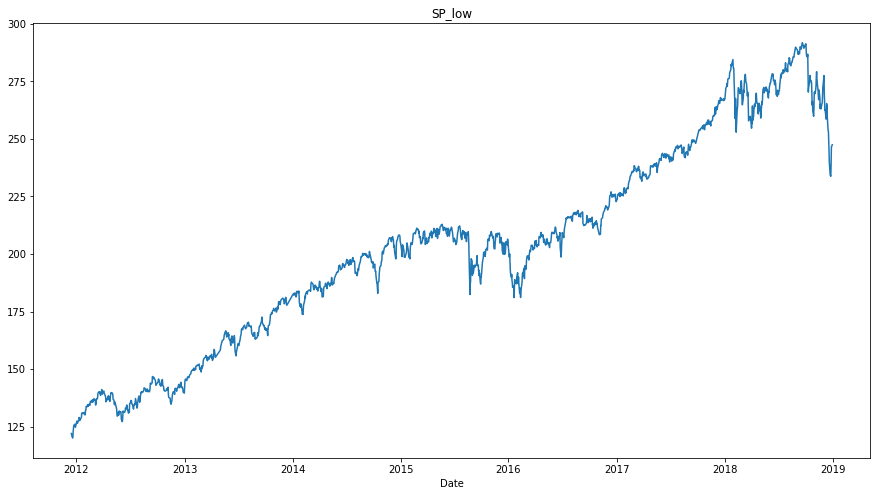

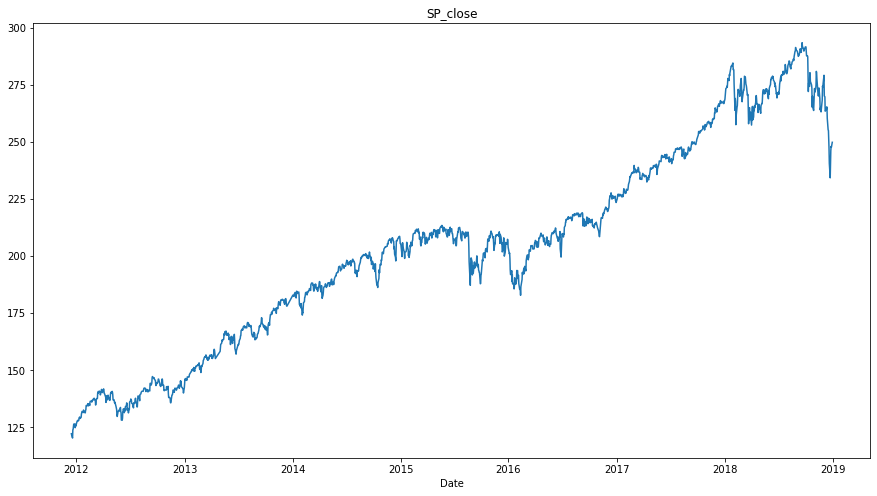

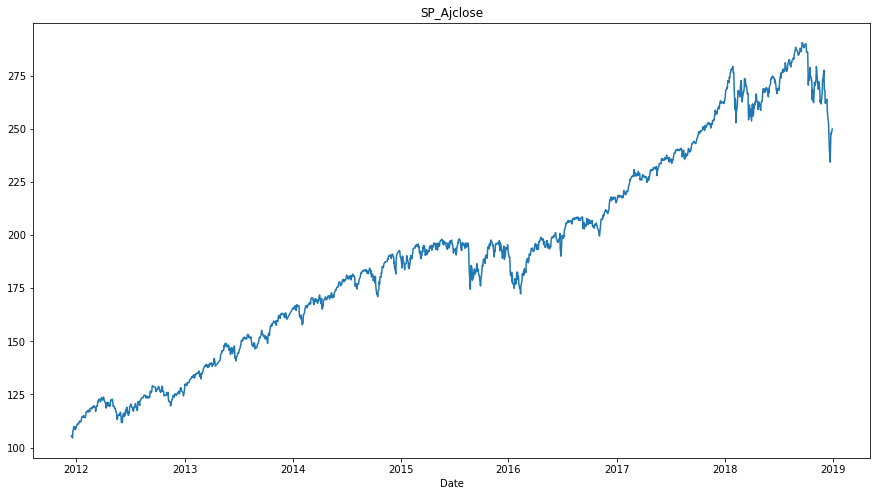

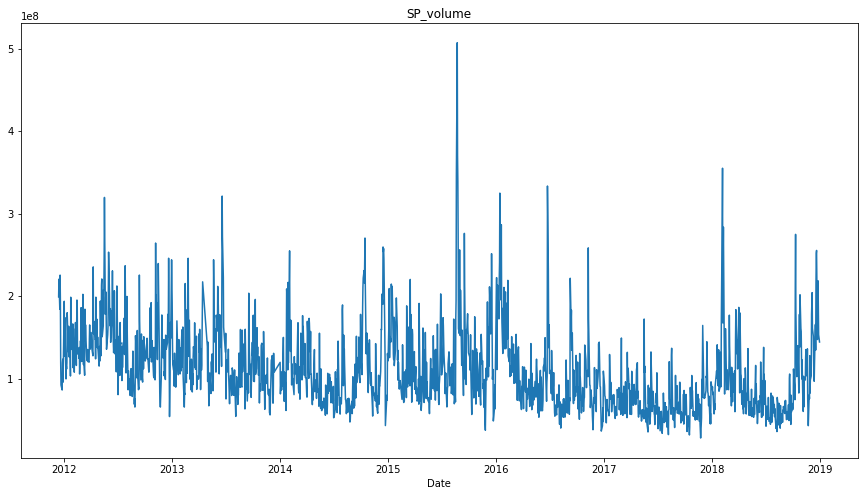

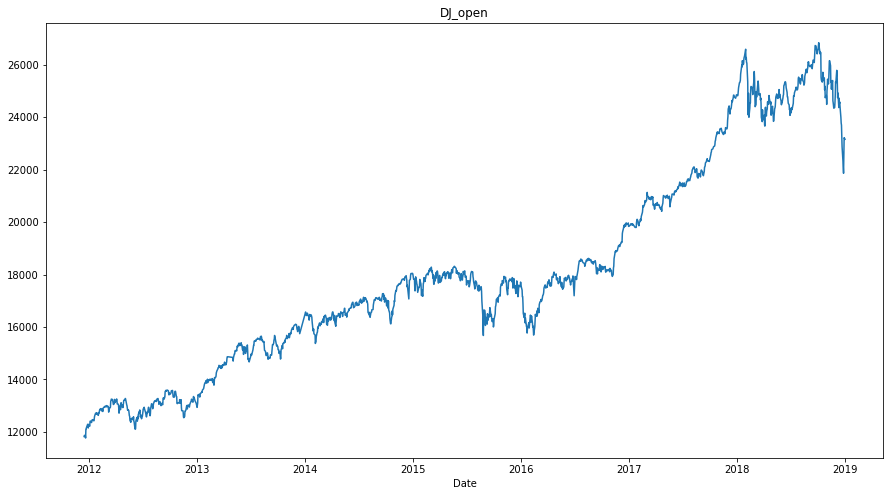

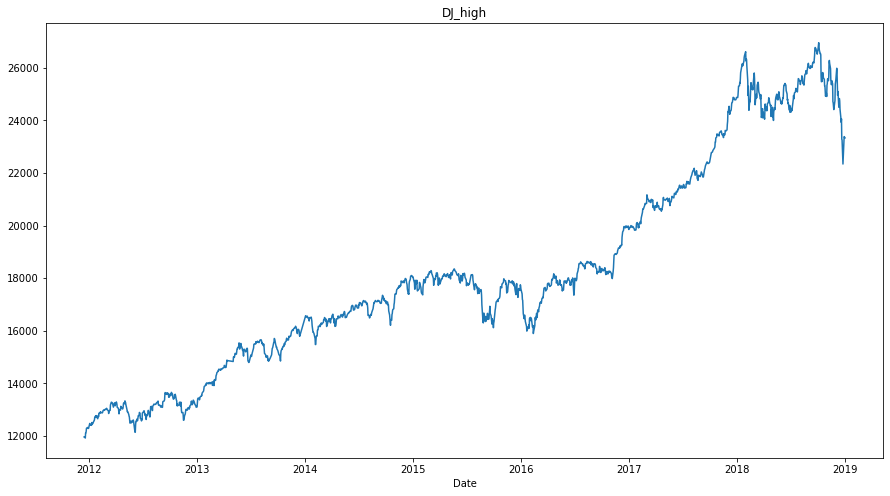

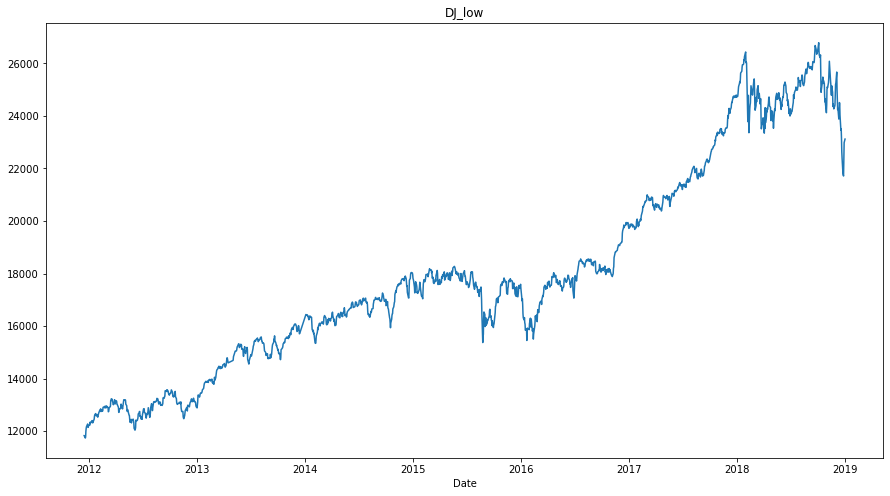

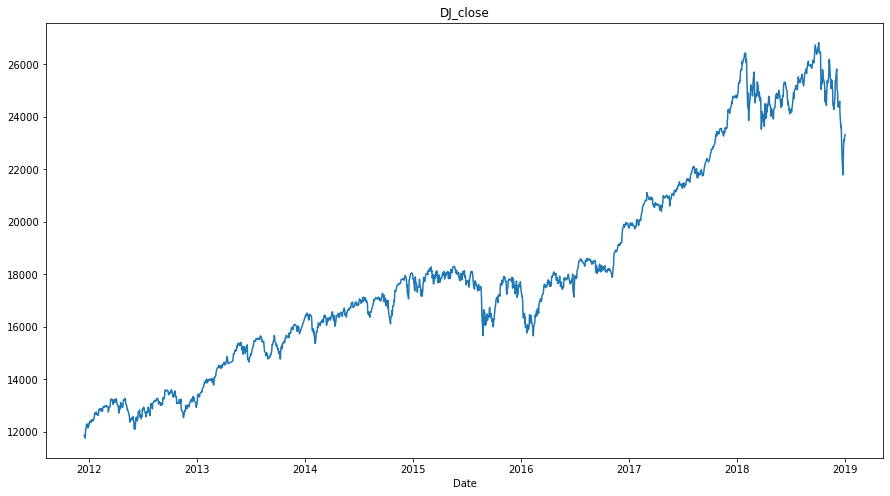

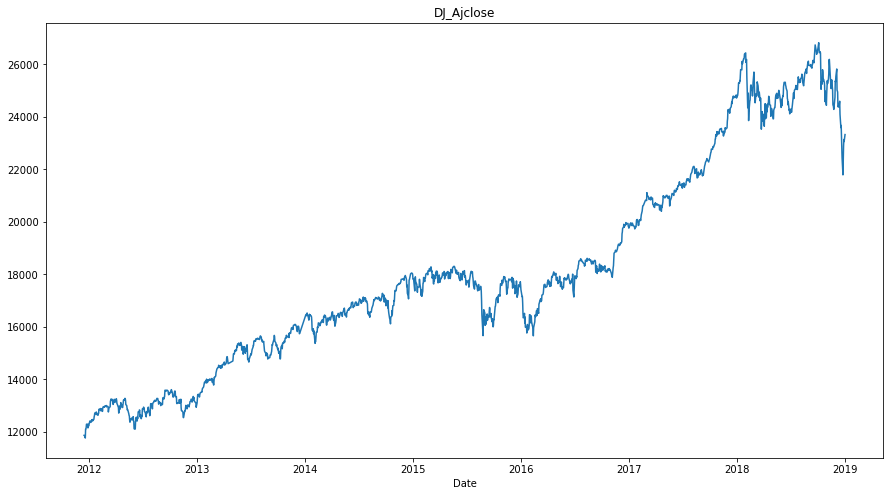

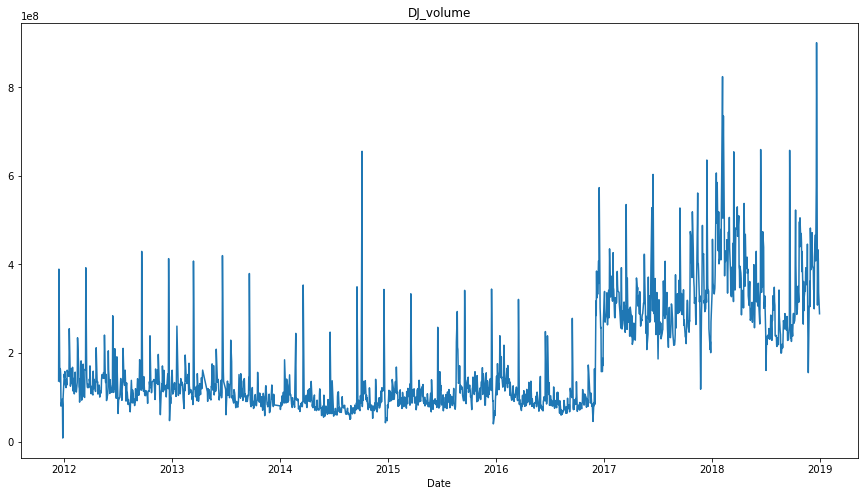

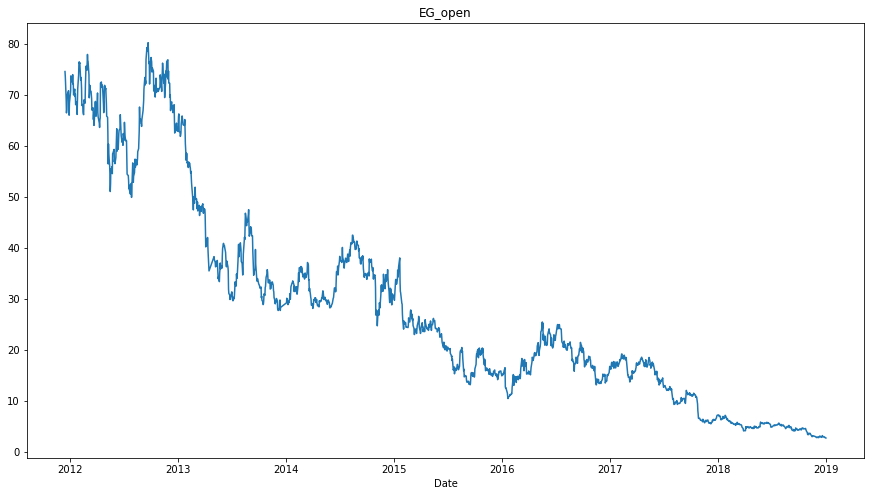

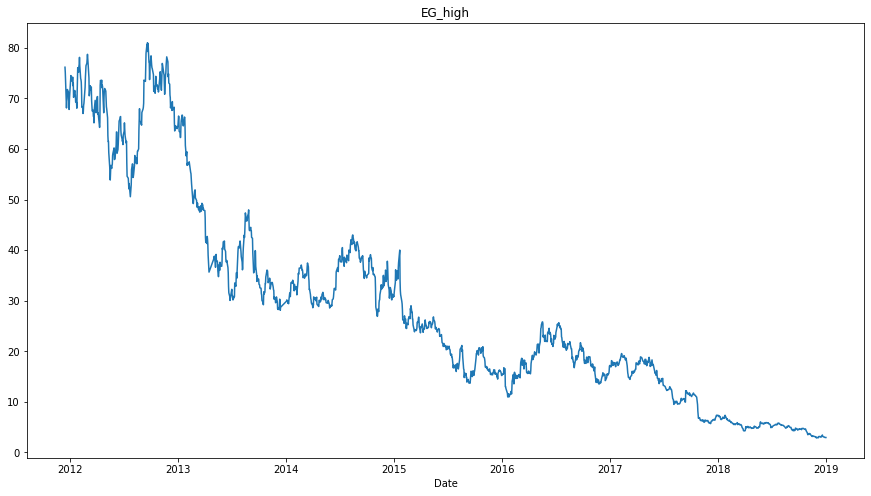

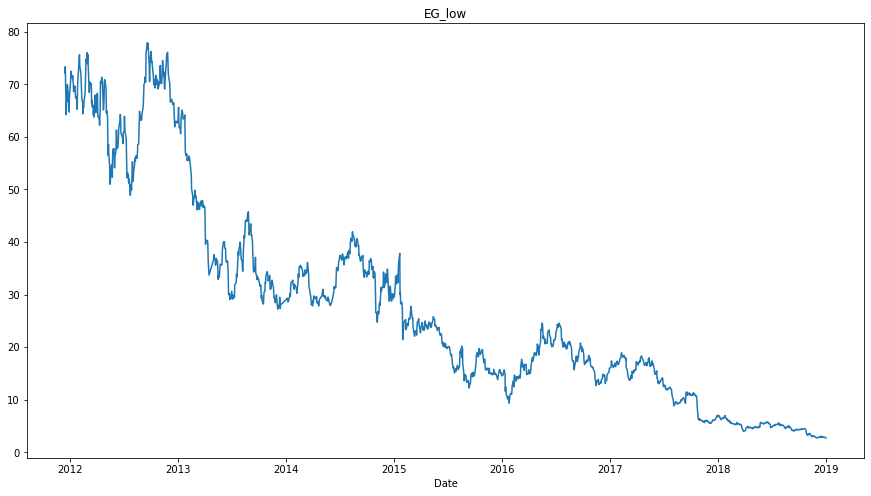

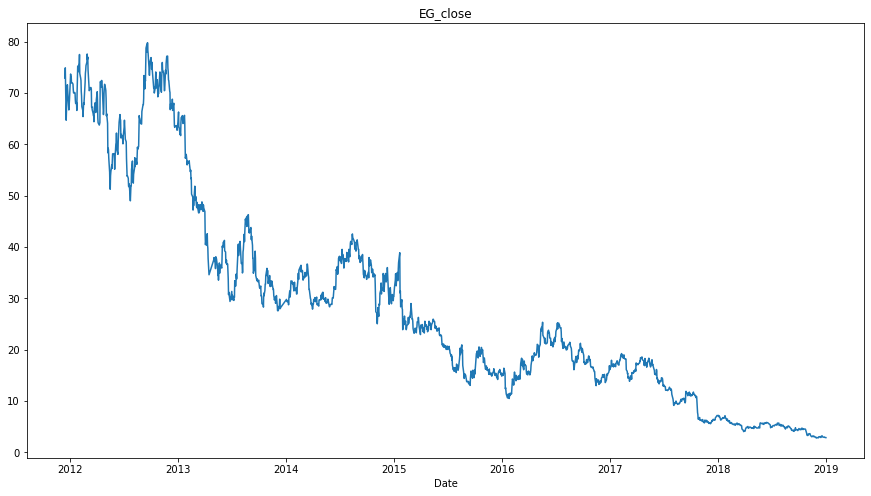

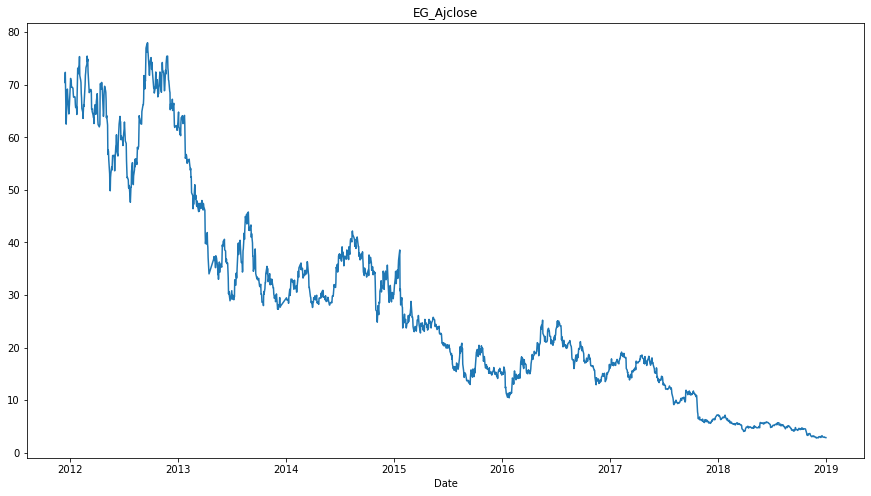

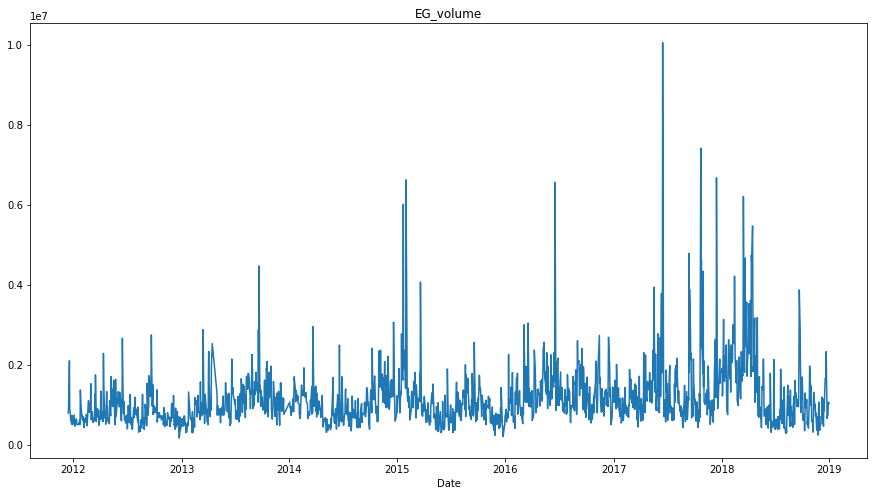

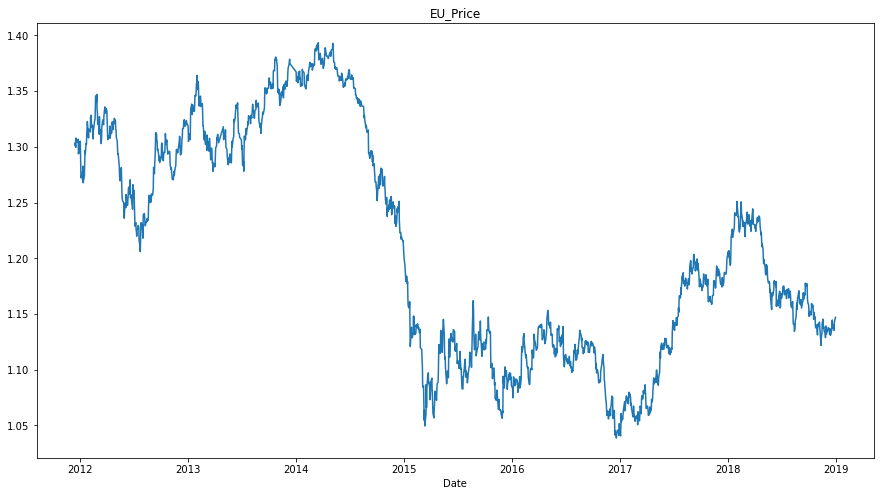

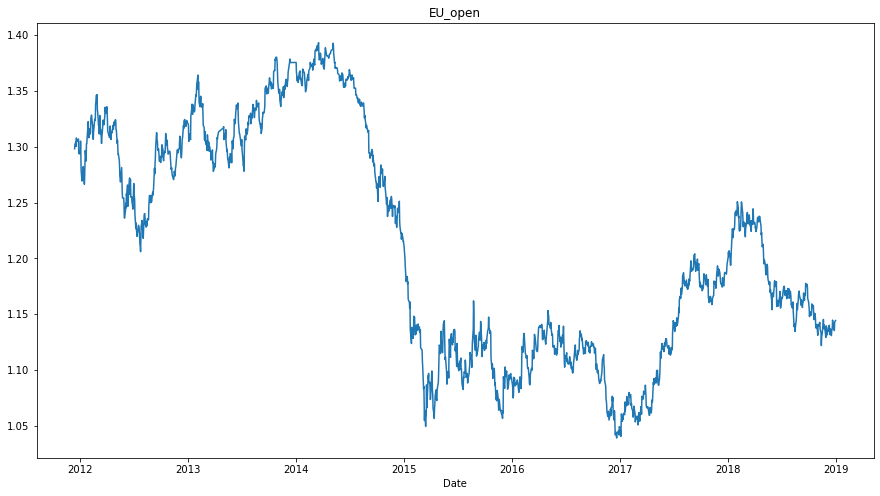

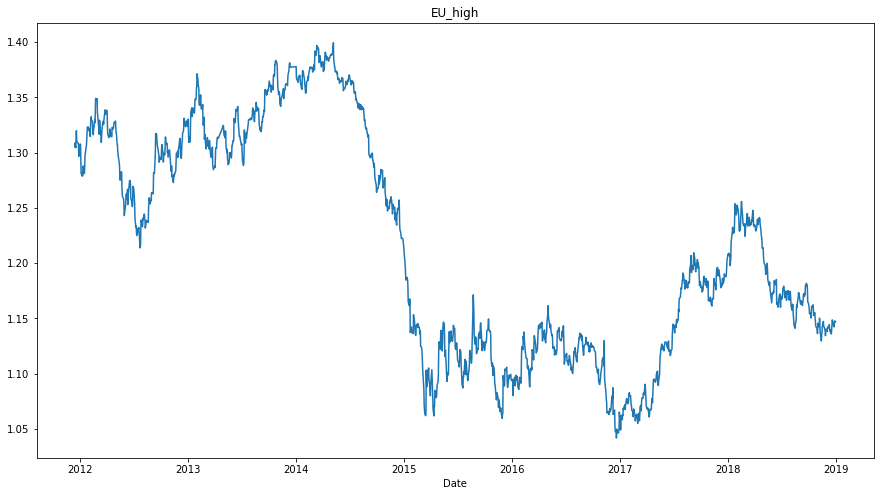

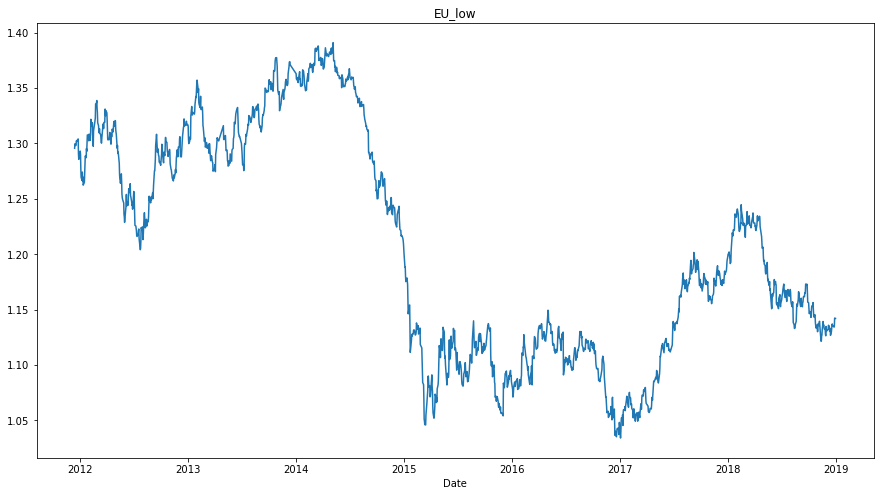

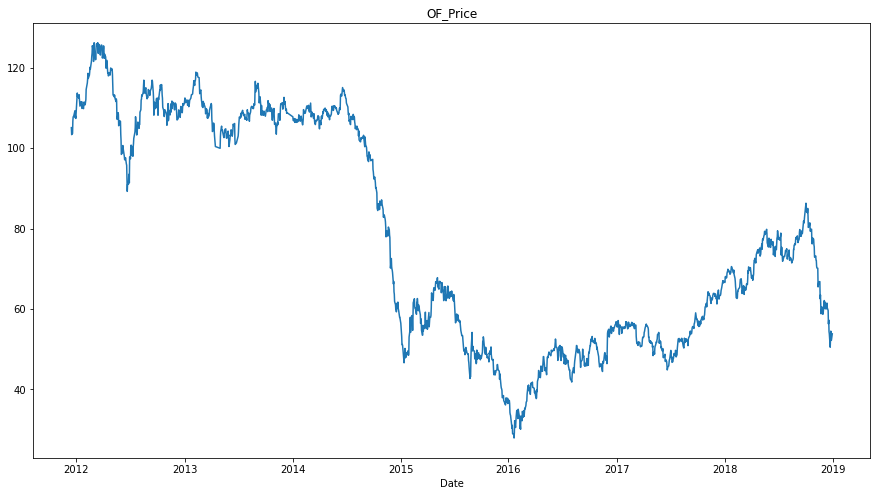

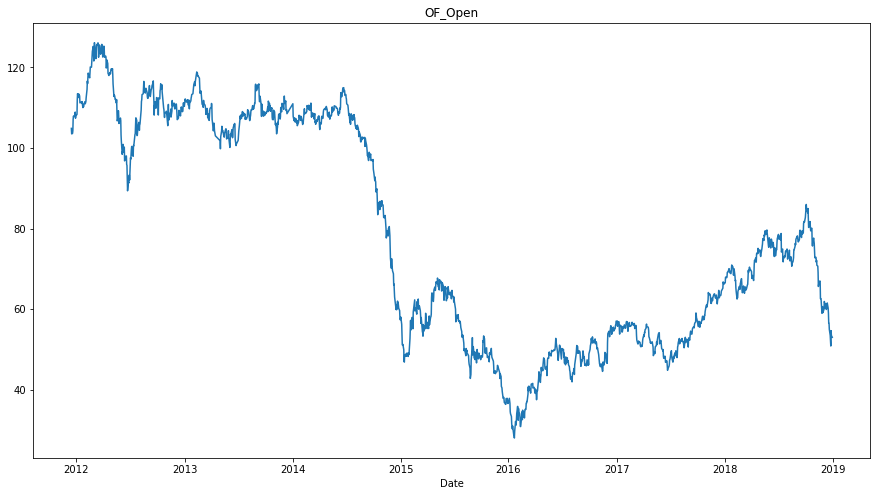

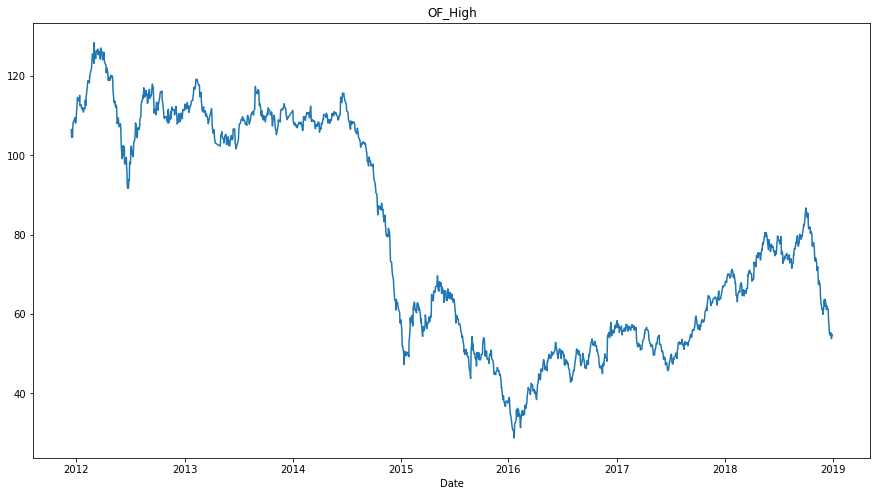

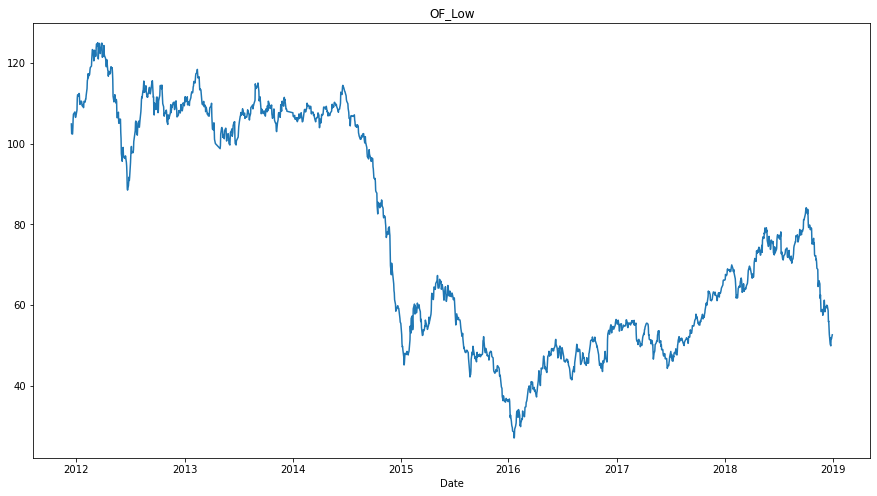

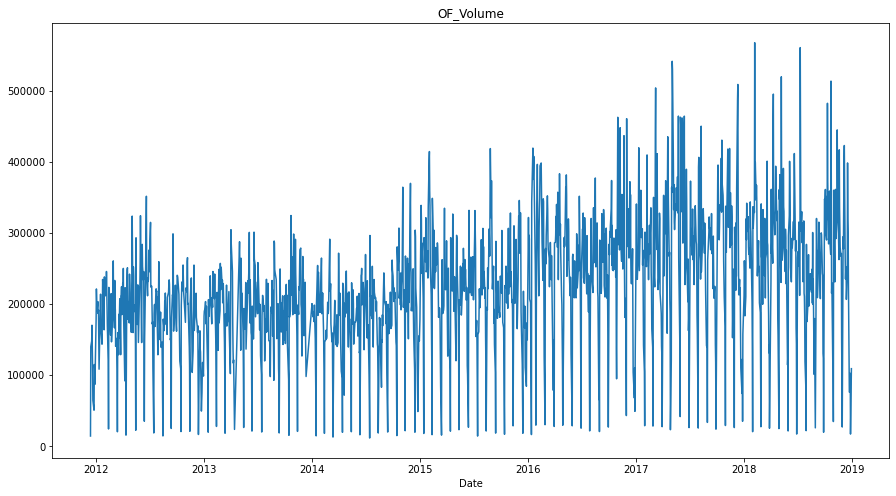

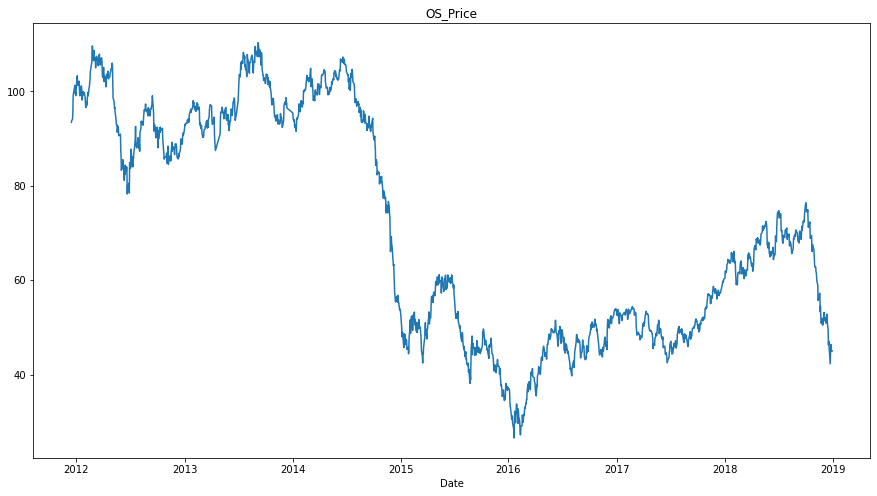

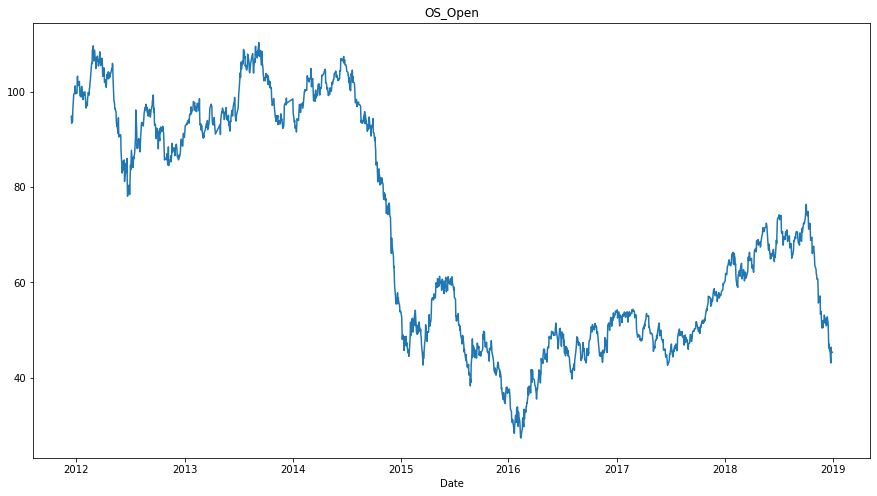

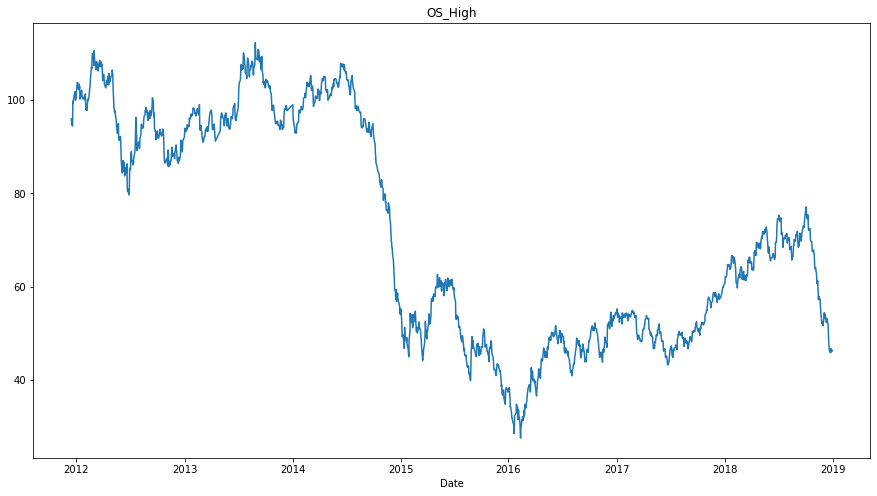

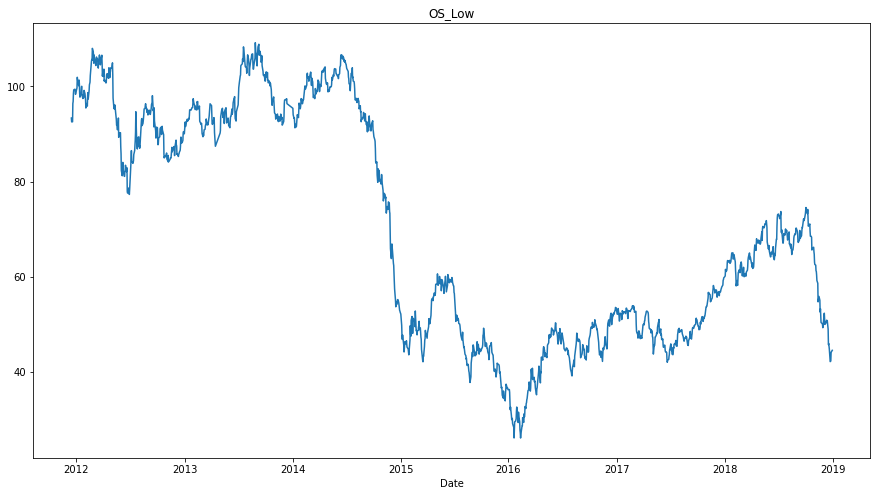

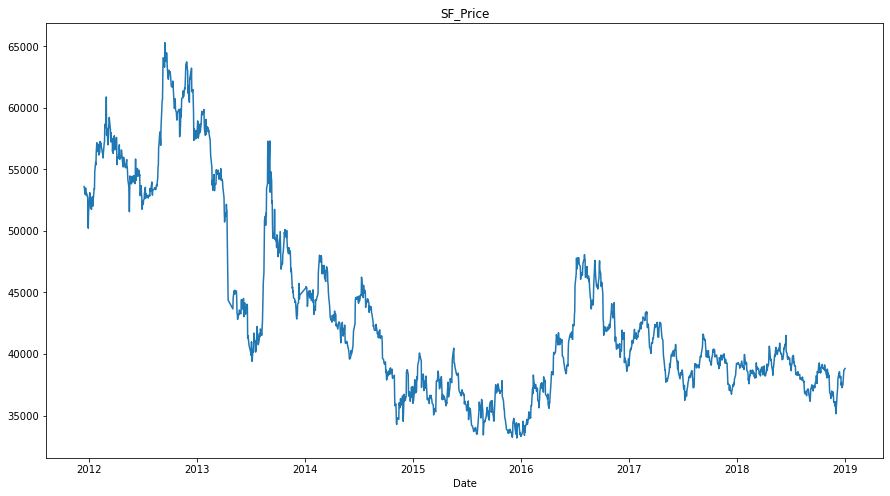

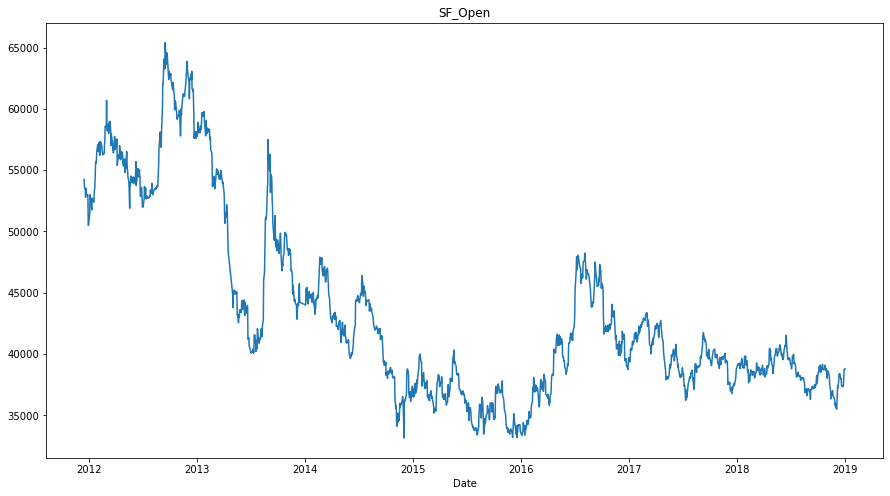

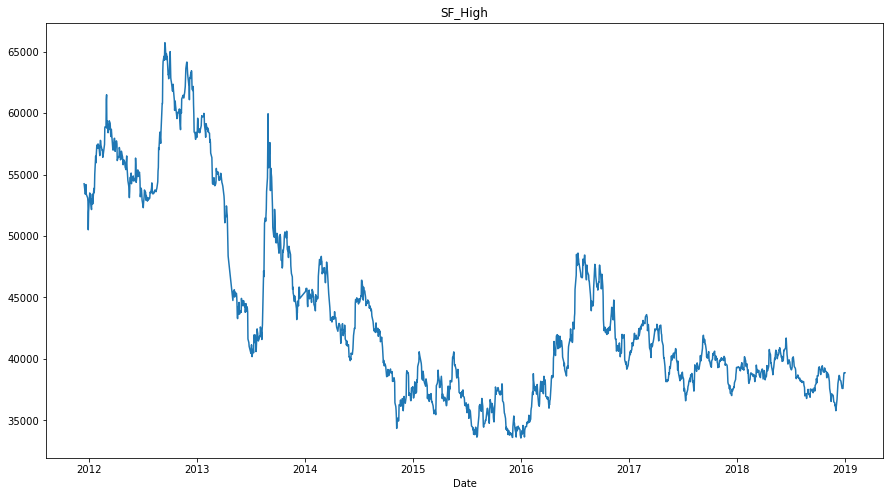

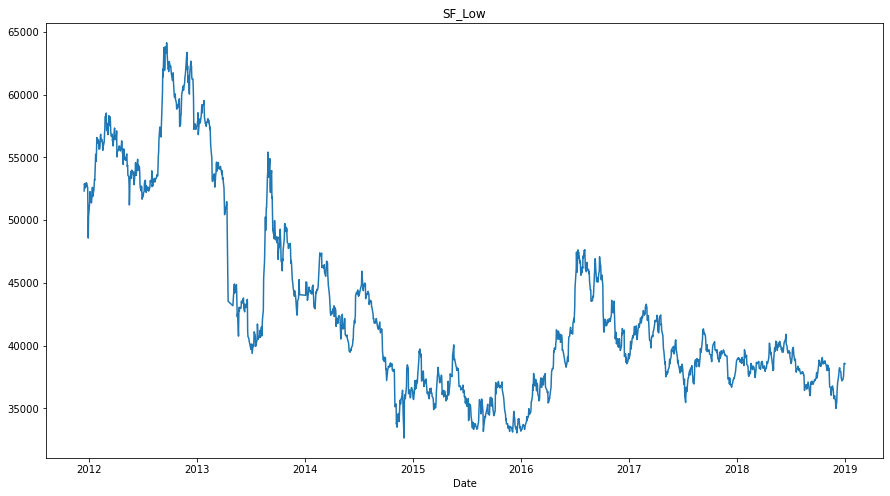

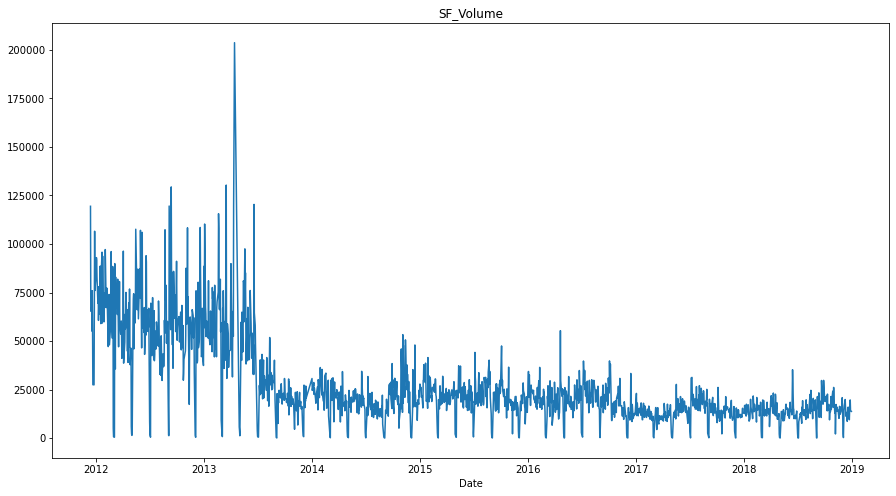

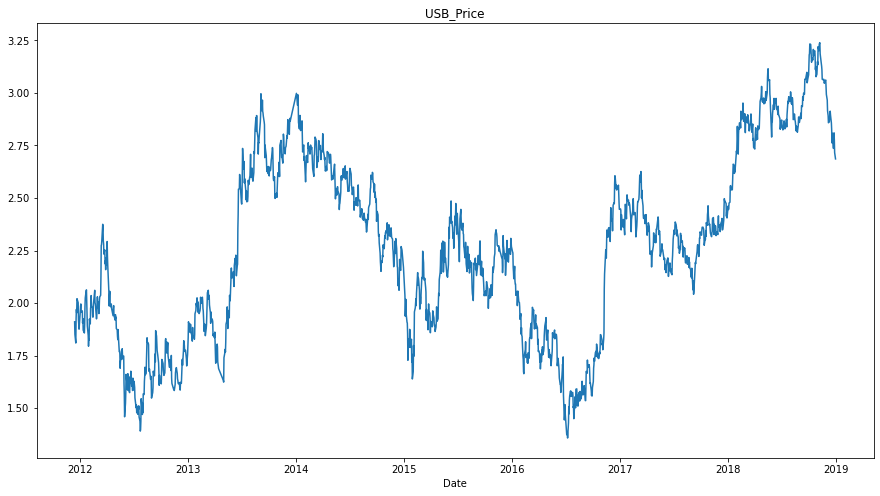

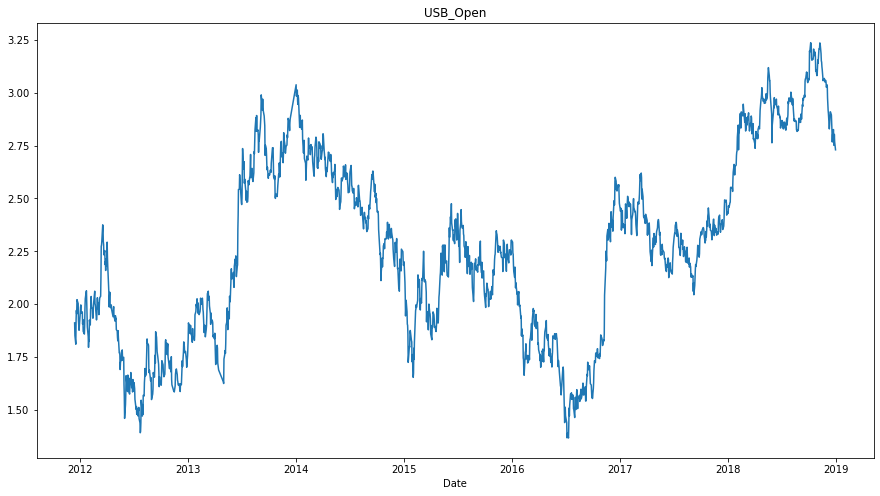

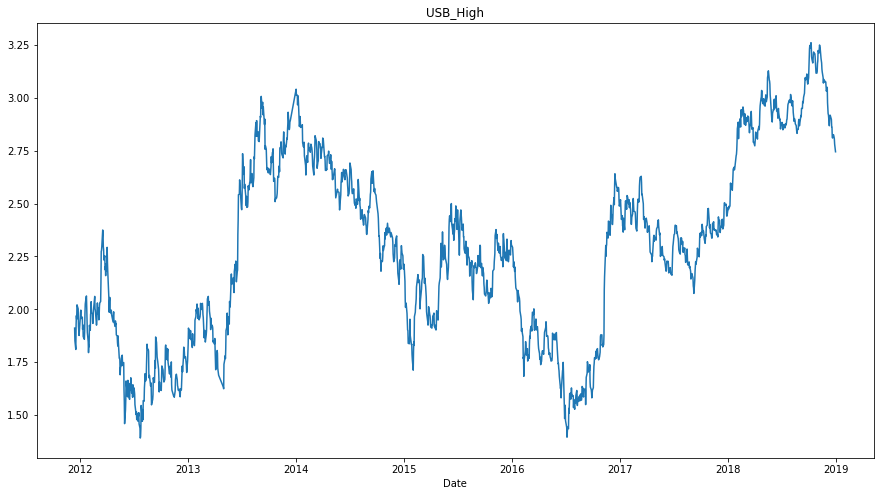

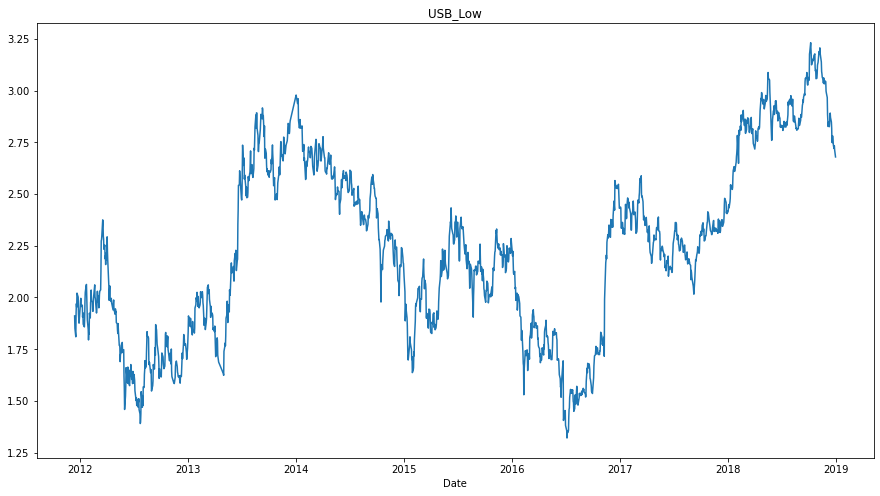

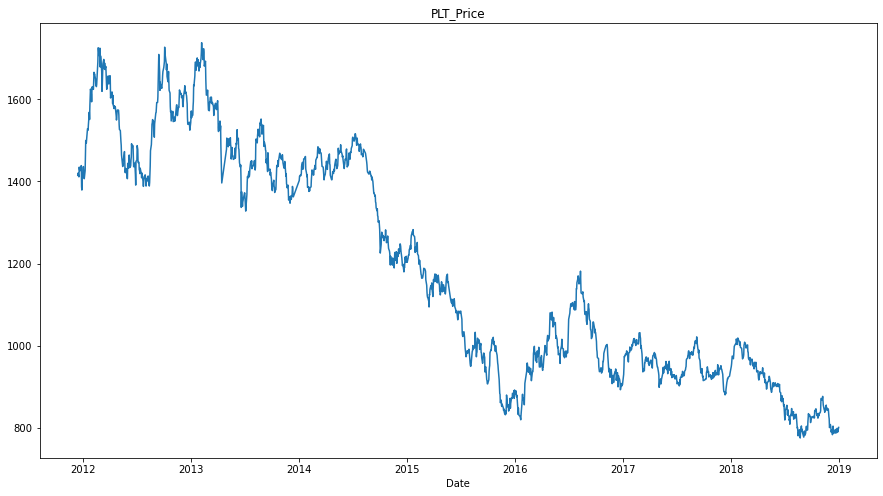

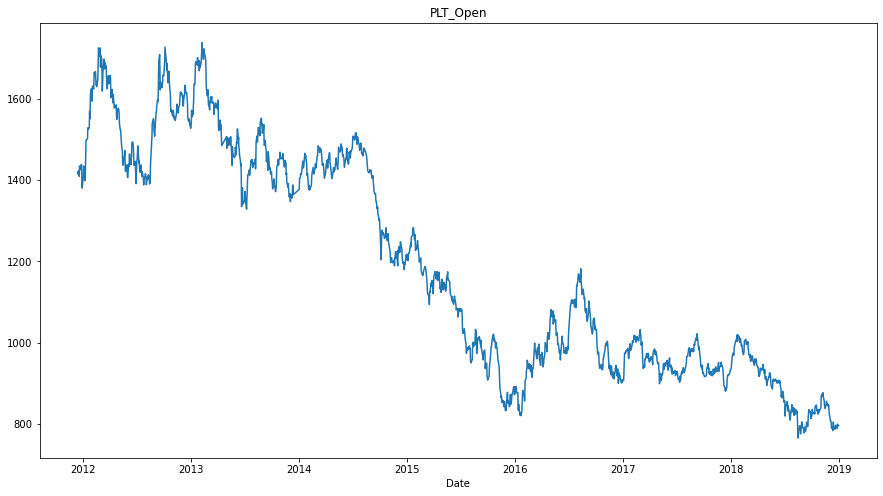

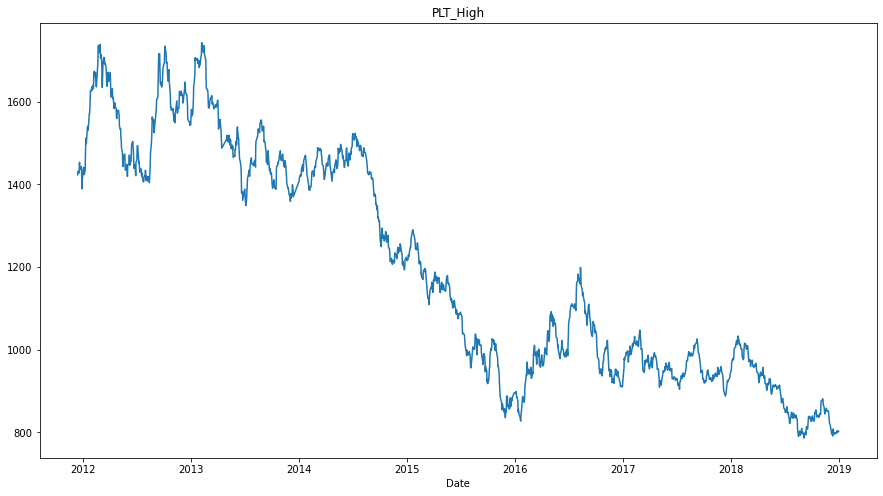

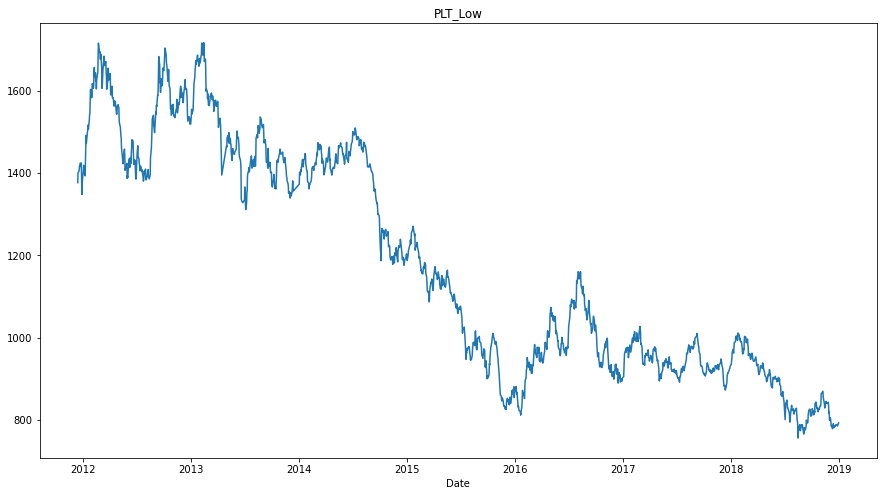

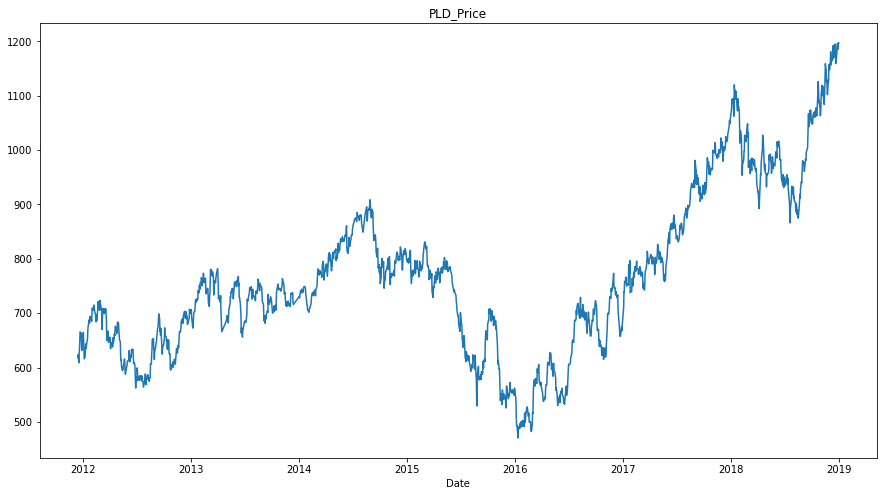

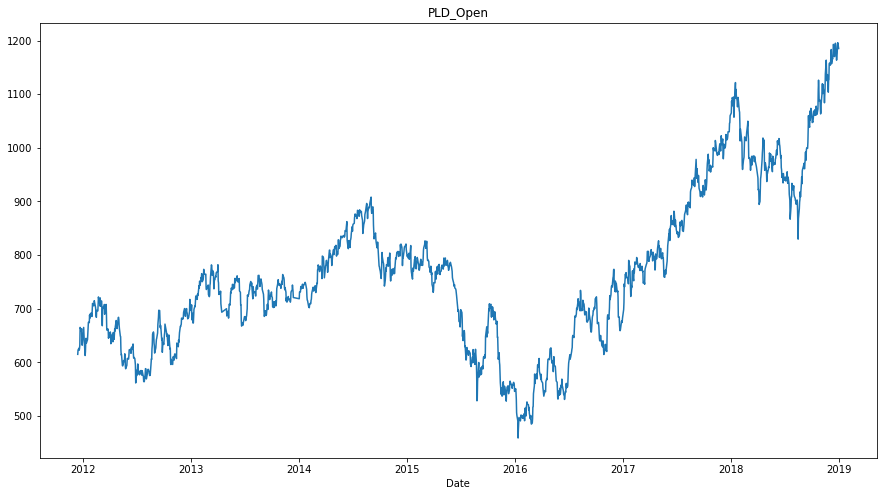

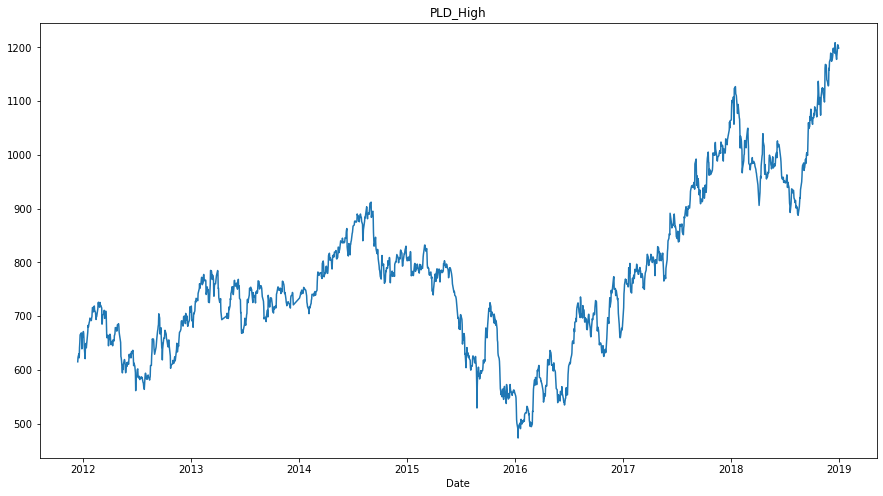

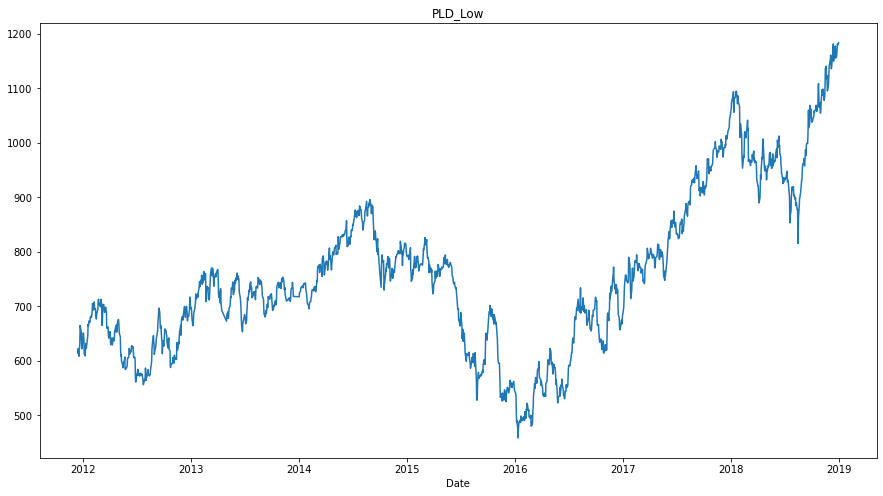

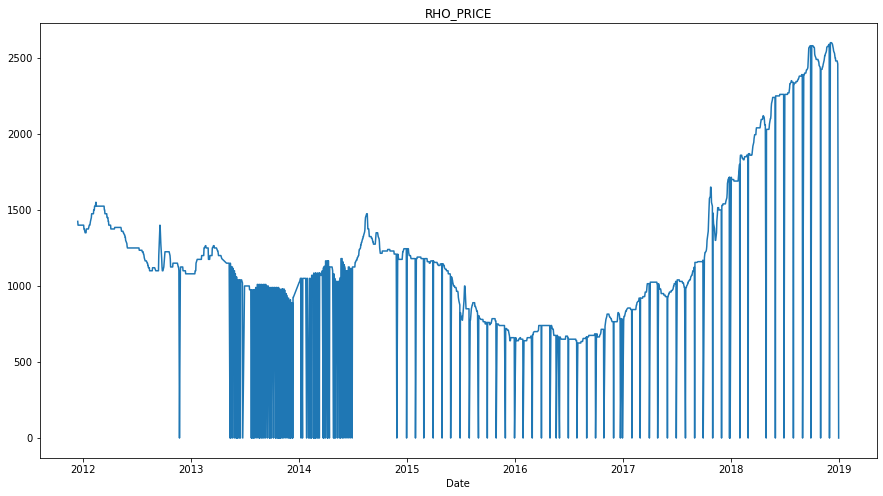

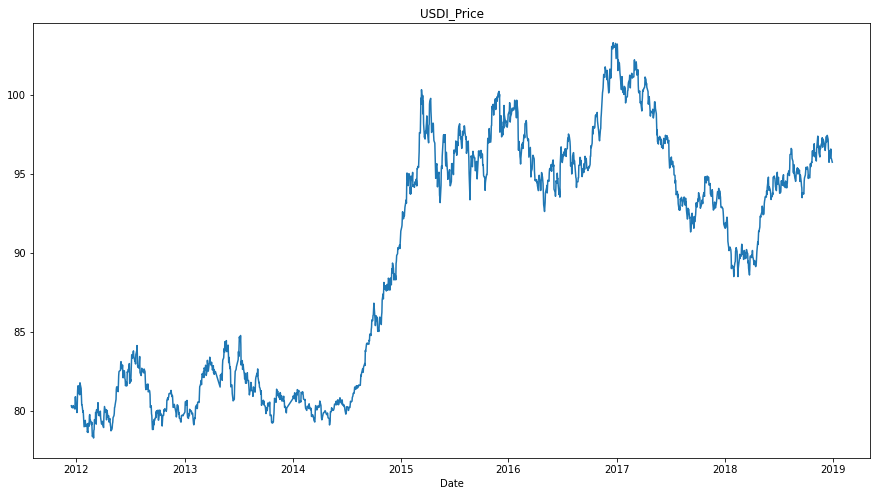

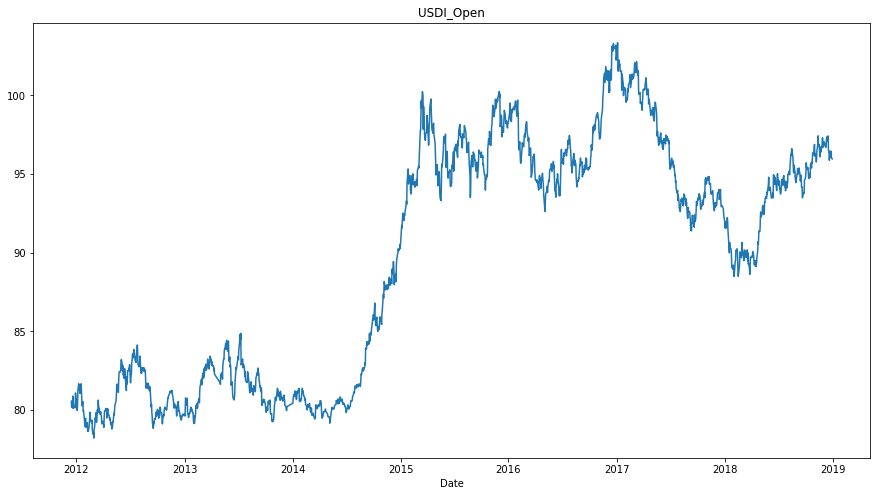

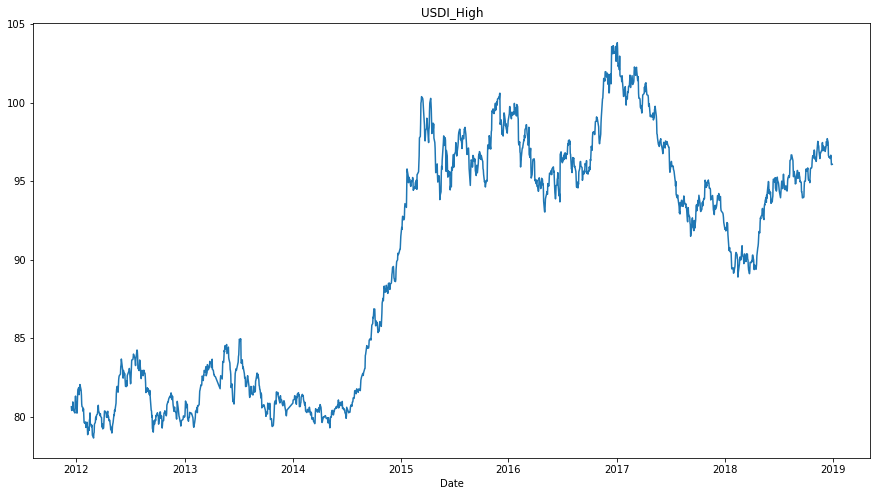

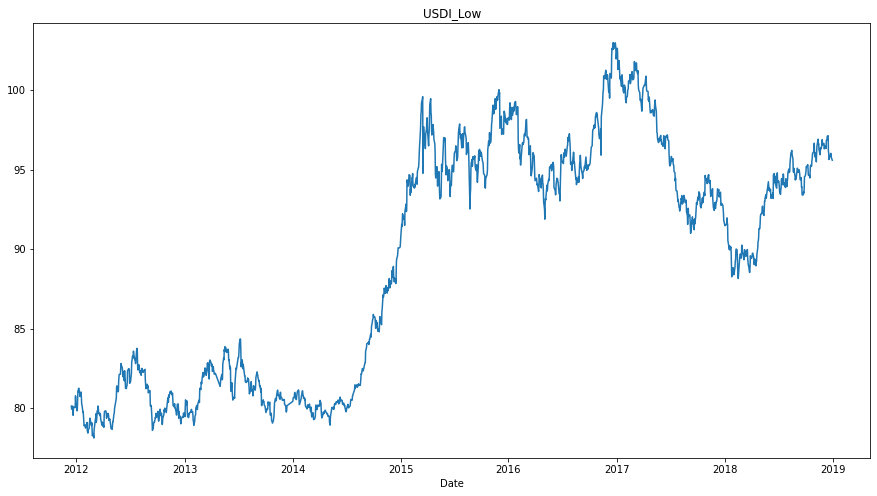

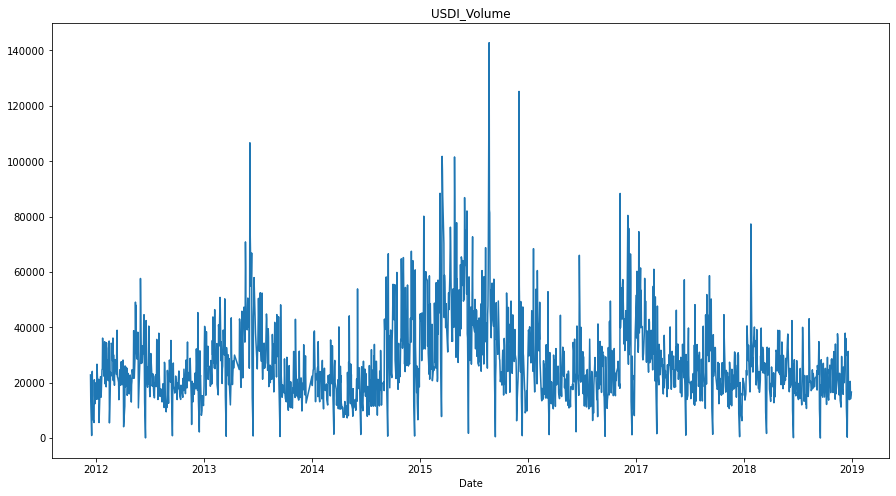

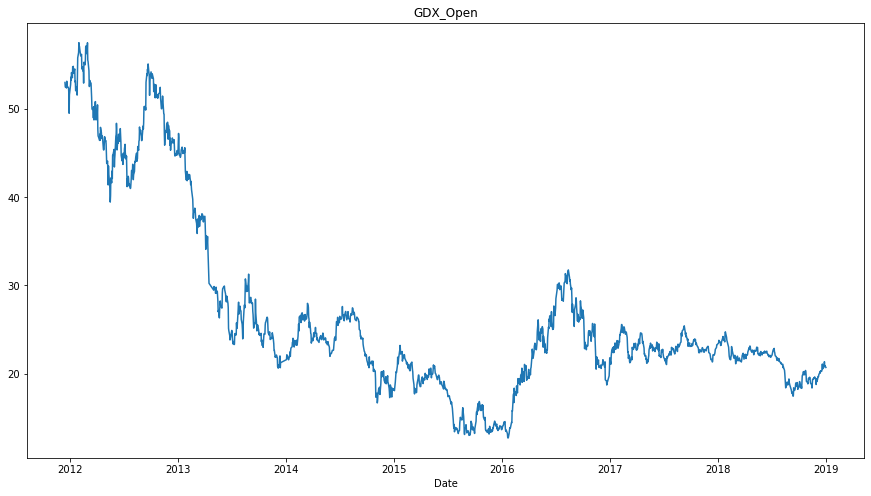

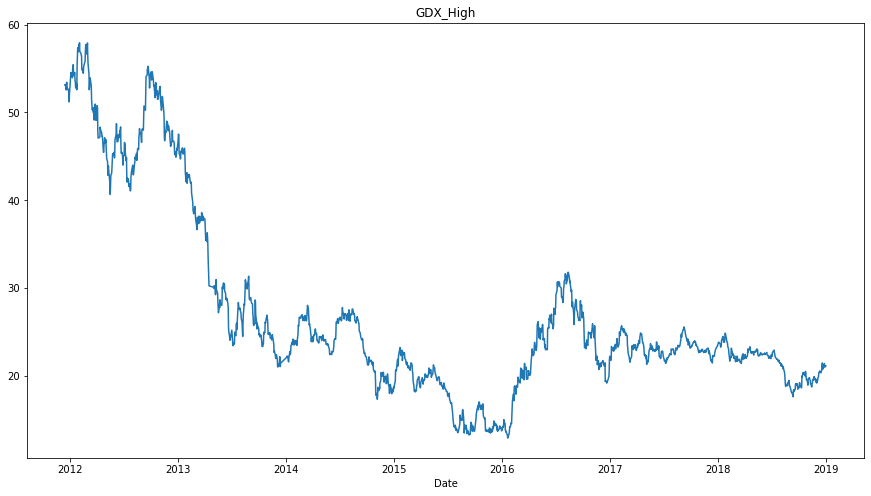

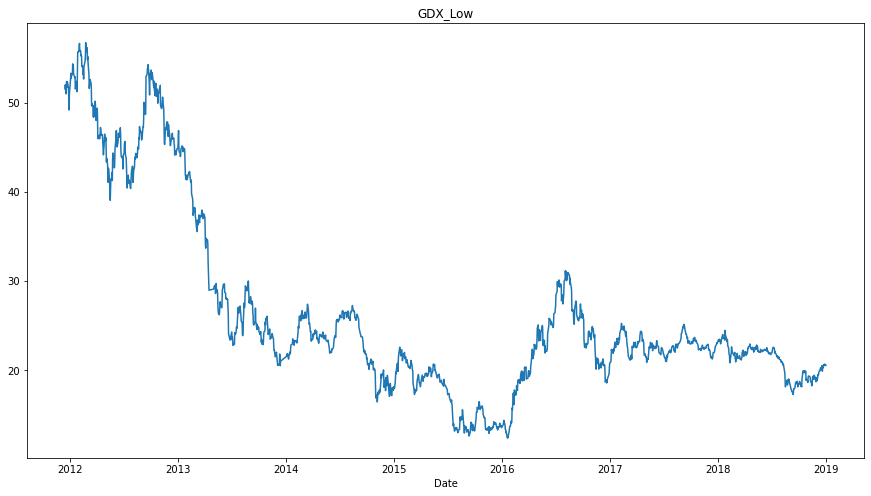

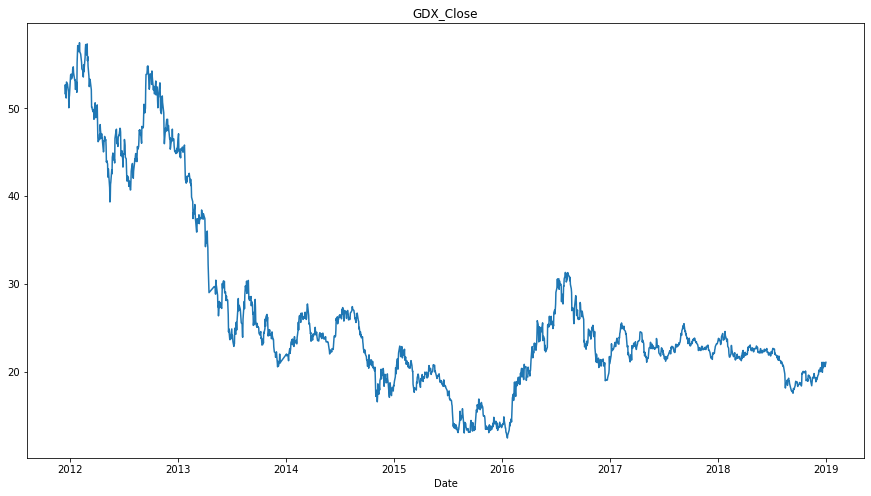

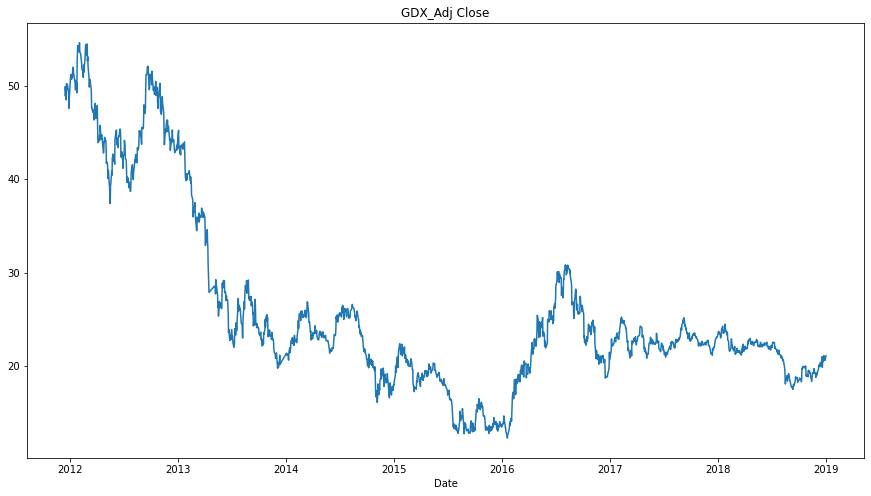

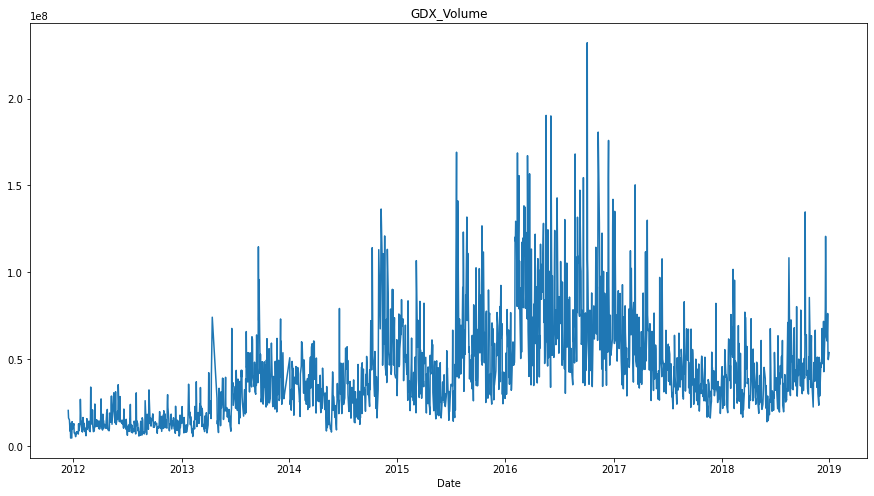

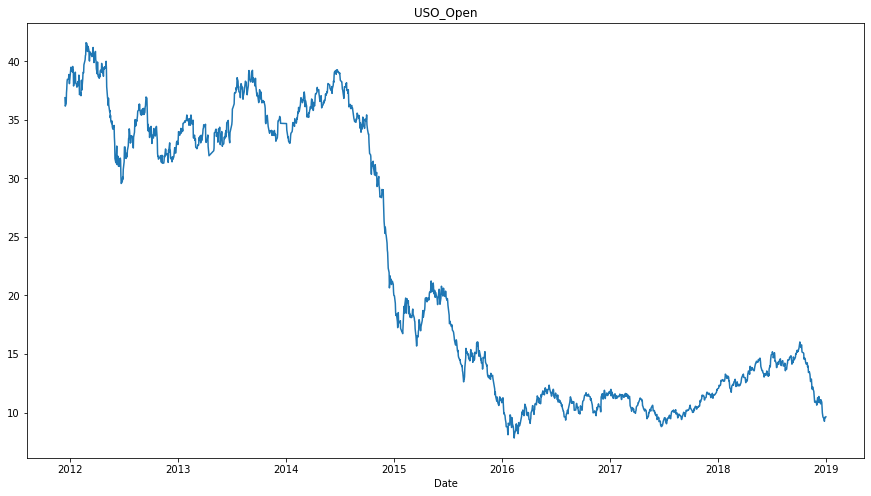

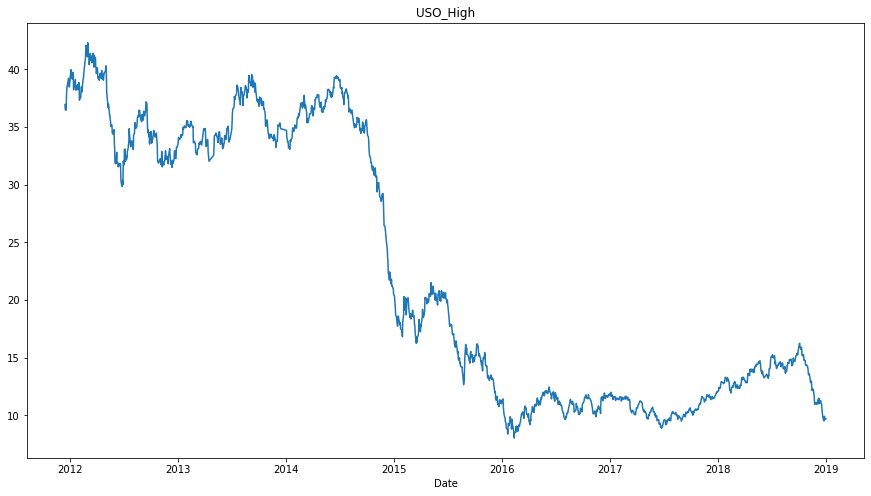

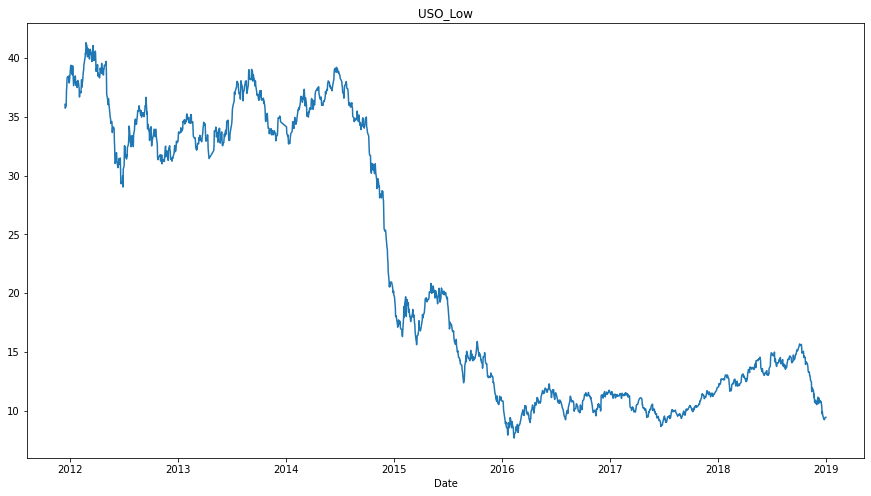

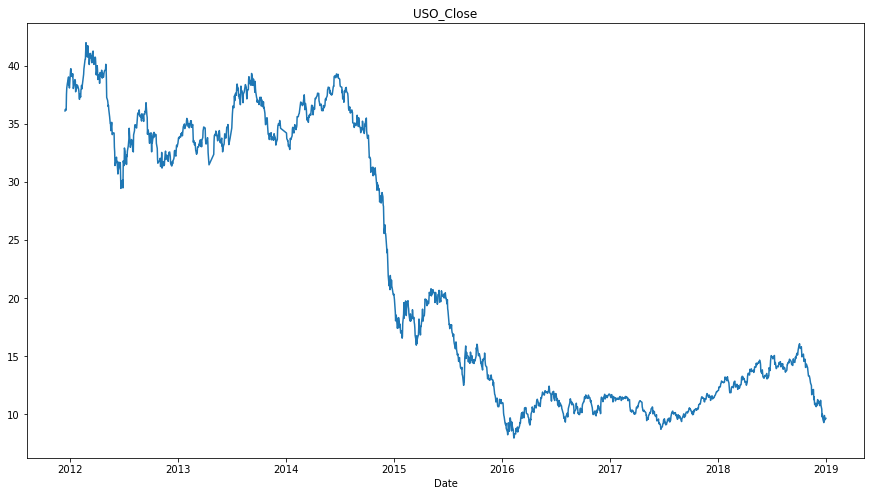

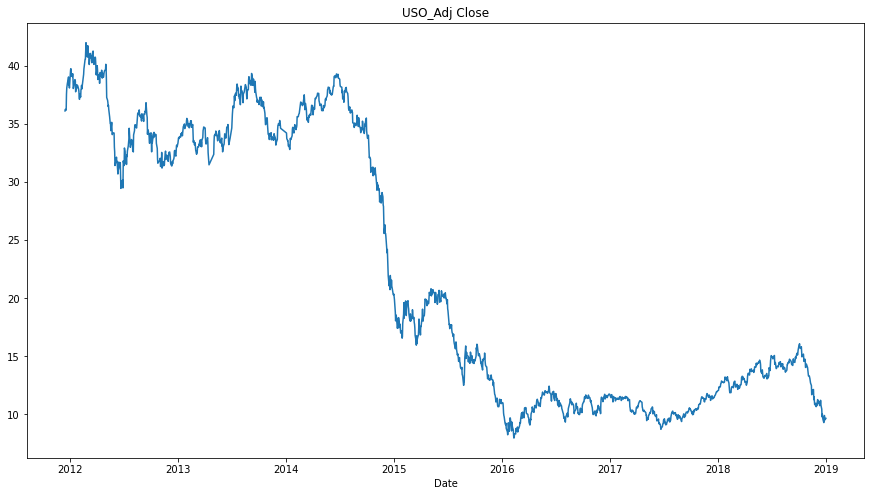

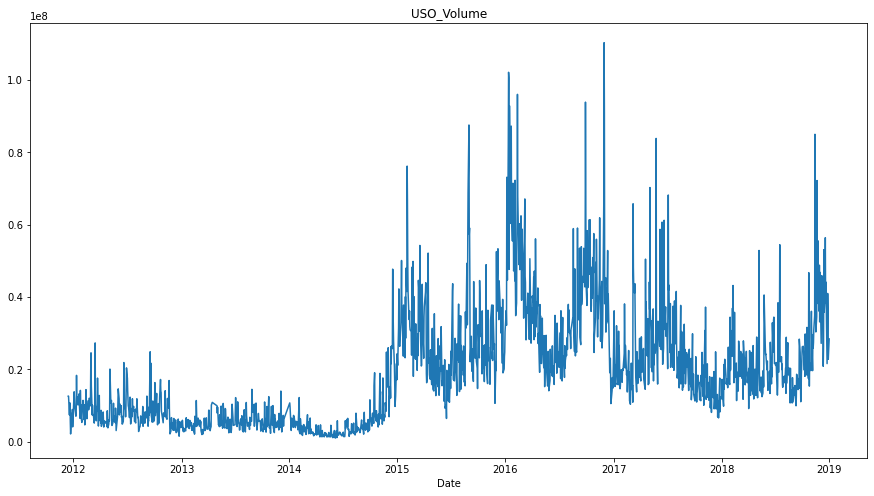

In [10]:
# Visualisation des variables afin de les analyser

for i in gold_df:
    if i not in 'Open''EU_Trend''OF_Trend''USDI_Trend''PLT_Trend''PLD_Trend''SF_Trend''USB_Trend''OS_Trend':
        plt.figure(figsize=(15,8))
        plt.title(str(i))
        gold_df[i].plot(subplots=True)
    #plt.plot(gold_df[i], subplots = True)
    #plt.legend()

### 7 - Visualisation des relations variables/cible

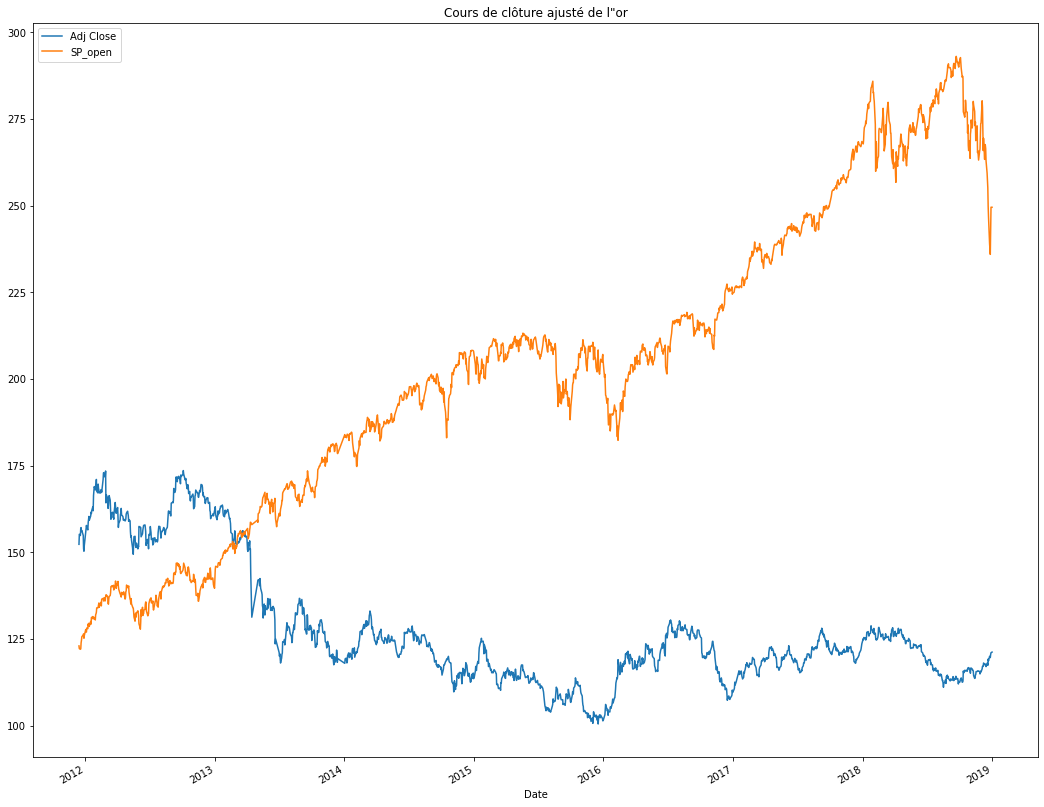

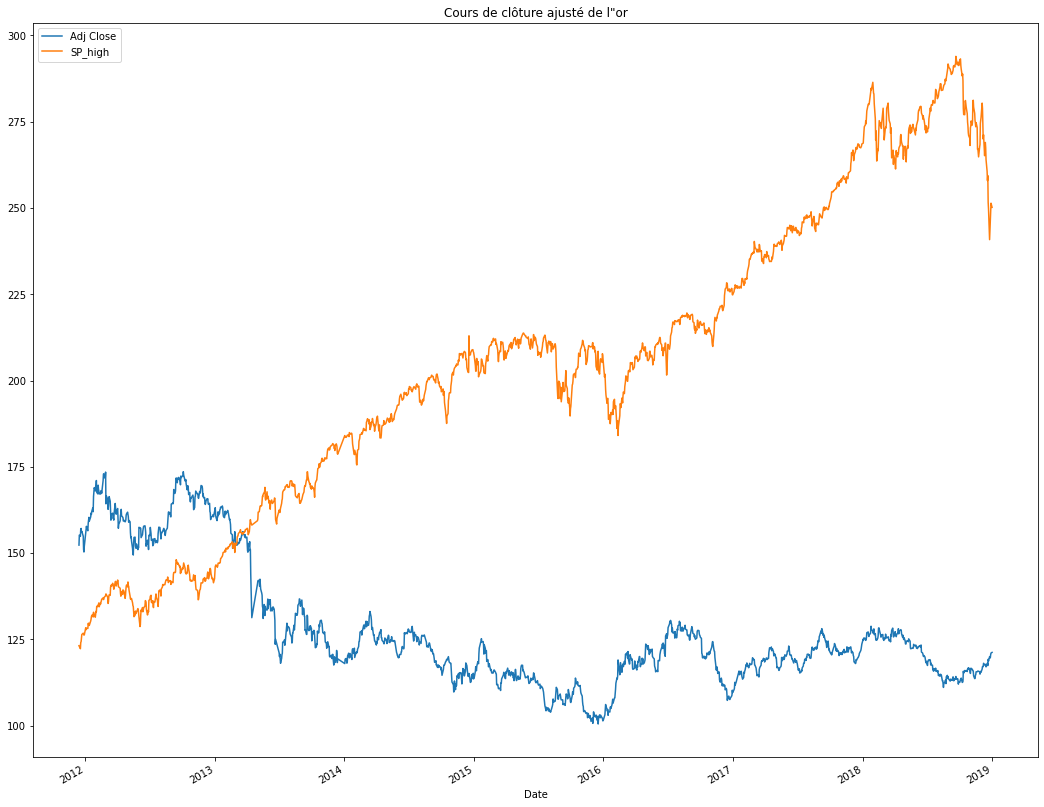

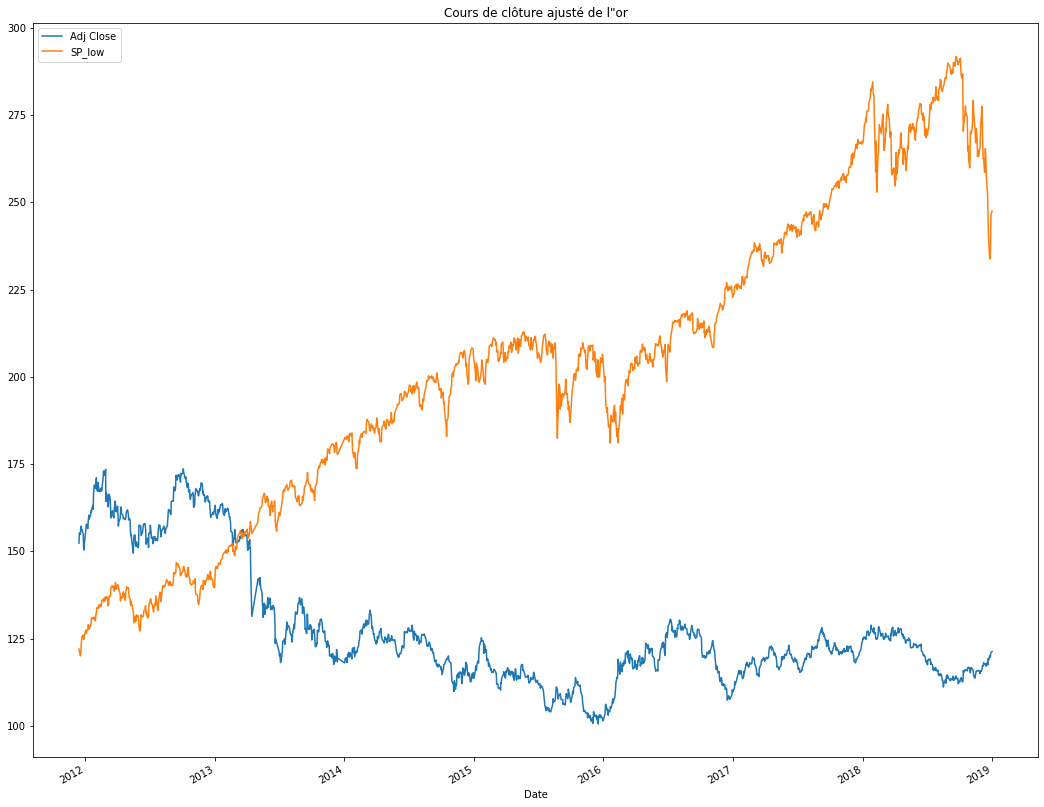

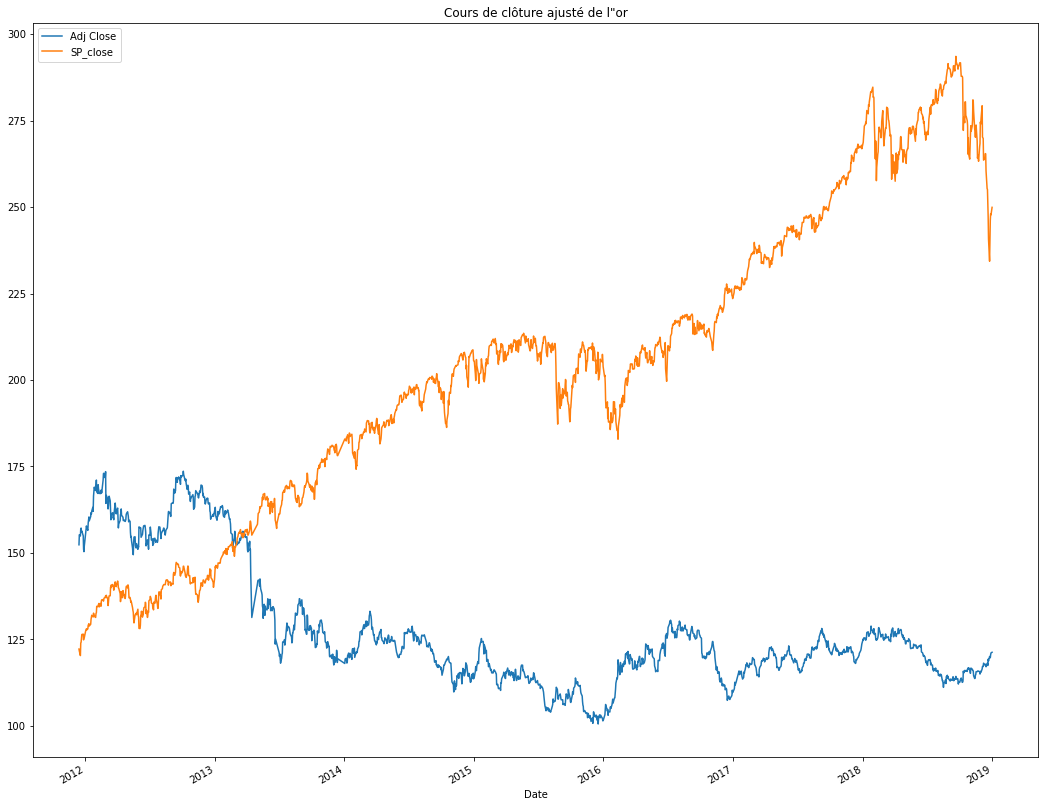

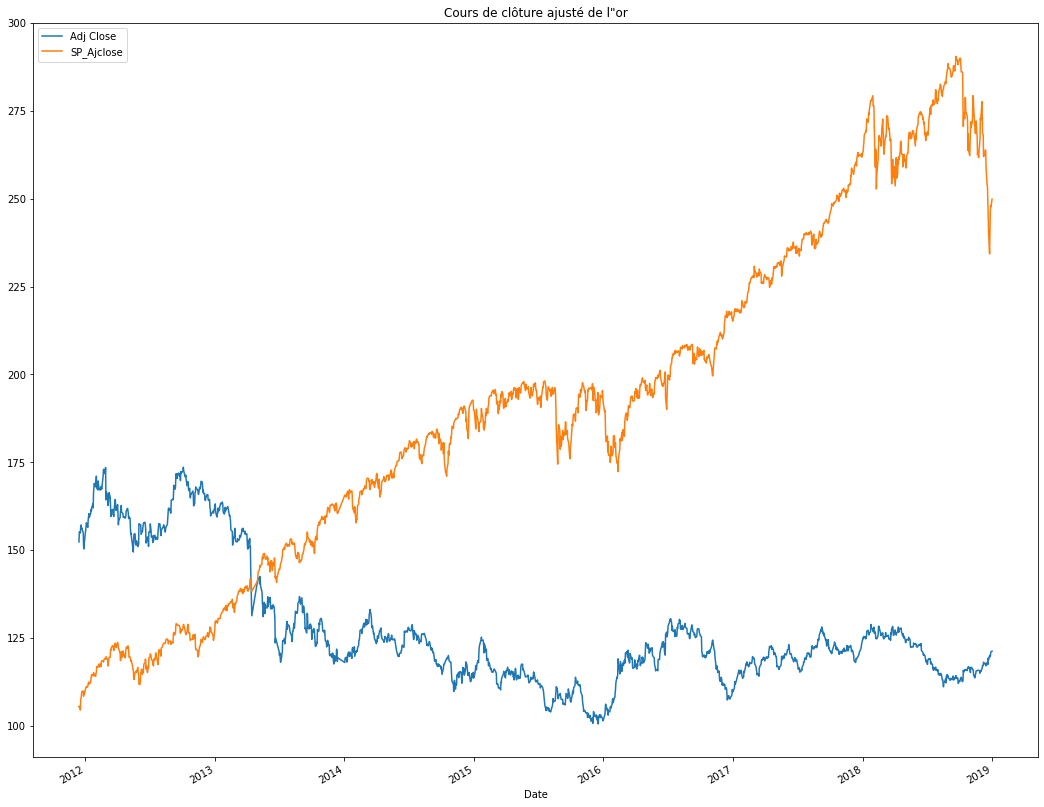

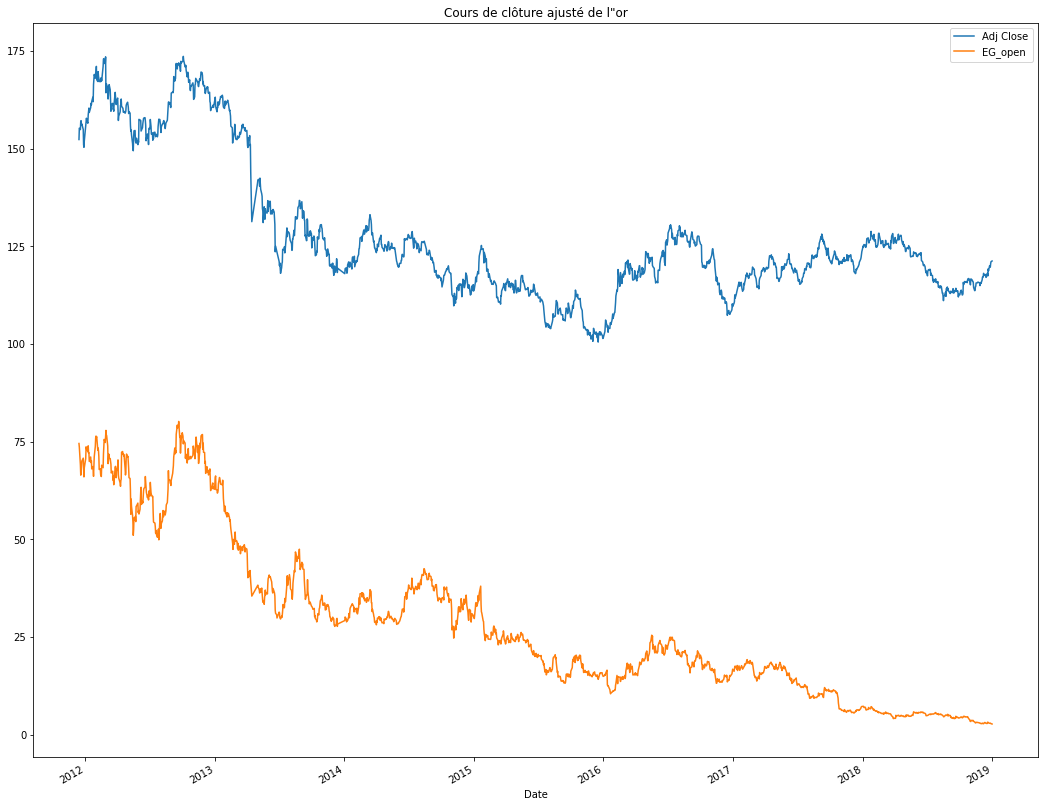

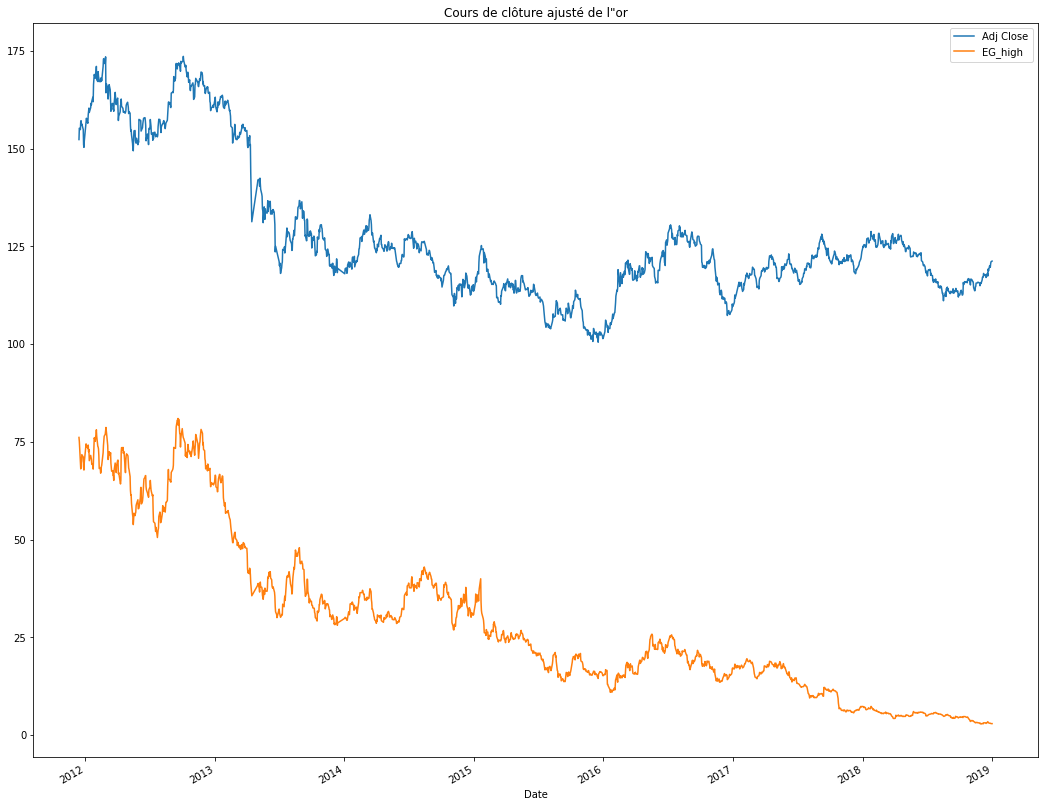

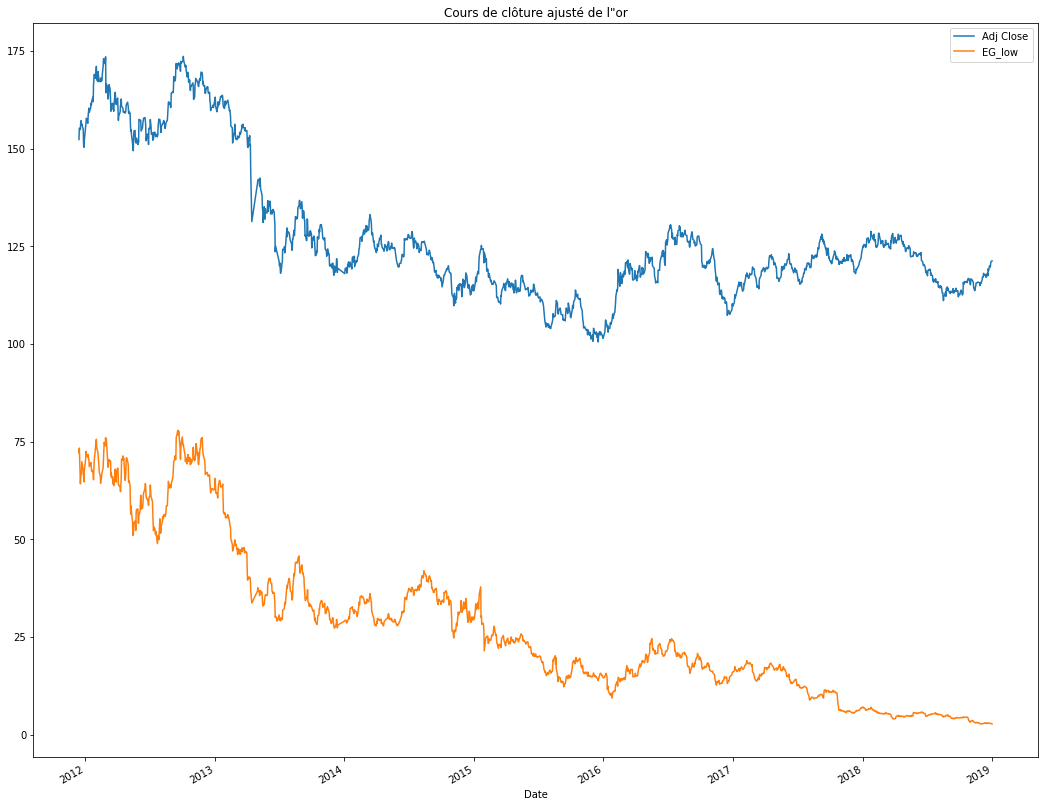

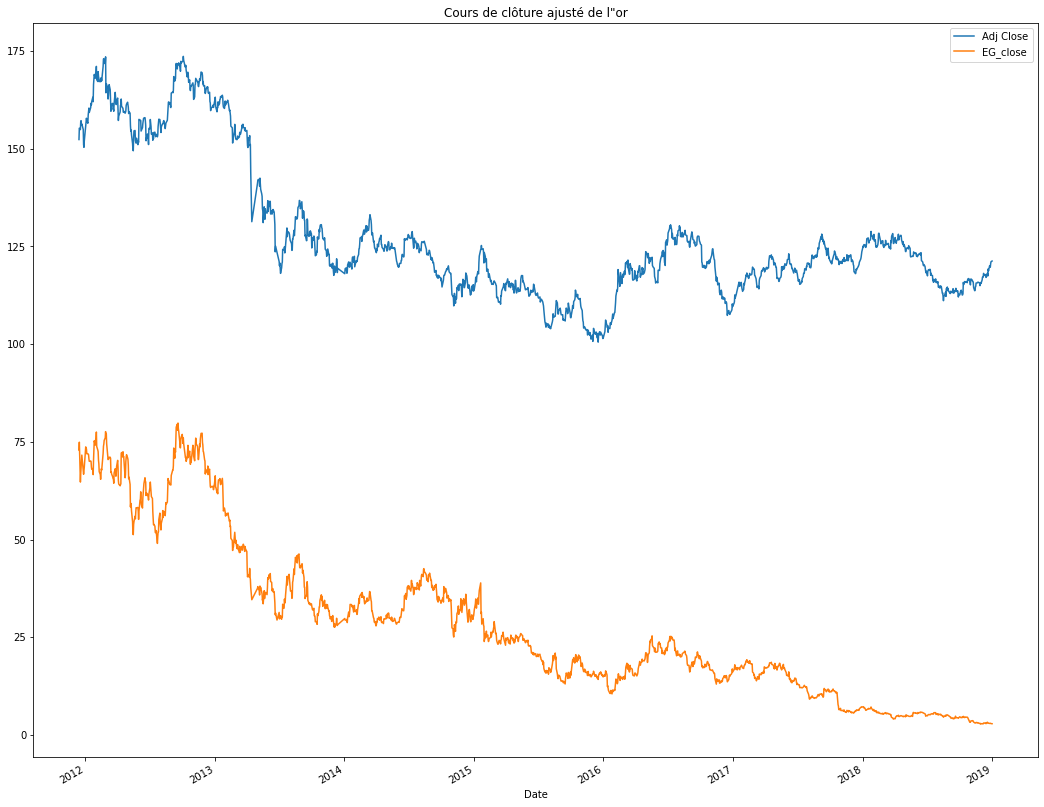

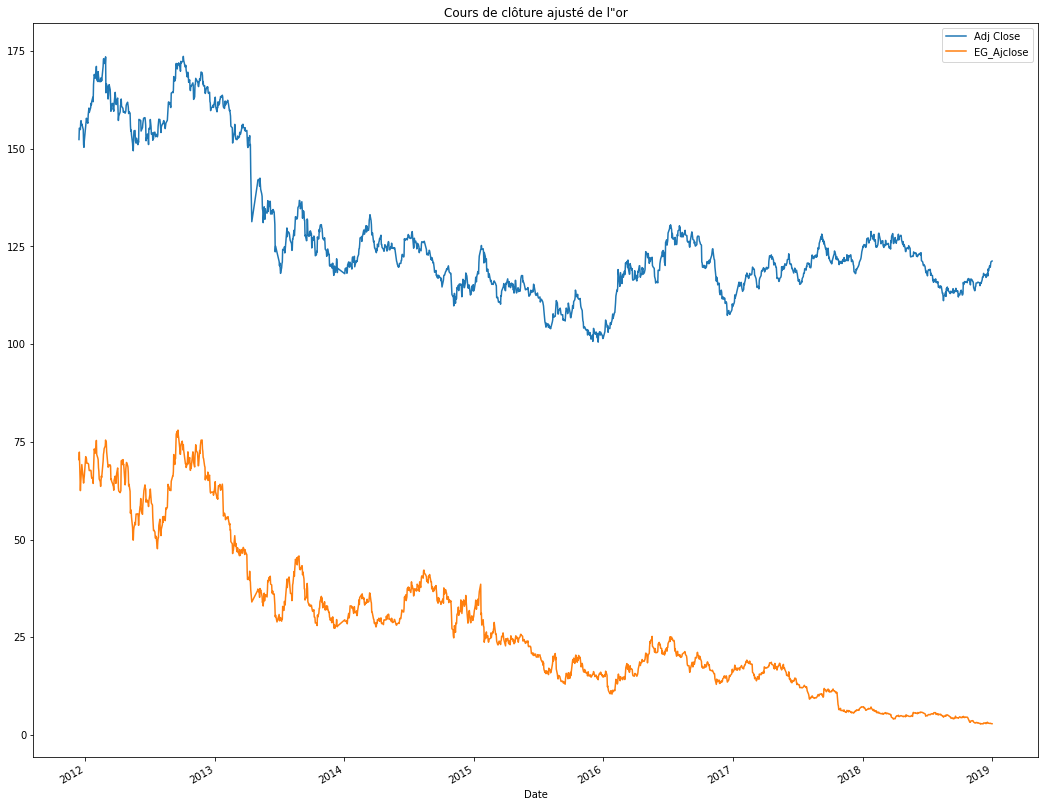

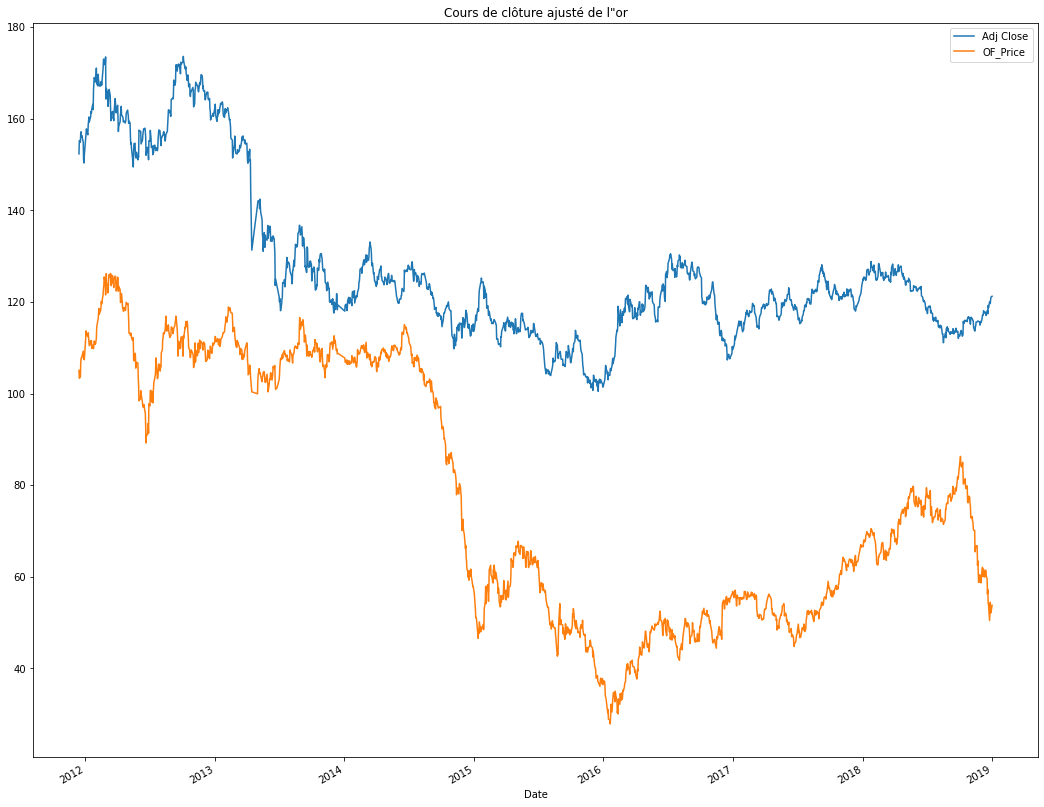

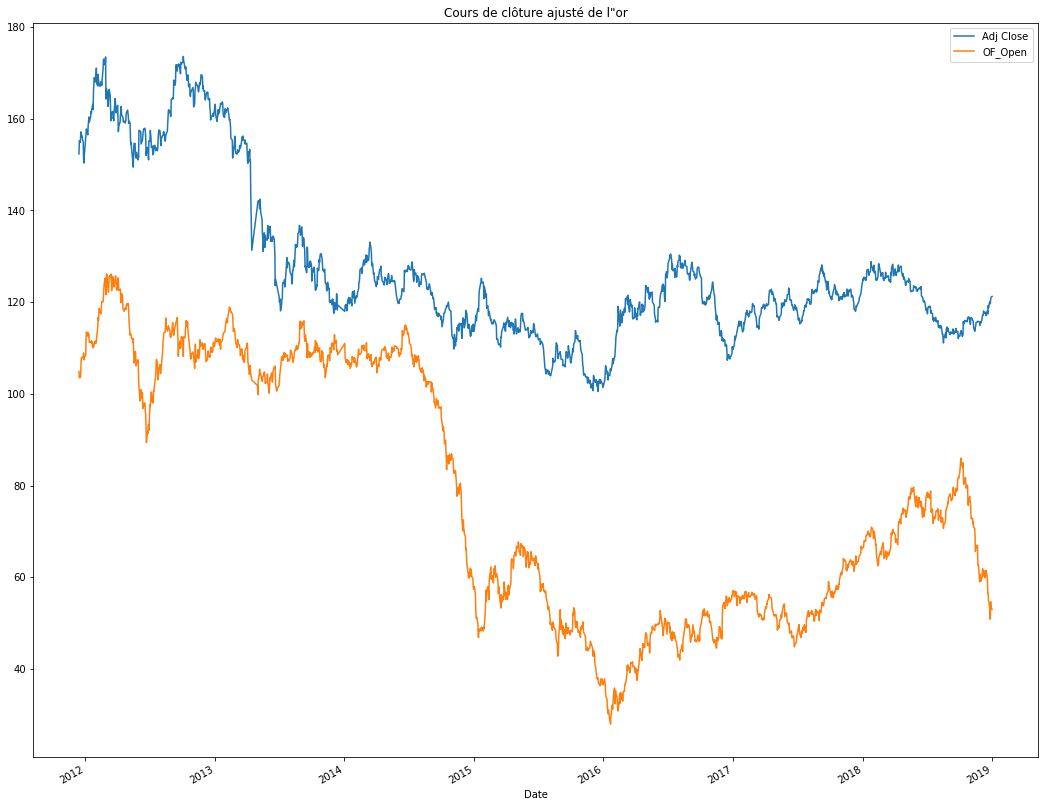

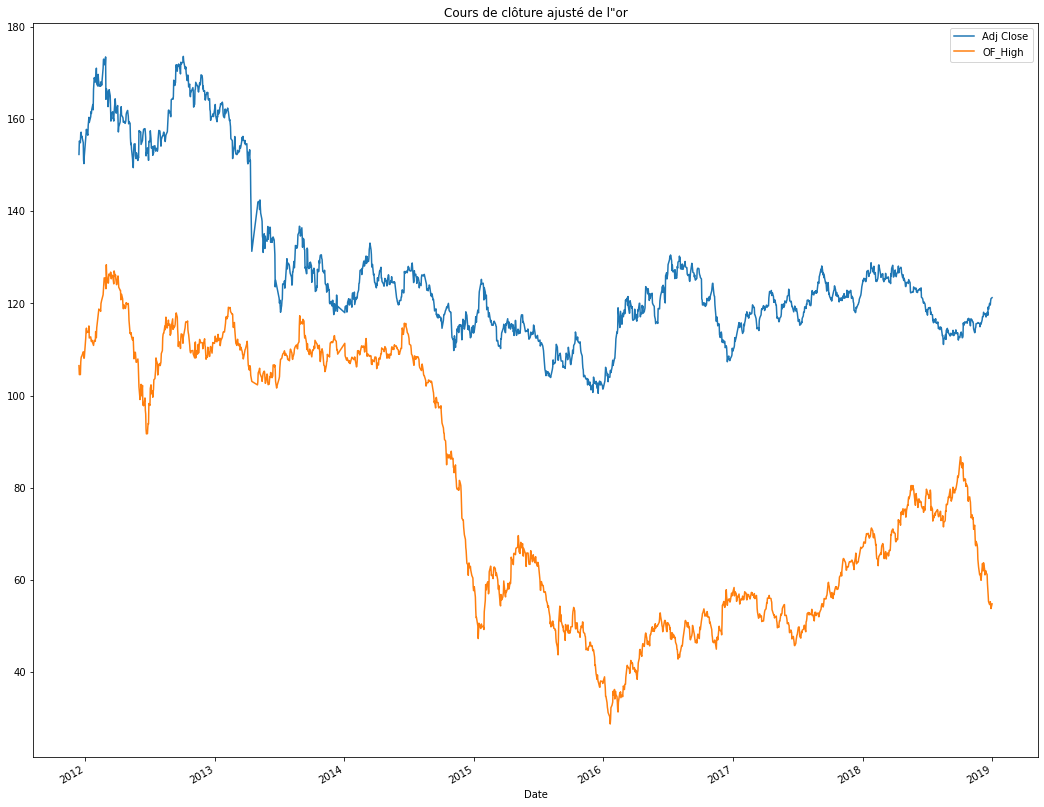

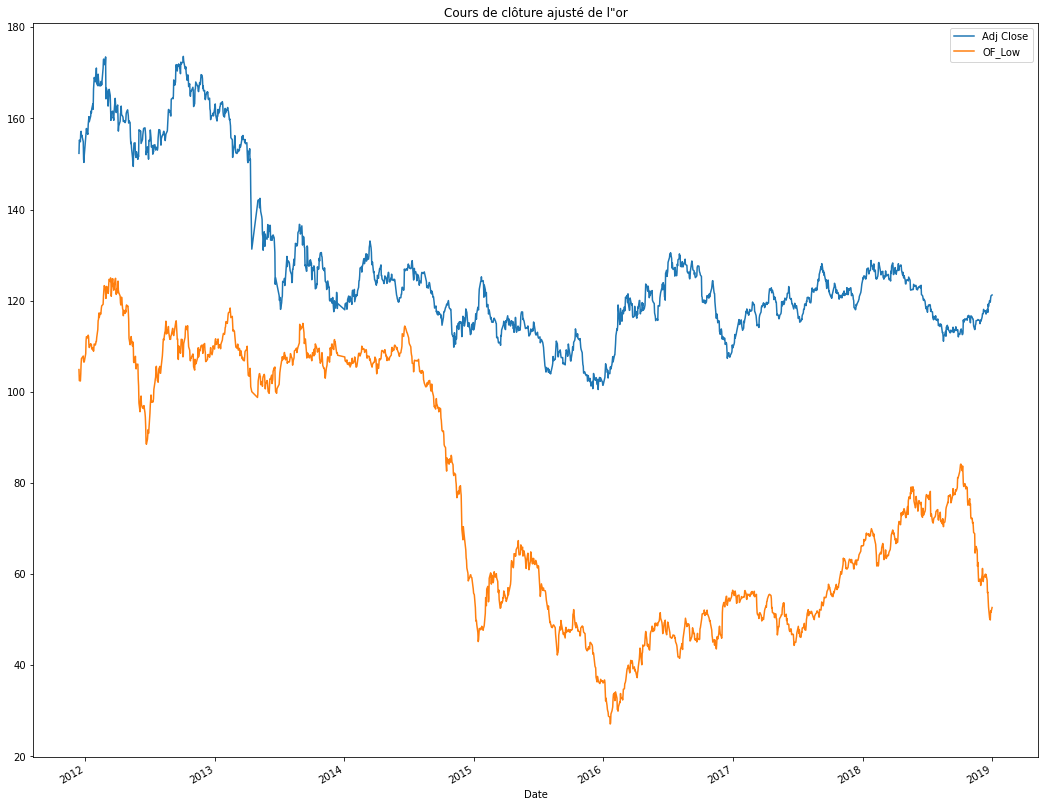

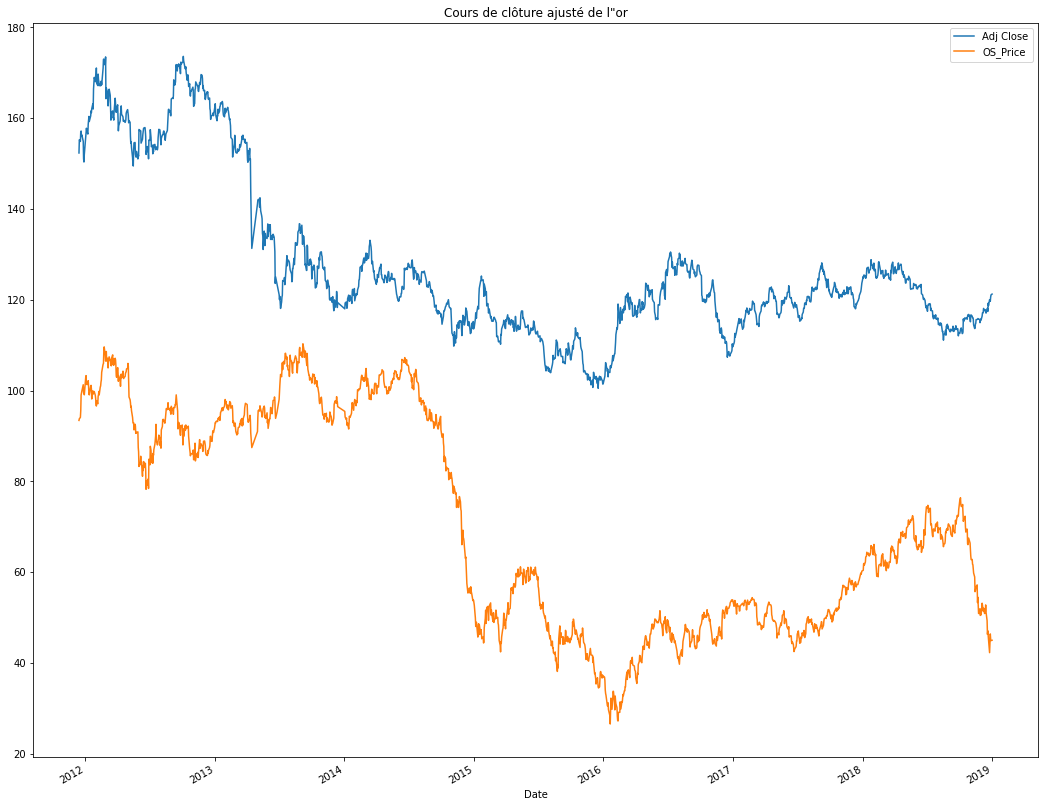

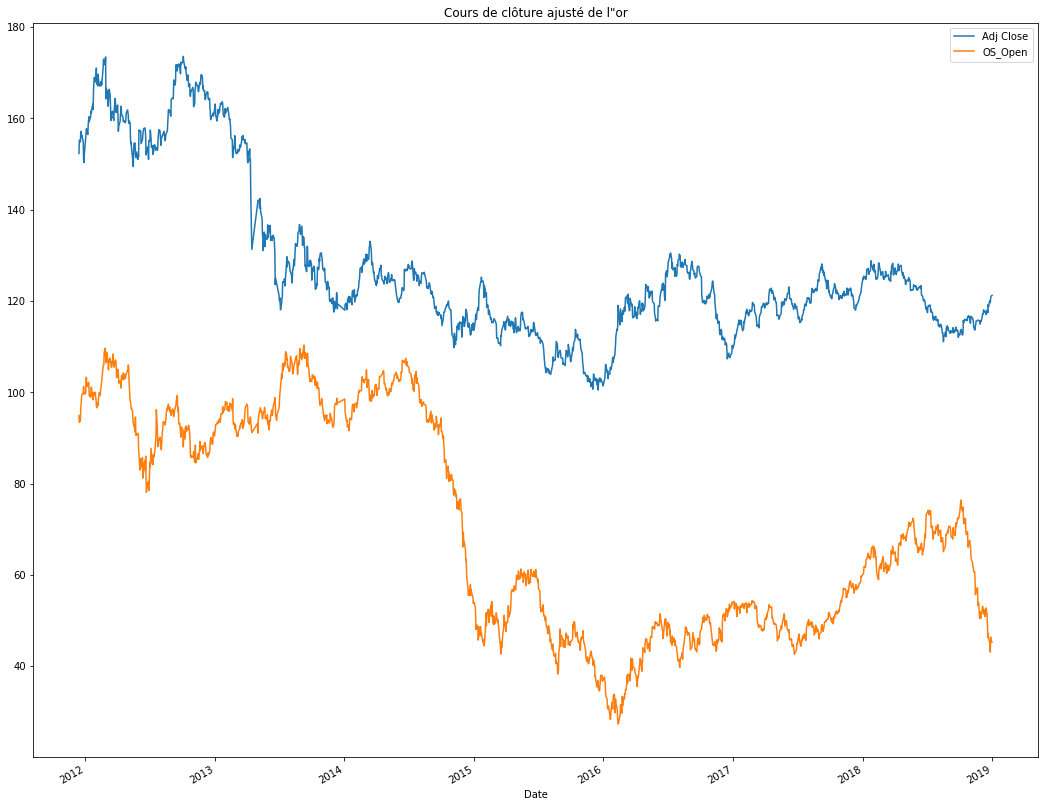

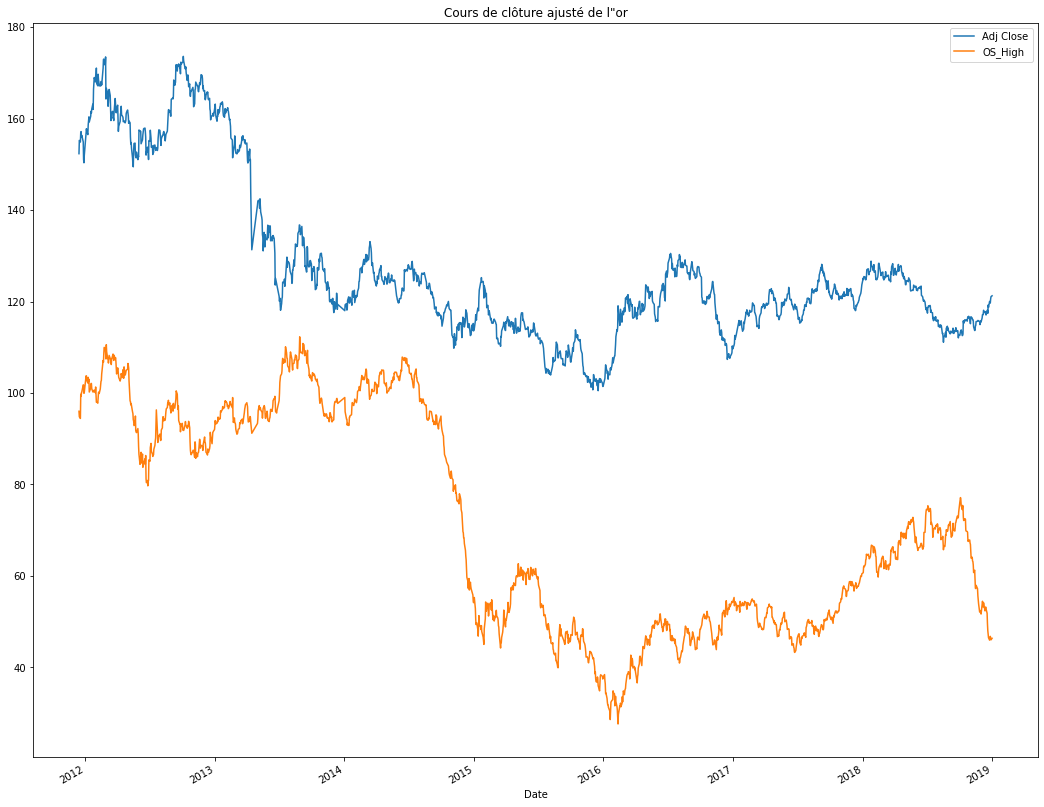

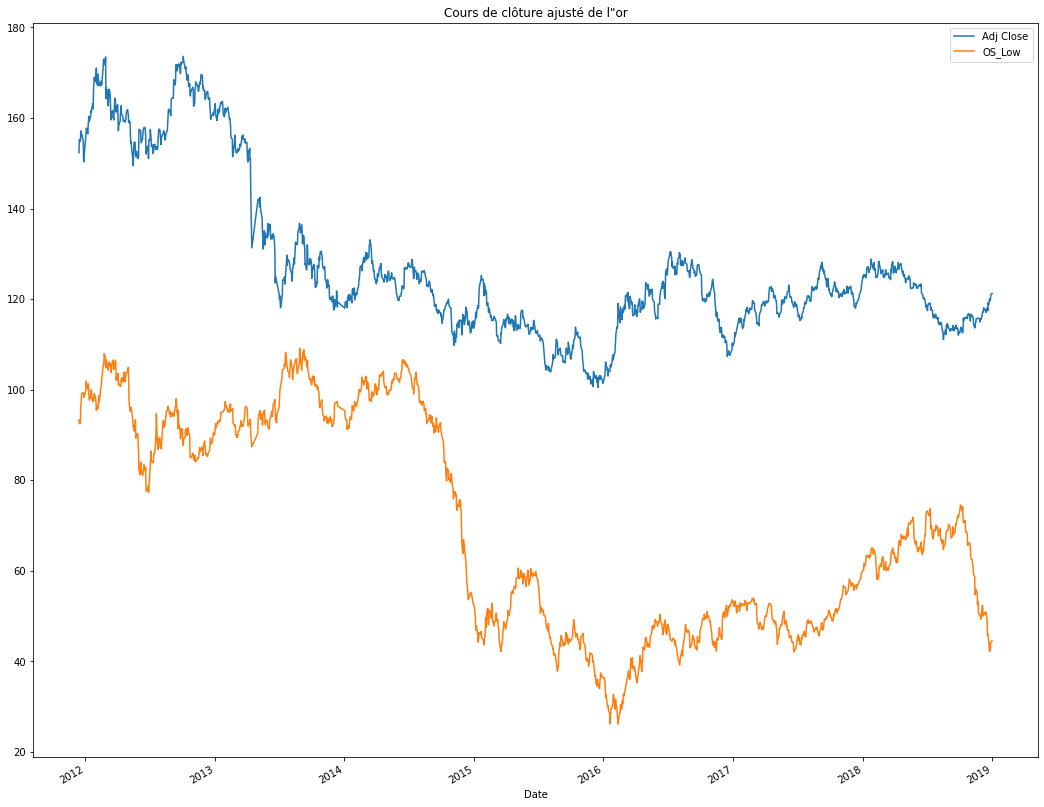

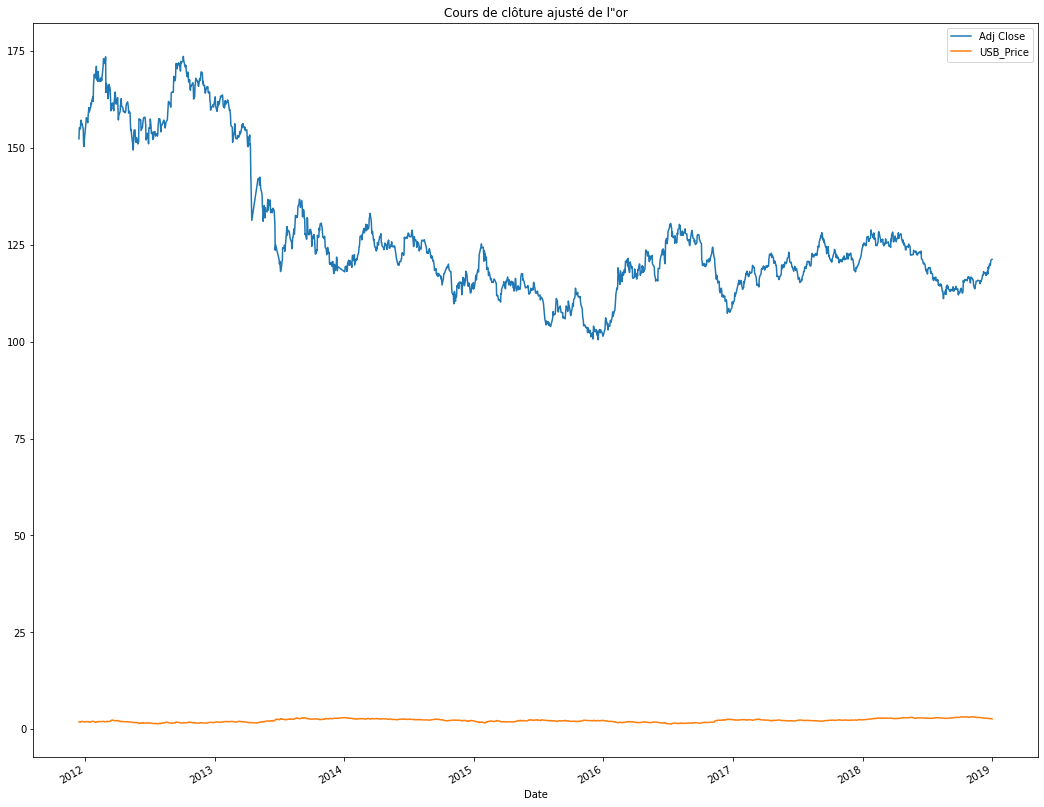

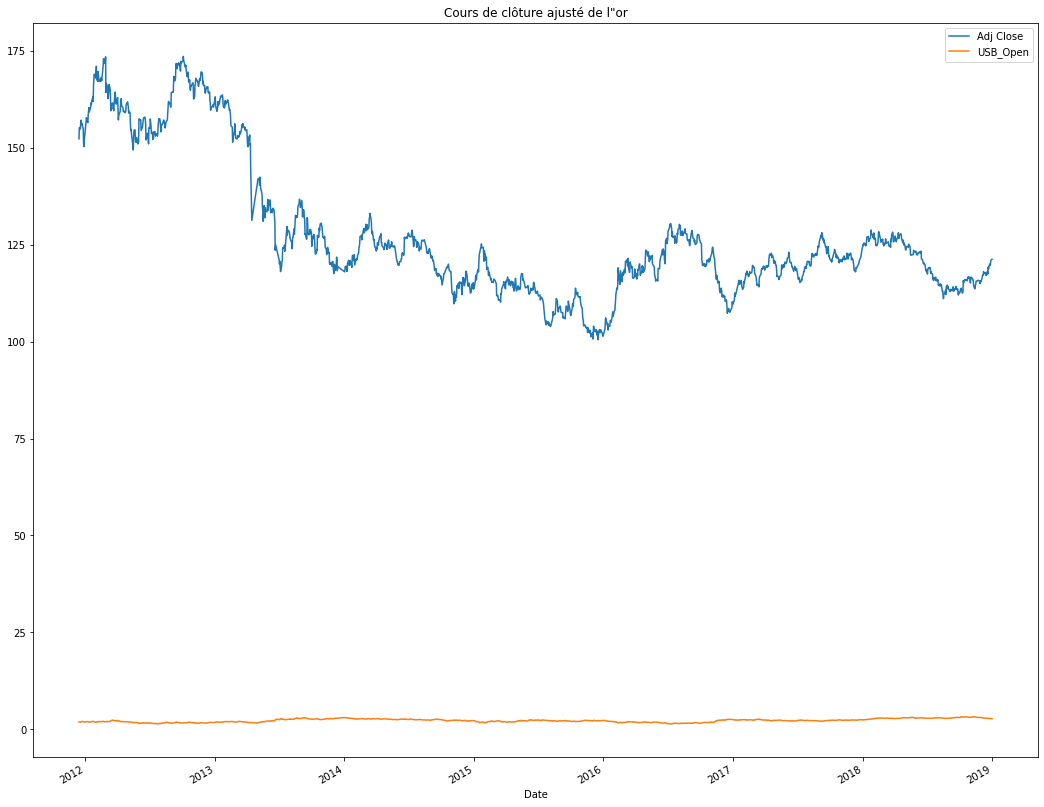

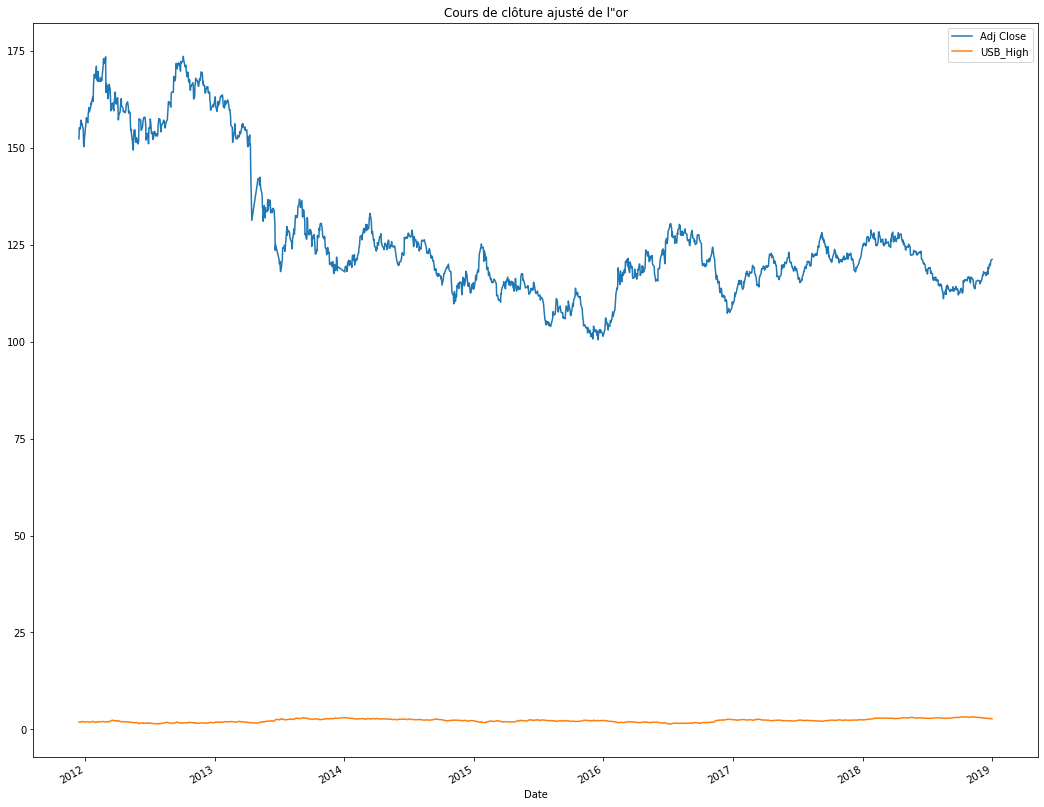

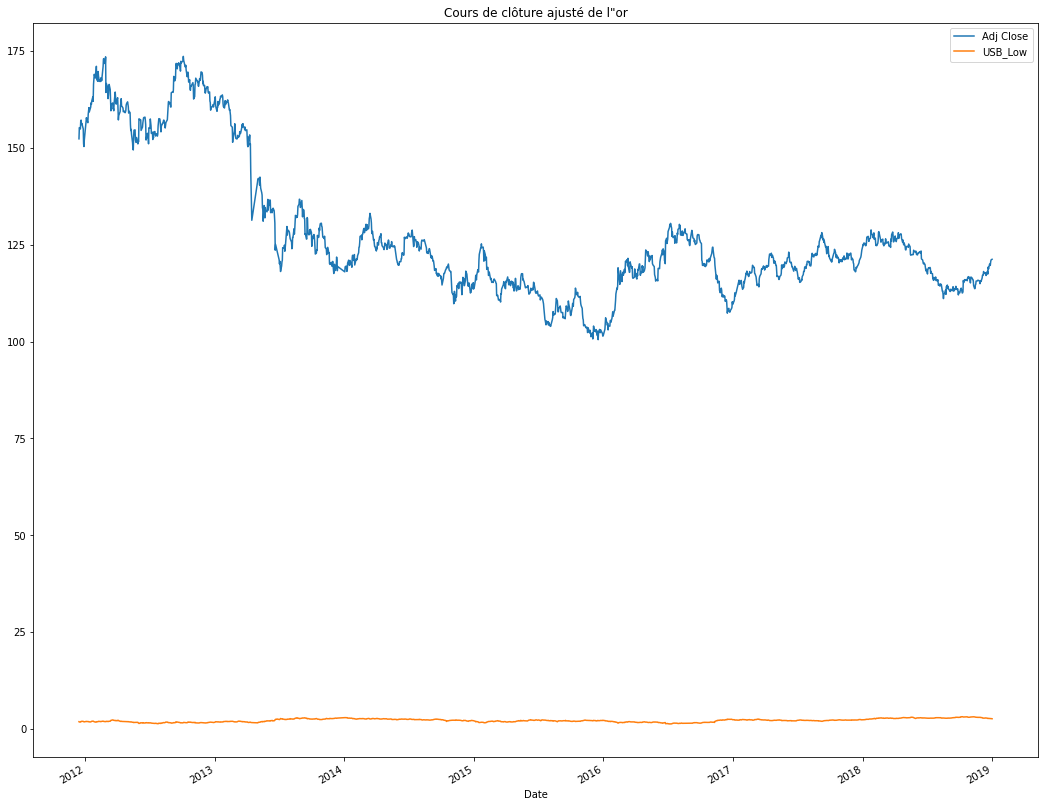

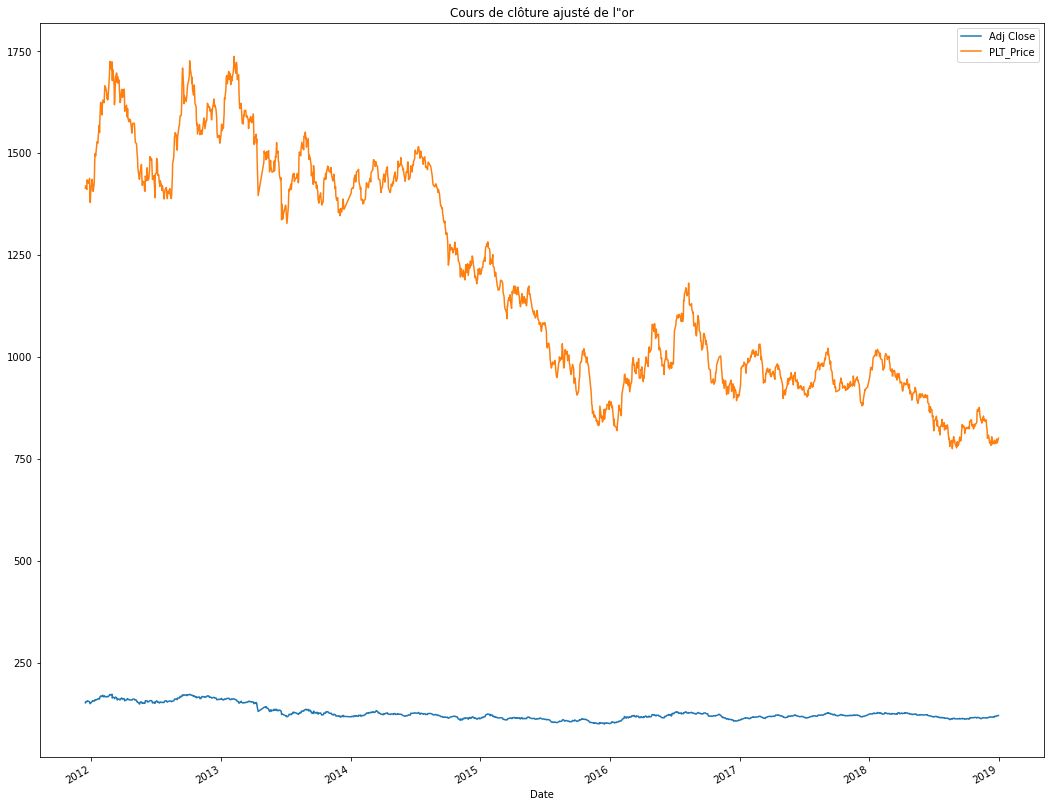

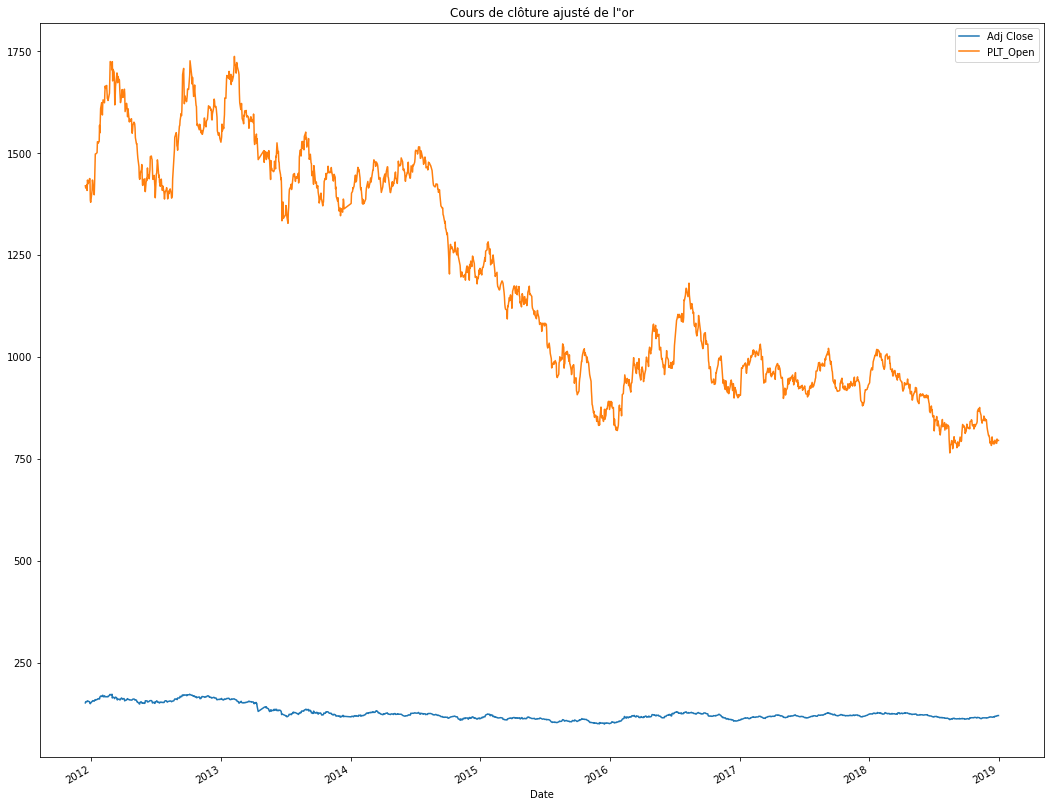

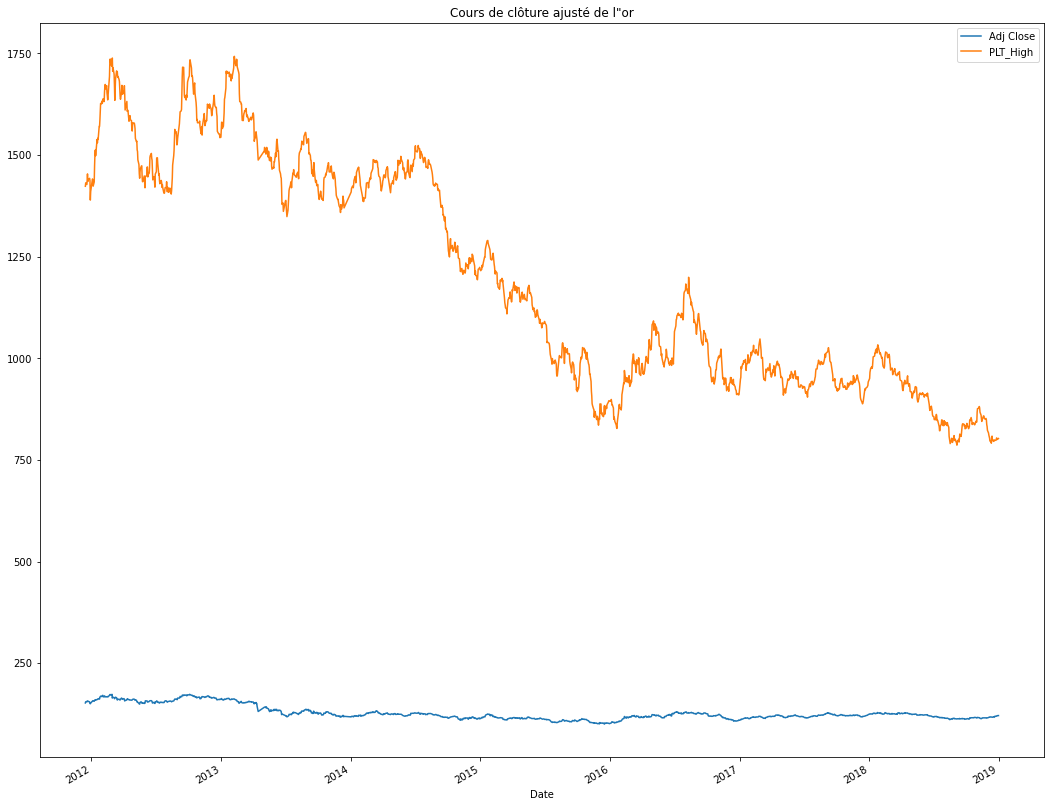

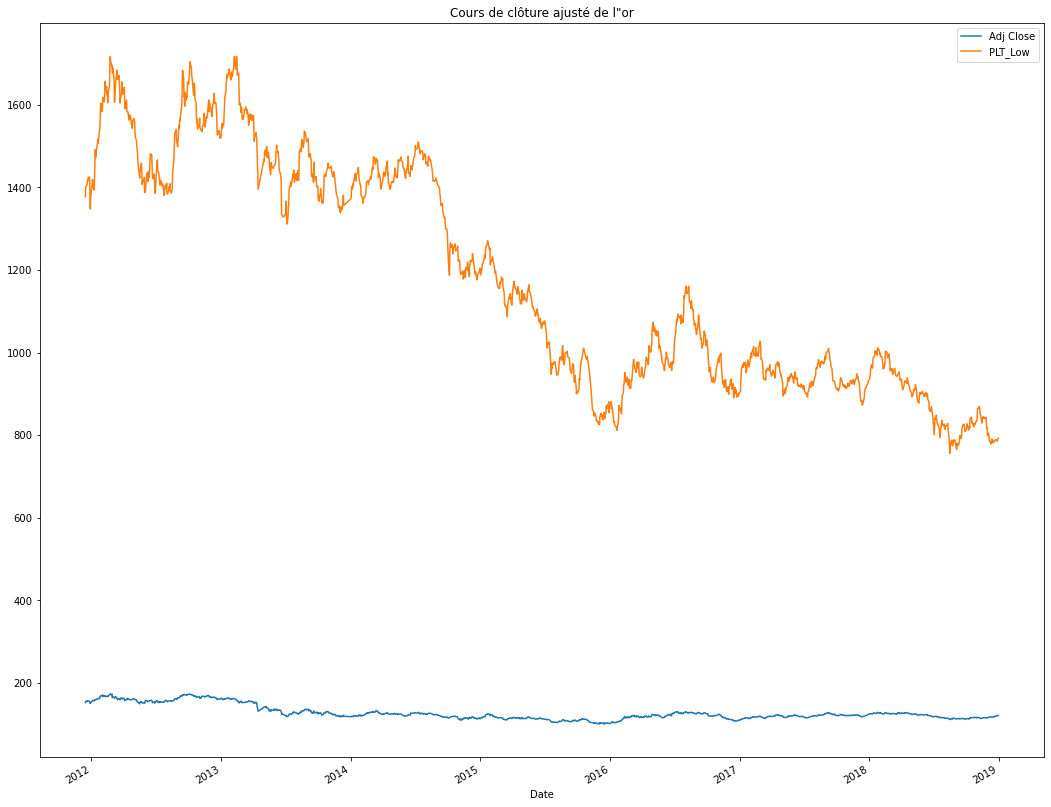

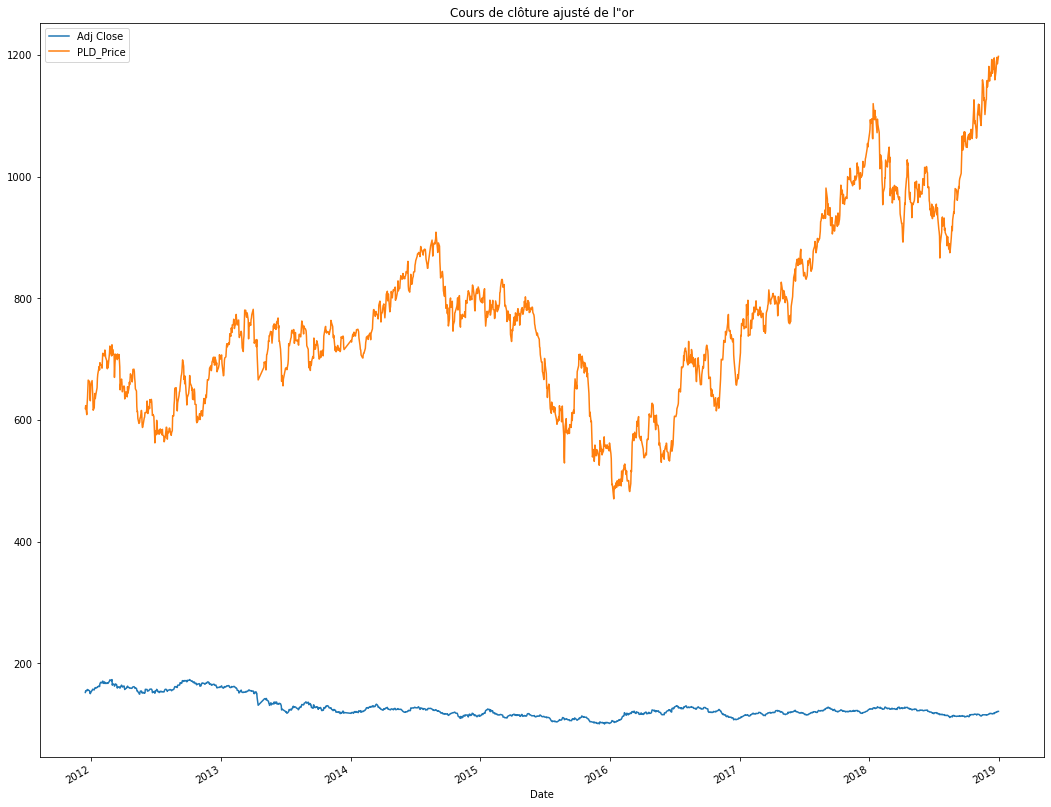

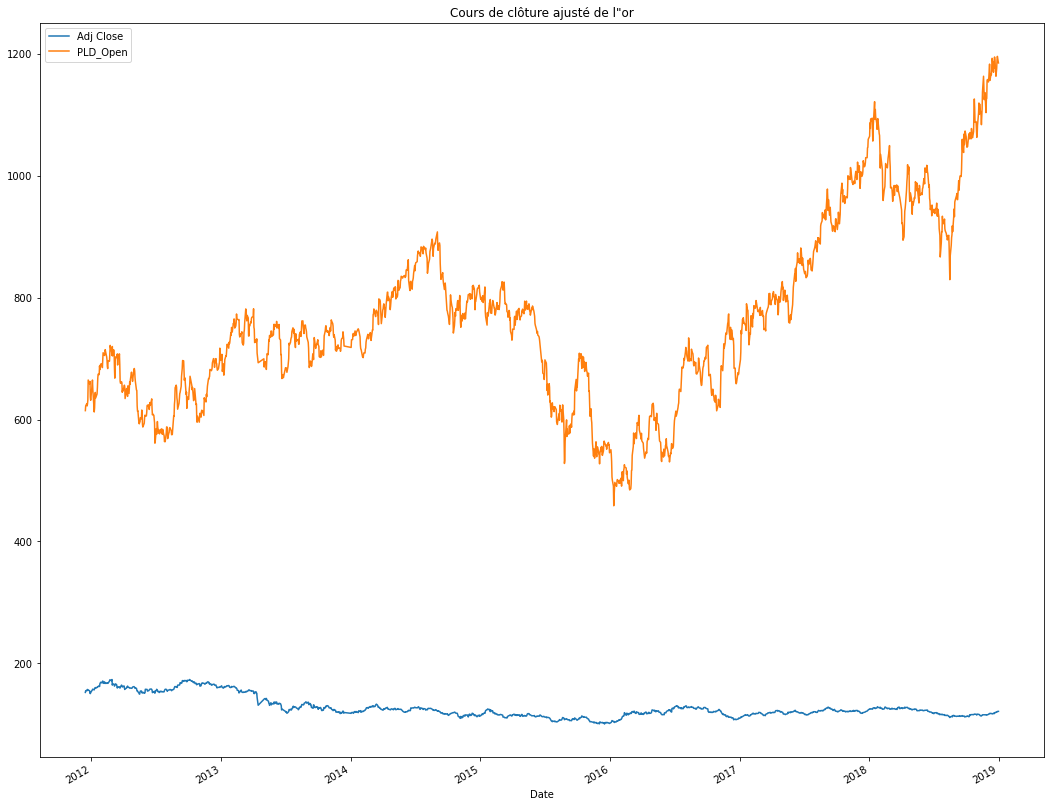

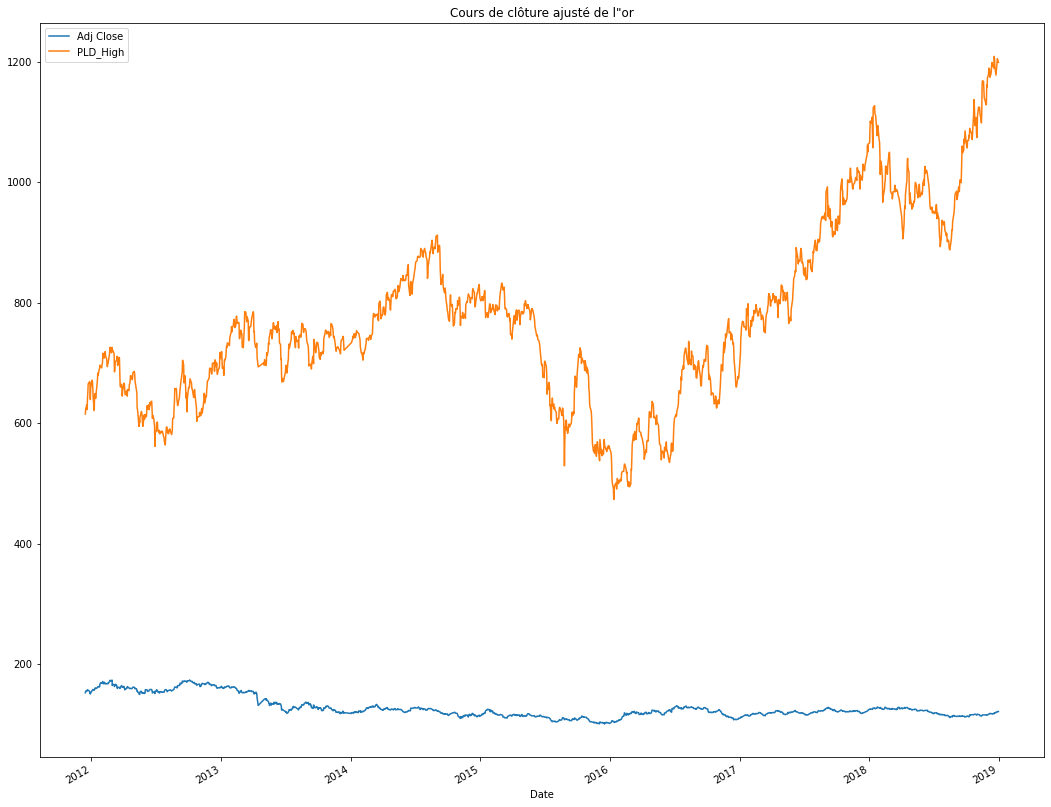

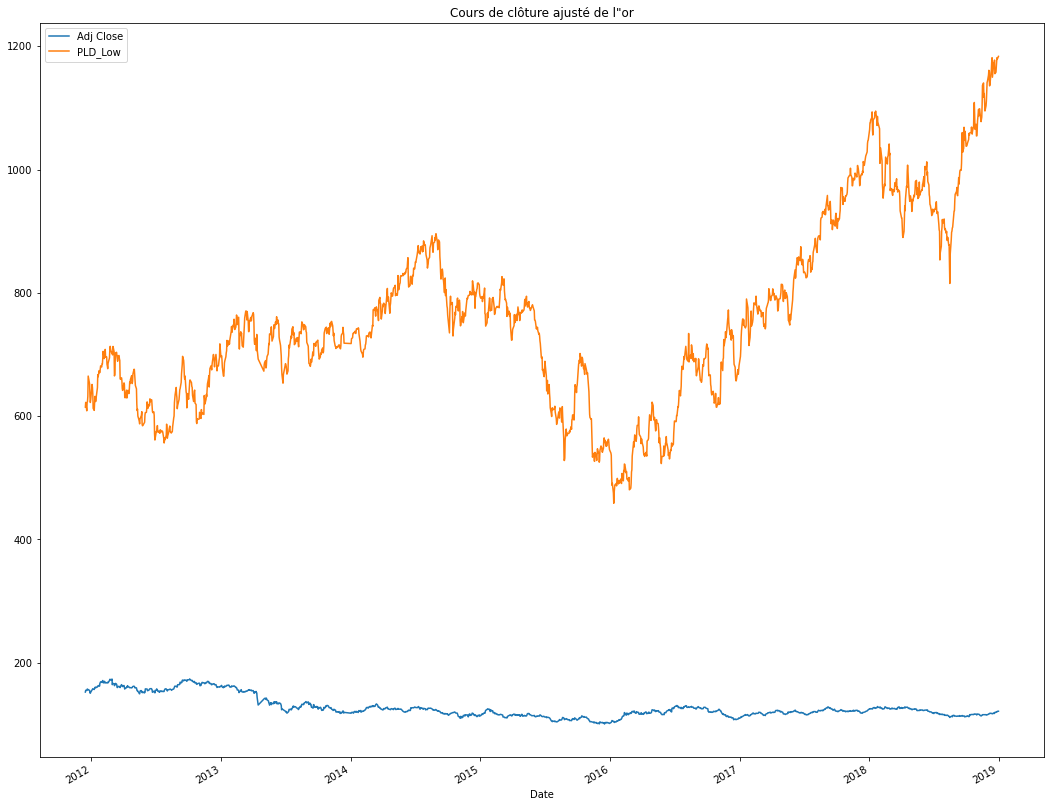

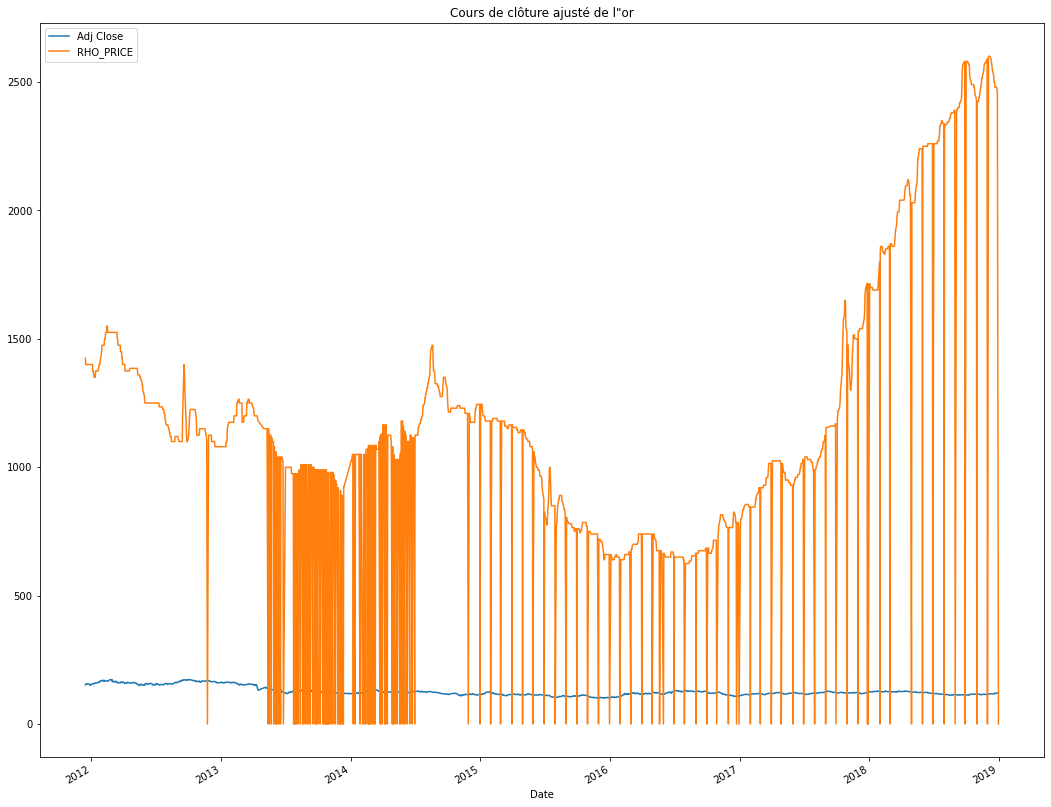

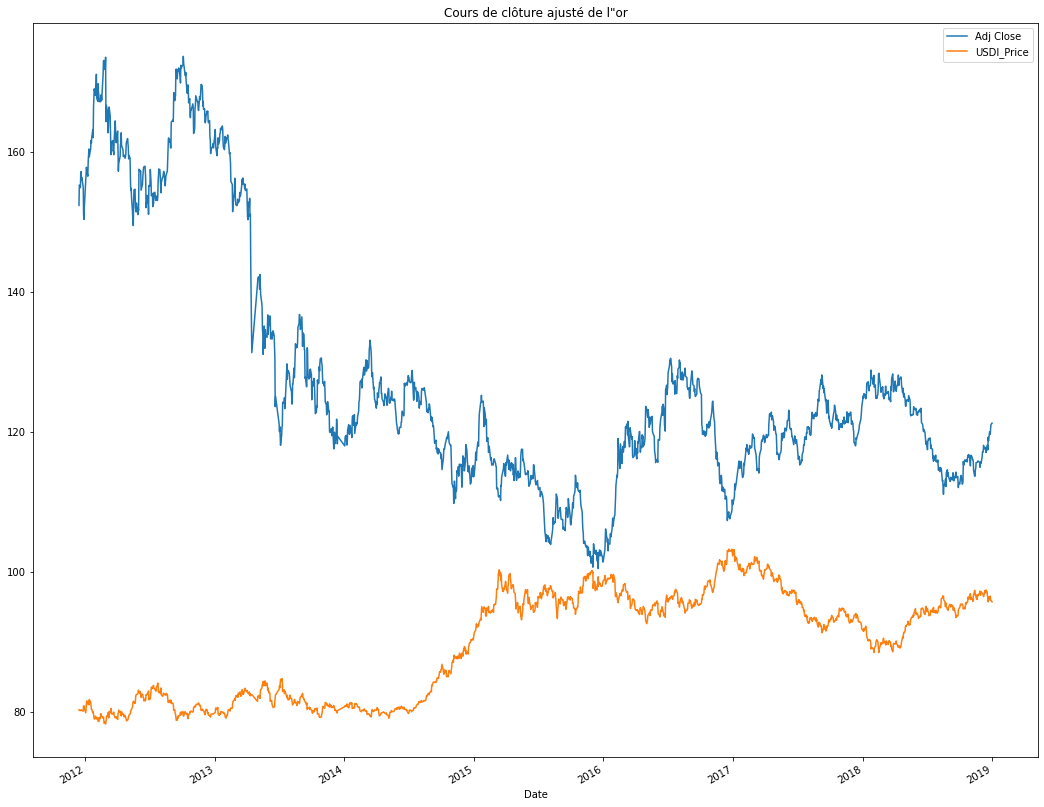

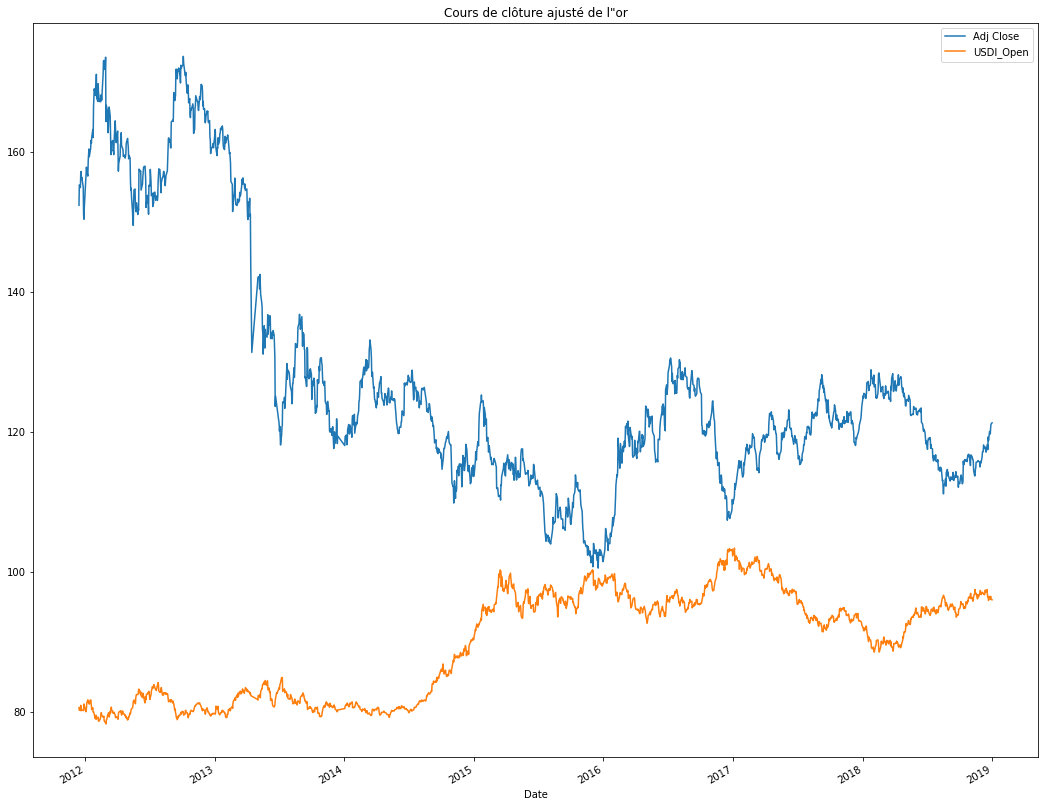

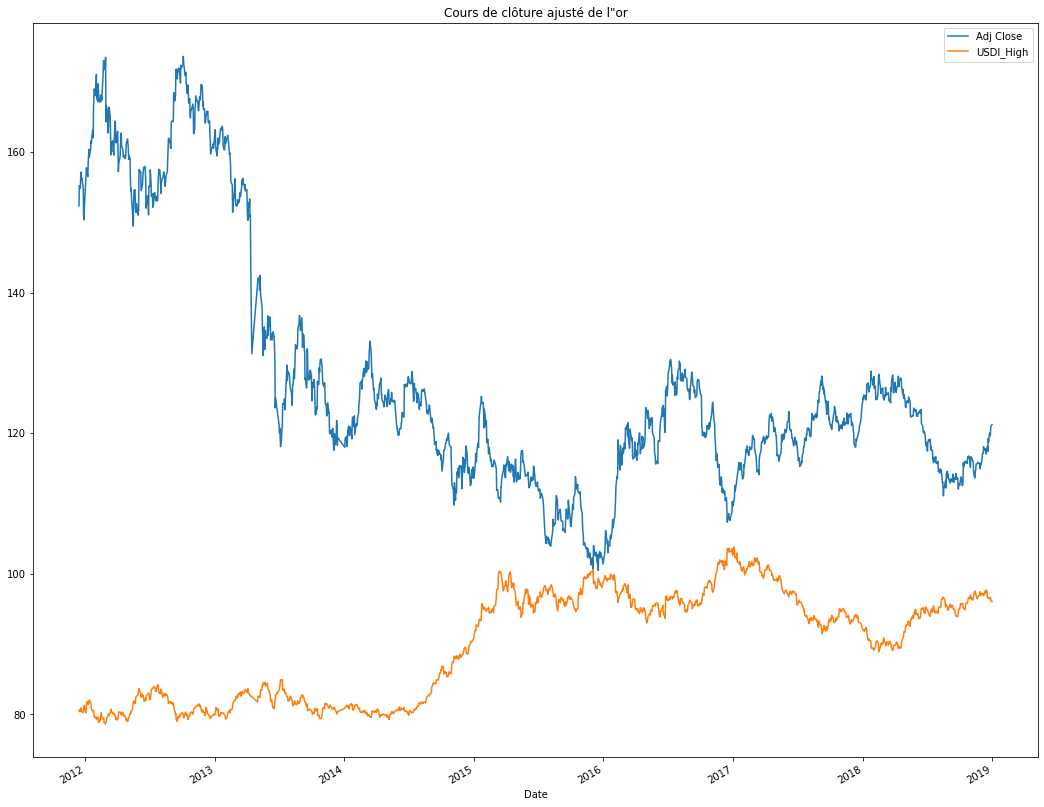

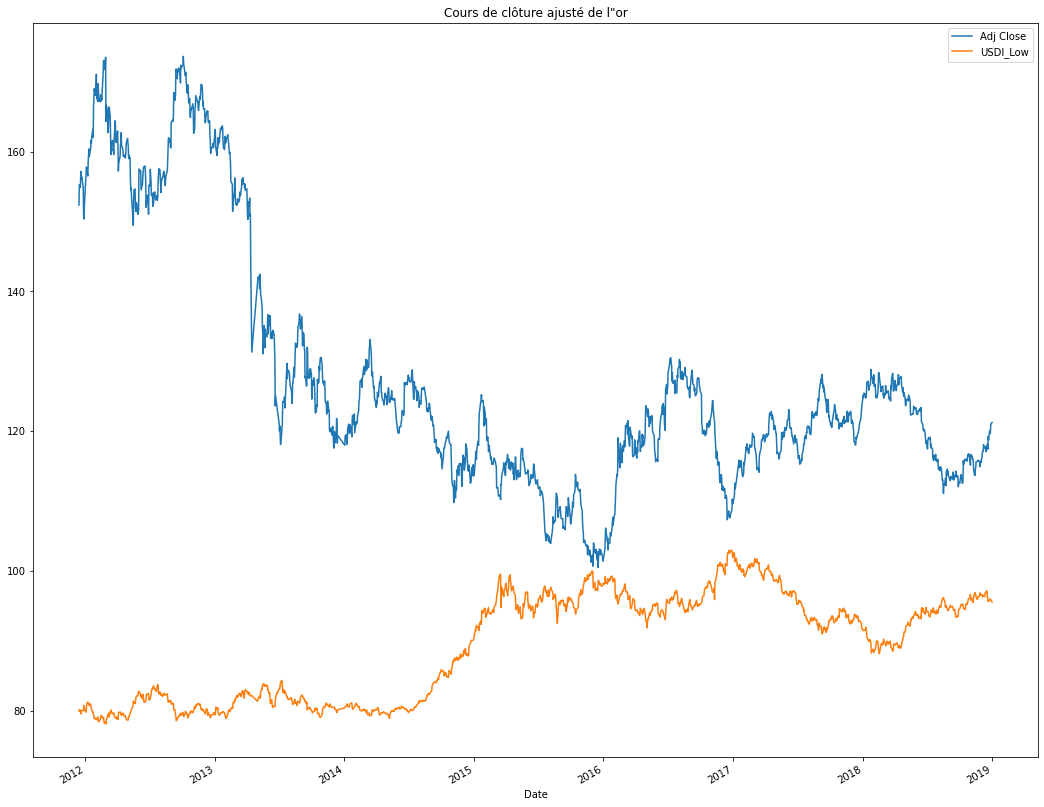

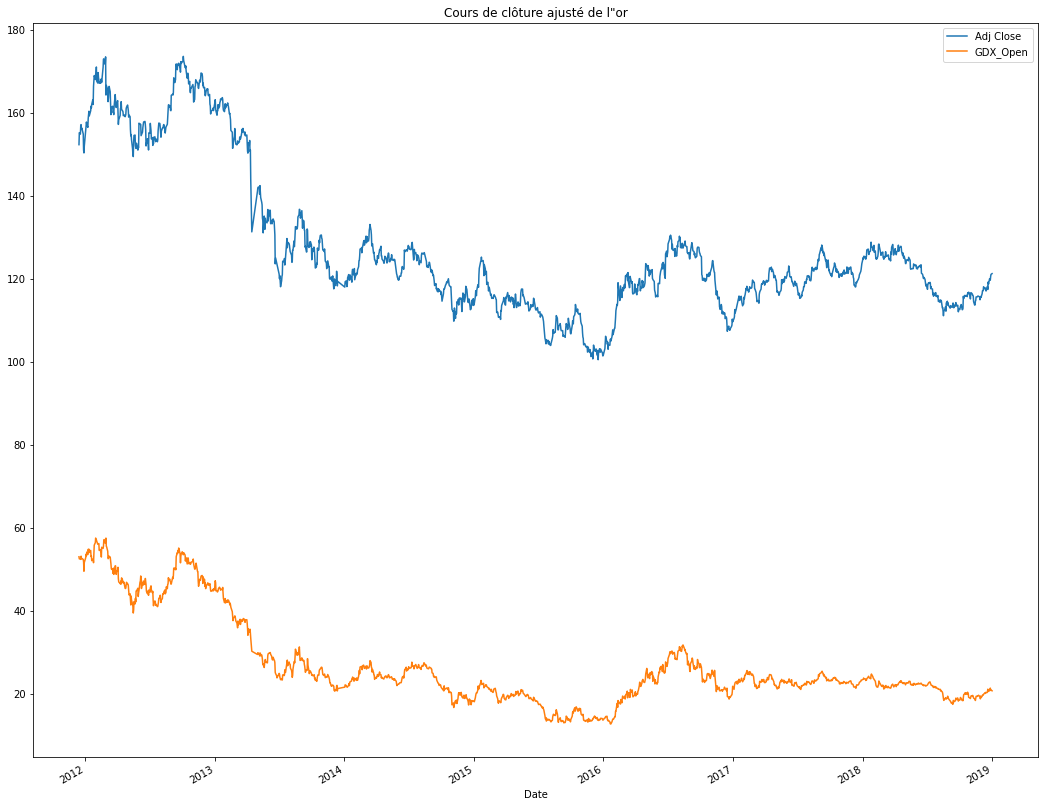

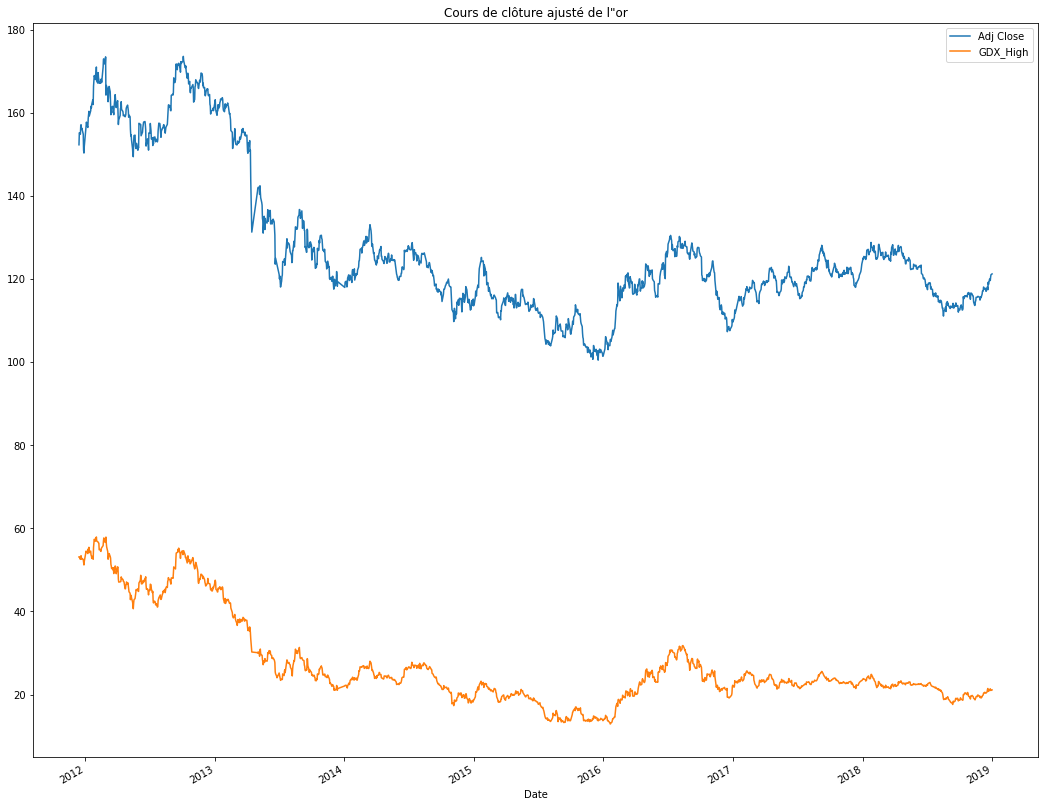

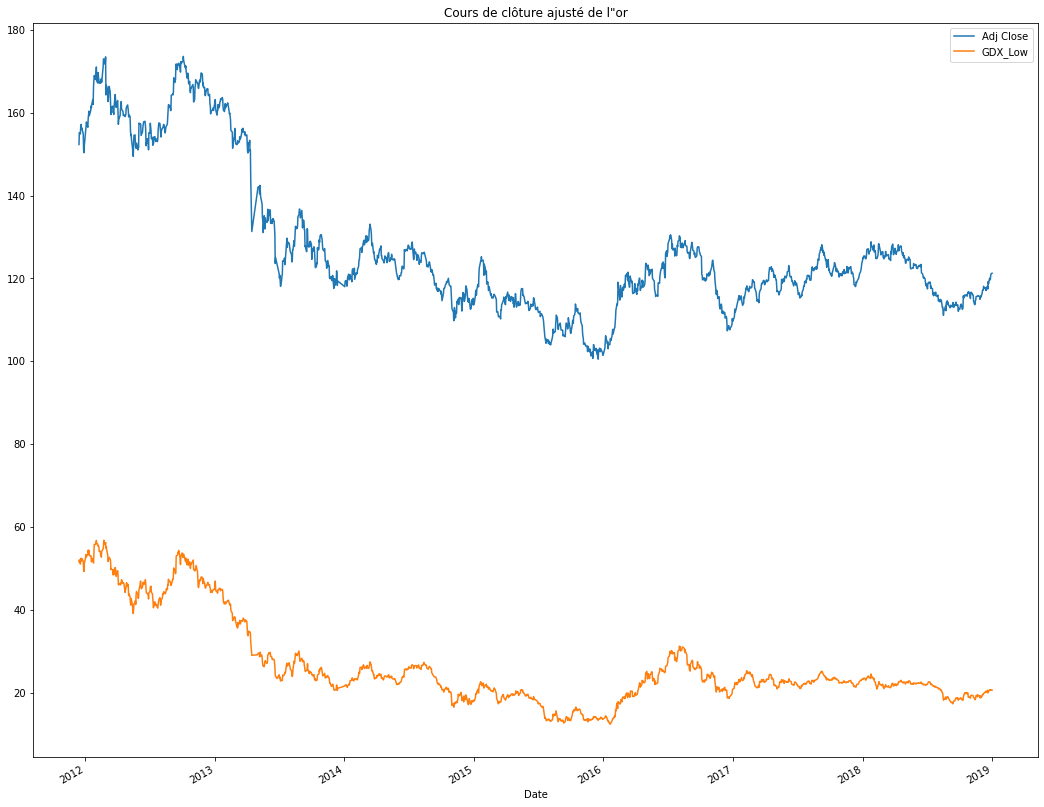

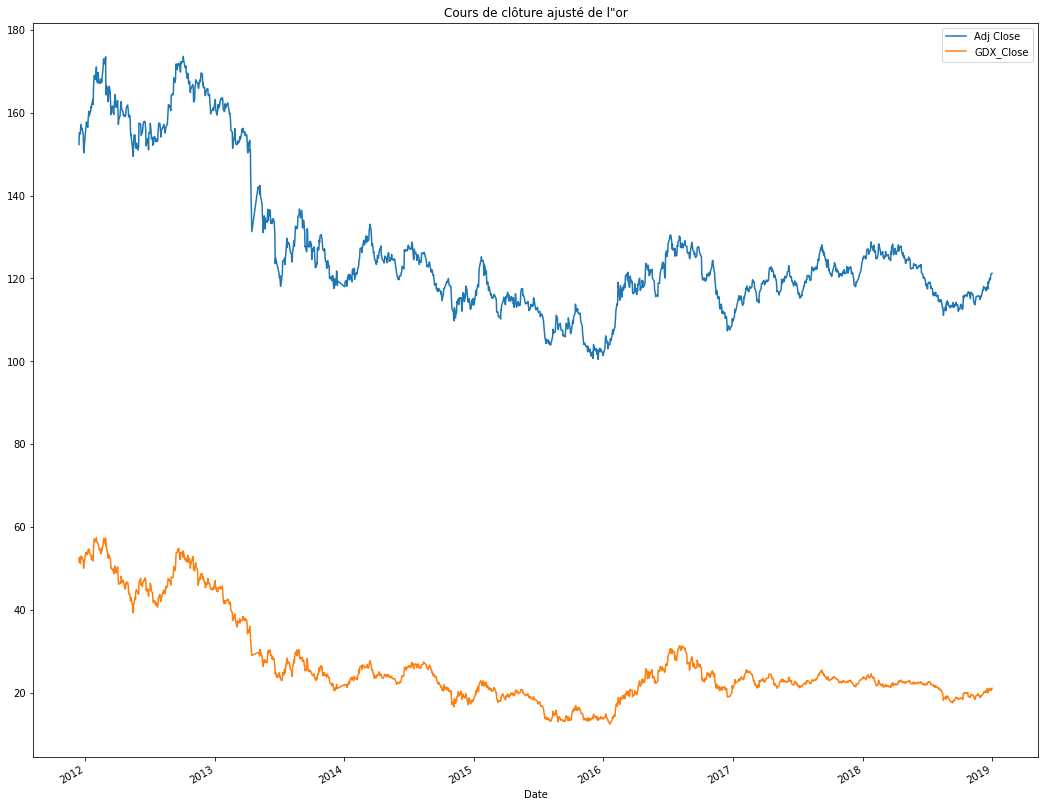

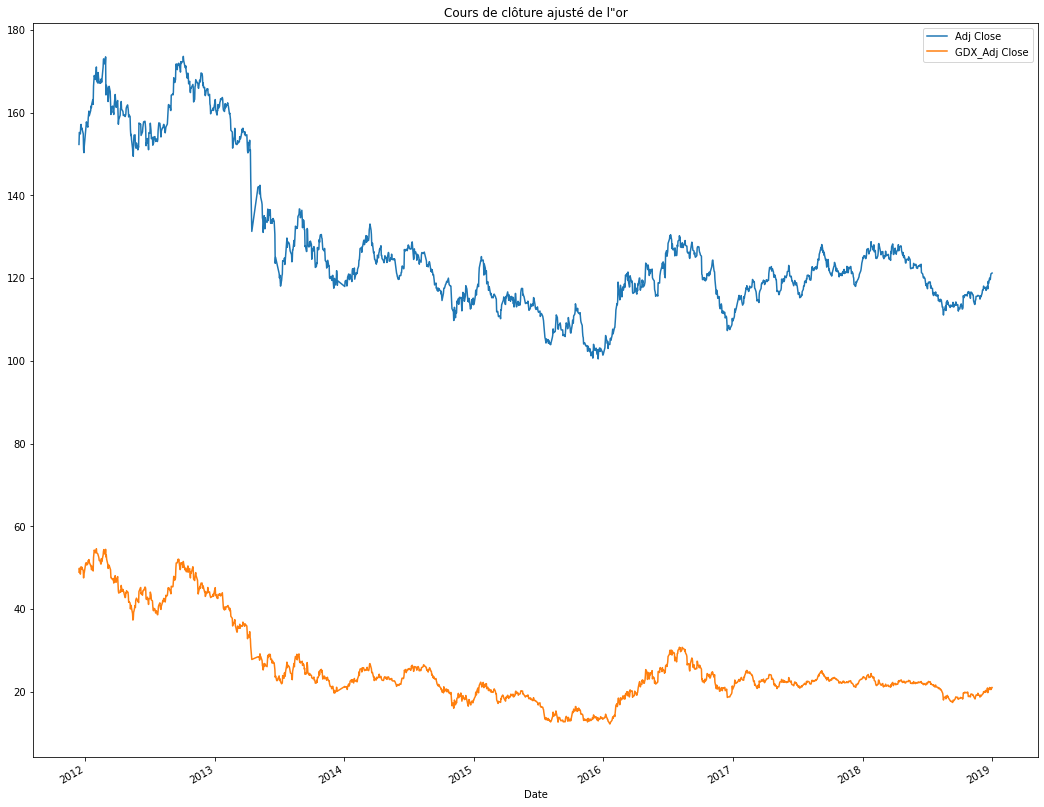

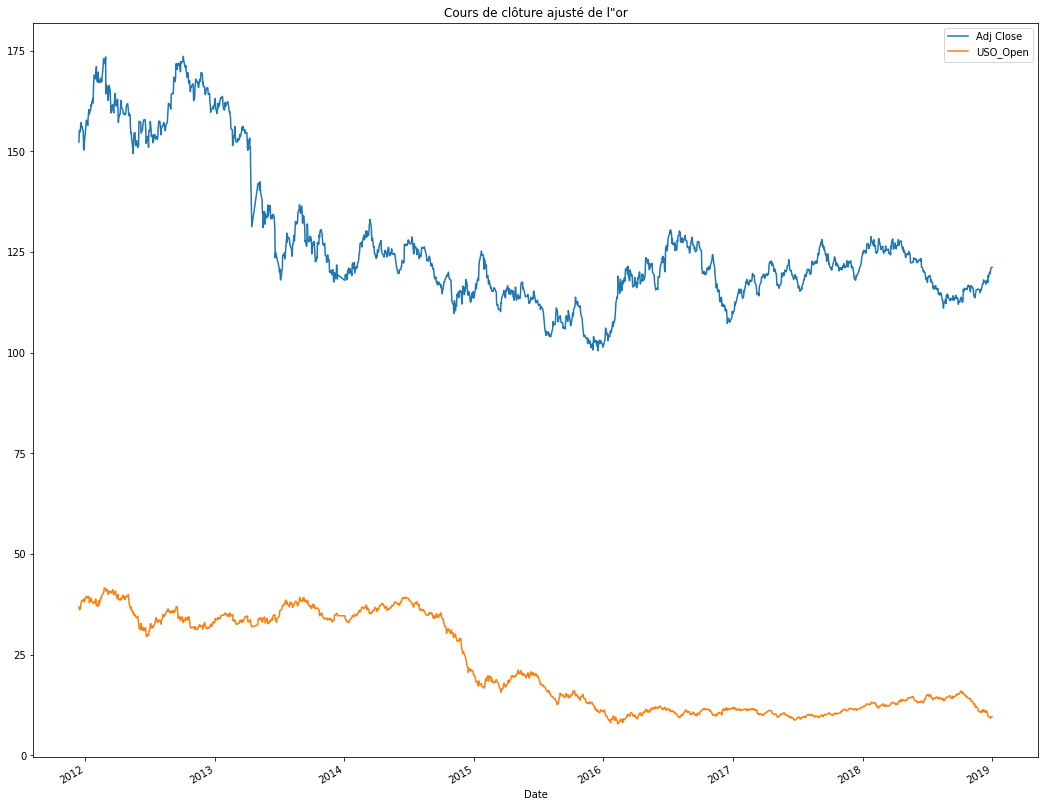

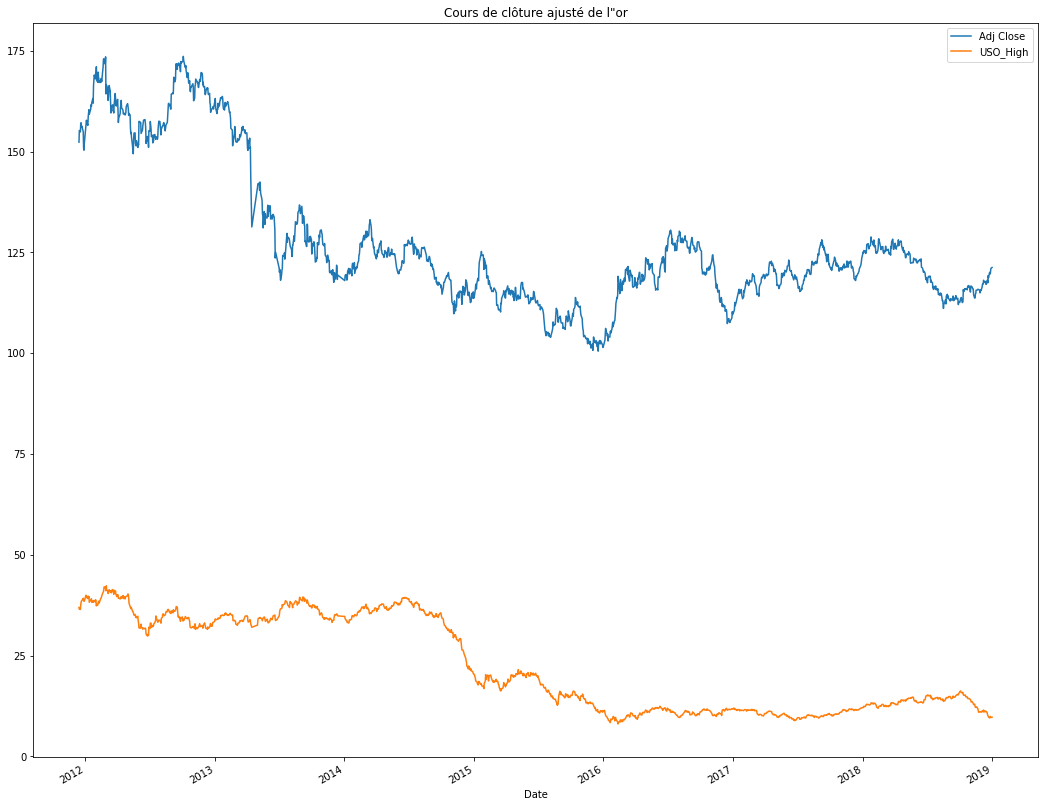

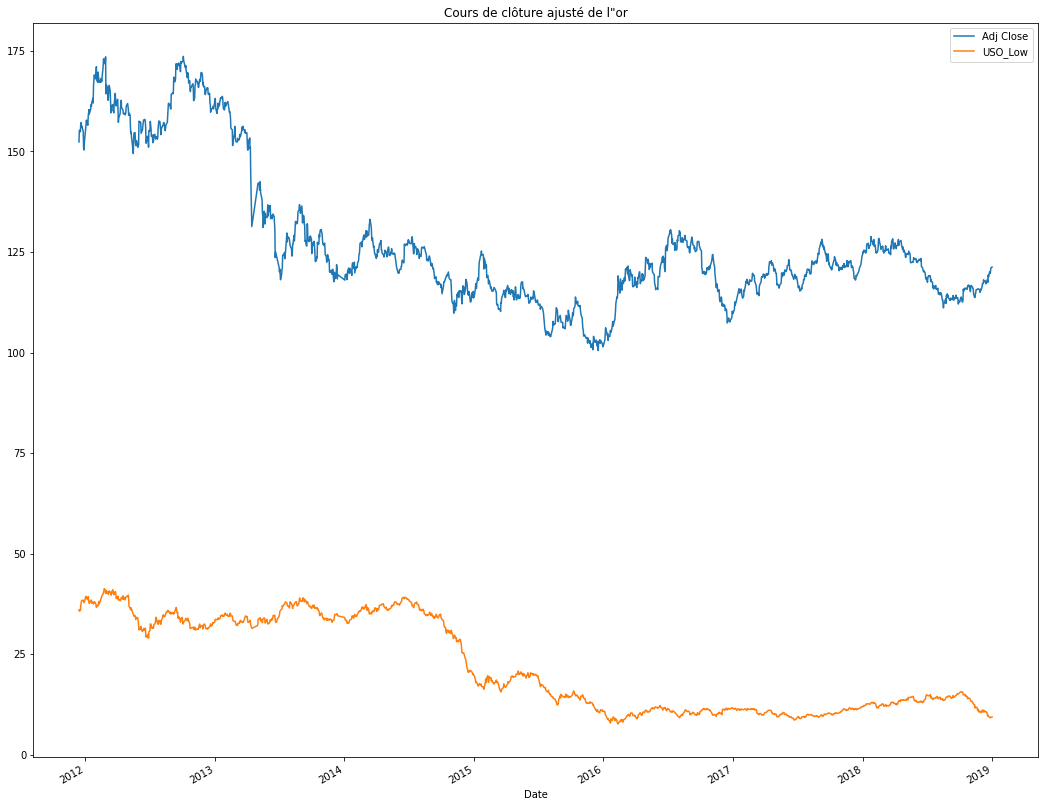

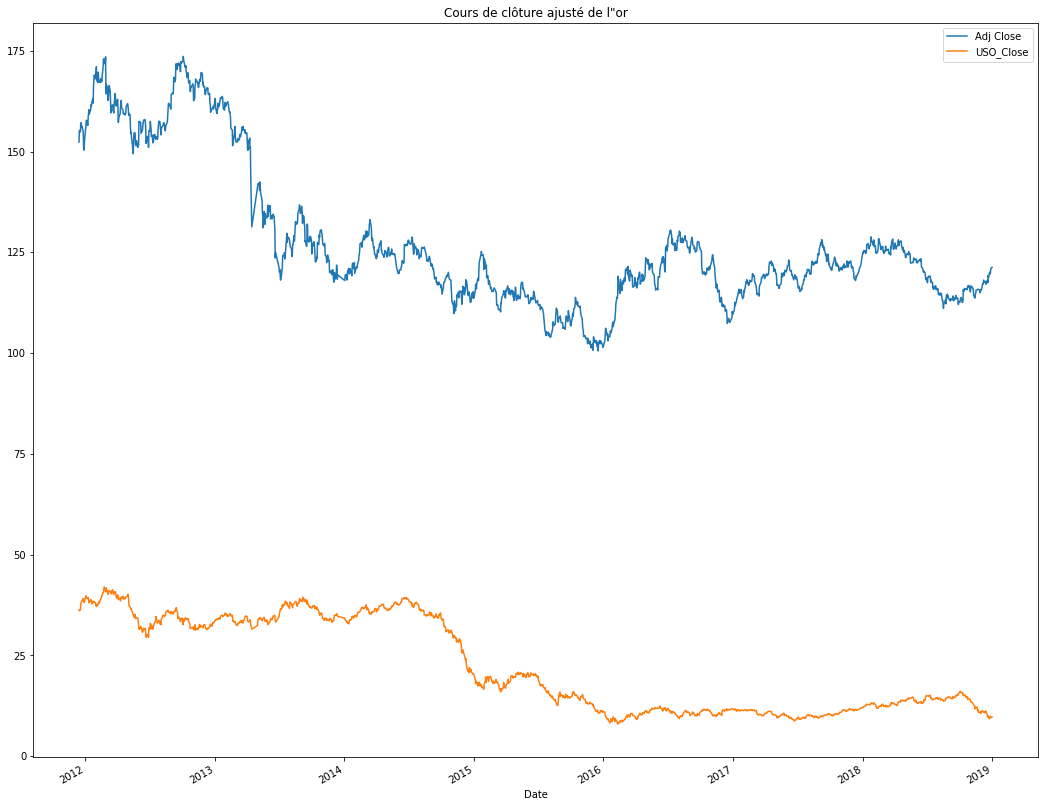

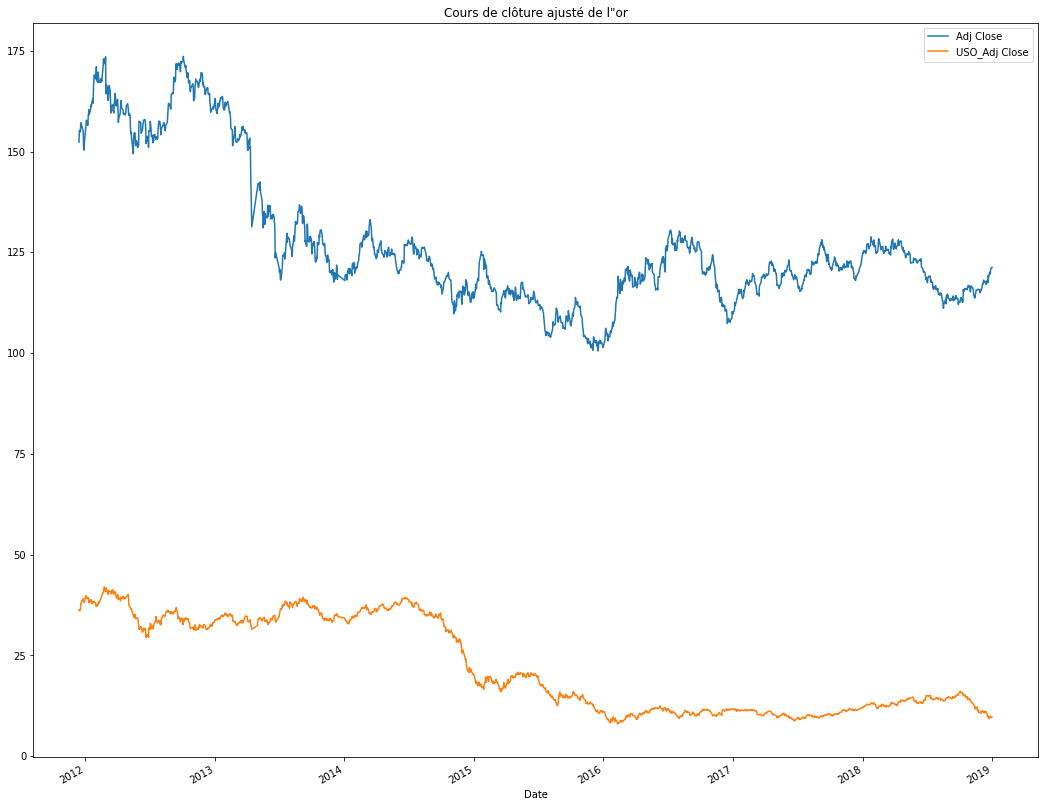

In [11]:
# Cette visualisation concerne uniquement les variables que nous pouvons représenter sur la même échelle, d'où l'exclusion de certaines variables dans la fonction
for col in gold_df.columns:
    if col not in 'Adj Close''Volume''SP_volume''DJ_open''DJ_high''DJ_low''DJ_close''DJ_Ajclose''DJ_volume''EG_volume''EU_Price''EU_open''EU_high''EU_low''EU_Trend''OF_Volume''OF_Trend''OS_Trend''SF_Price''SF_Open''SF_High''SF_Low''SF_Volume''SF_Trend''USB_Trend''USDI_Trend''PLT_Trend''PLD_Trend''SF_Trend''USDI_Volume''USDI_Trend''GDX_Volume''USO_Volume':
        plt.figure(figsize=(18,15))
        gold_df['Adj Close'].plot()
        gold_df[col].plot()
        plt.title('Cours de clôture ajusté de l"or')
        plt.legend()
        plt.show()

D'après les visualisations, une variable comme EG_Ajclose présente une forte corrélation avec la variable cible.<br> En cas de prédiction elle pourrait fortement influencer le résultat de le prédiction.

### 8 - Identification des valeurs aberrantes